# import libraries

In [1]:
!pip install bayesian-optimization
!pip install optuna
!pip install plotly

#DataFrame
import pandas as pd
import numpy as np

#visualization tools
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
# visualization styling
plt.style.use('ggplot')

#model tools
from sklearn.model_selection import train_test_split #spliting
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#modeling
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

#score tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

#hyper parameters tuning

from bayes_opt import BayesianOptimization
import optuna

In [3]:
df = pd.read_csv("../startup data.csv")
pd.set_option('display.max_columns',False)

<AxesSubplot:>

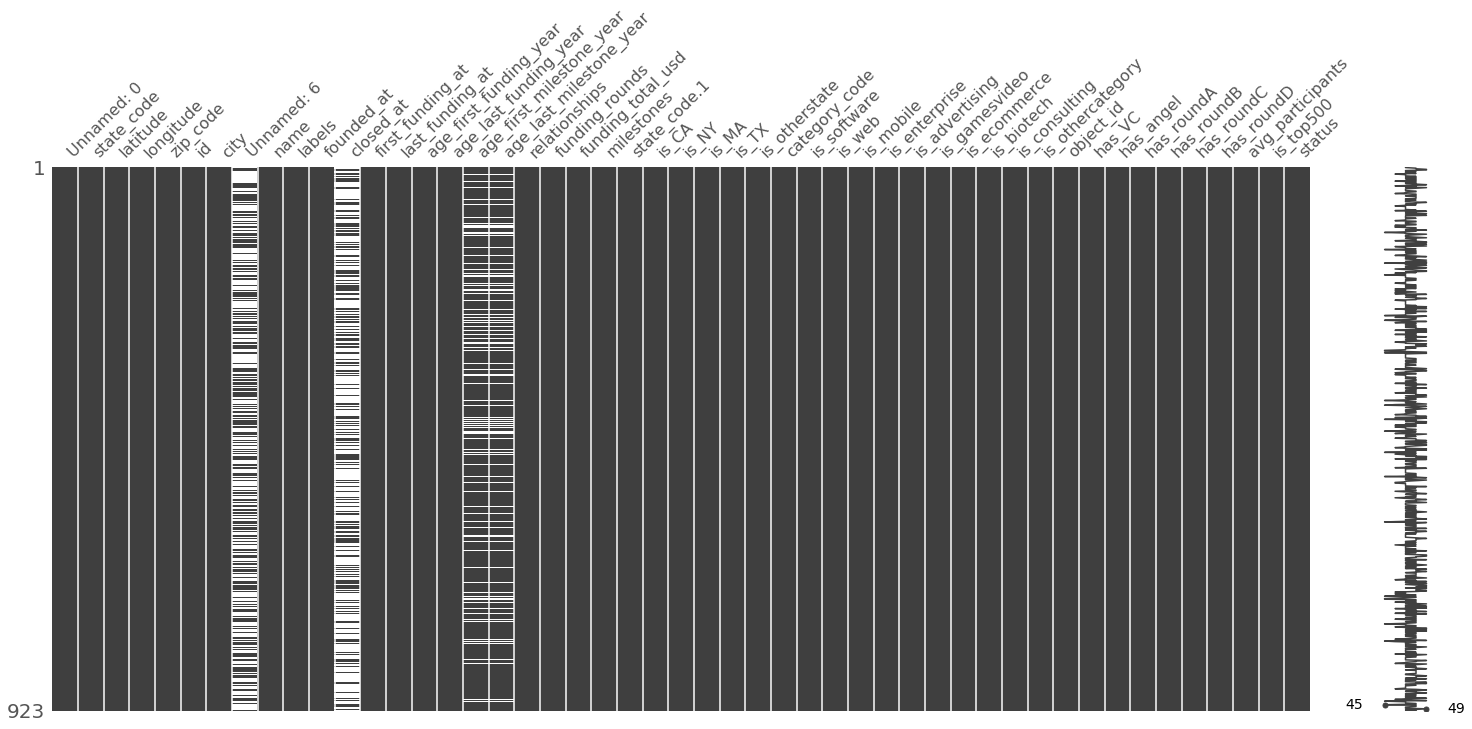

In [4]:
msno.matrix(df)

# 1. Simple EDA

## 1.1 State Code

In [5]:
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'USA-states',        
        'locations':list(df.state_code.value_counts().index),
        'colorscale':'Reds',            
        'z':list(df.state_code.value_counts().values),   
#         'title': 'State Code'÷
        },     
    layout = {
      'geo':{
          'scope':'usa'
      }  
    })
choropleth_map.update_layout(
    title_text = '1. State Code',
)
choropleth_map

由于在其他mac设备上可能无法显示出choropleth_map，这里把在win的运行结果截图和打印出的choropleth_map地图进行额外展示

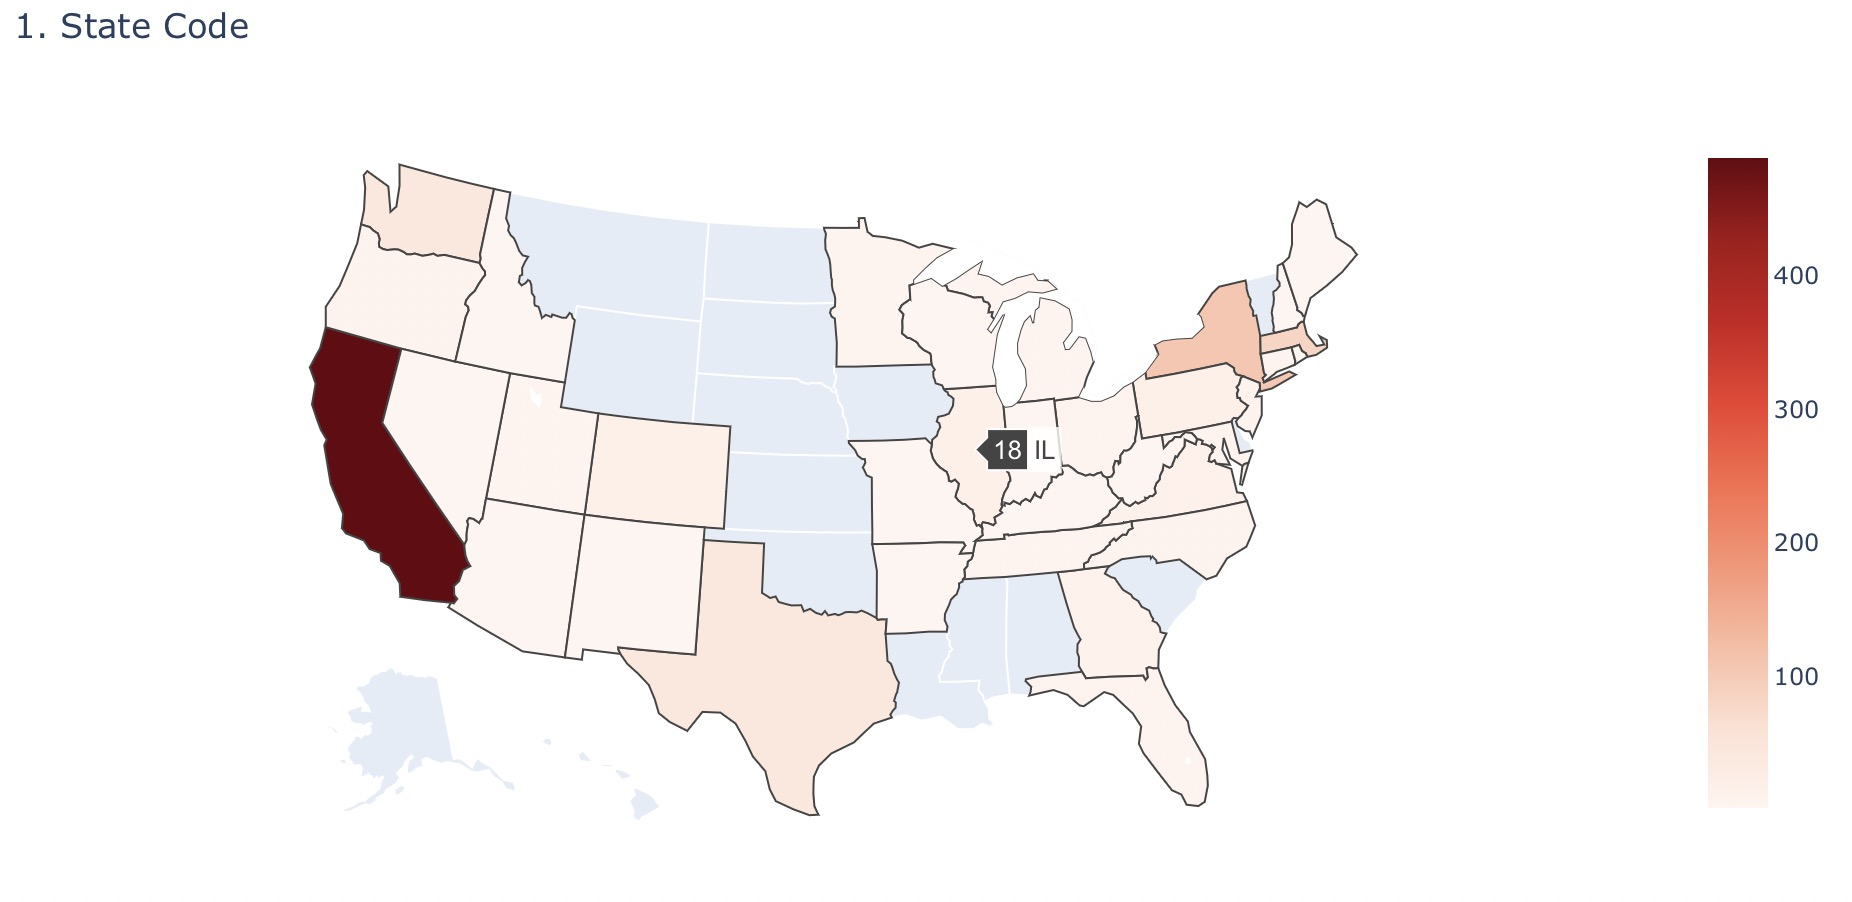

In [1]:
# choropleth_map
from IPython.display import Image
Image(filename='image.jpeg')

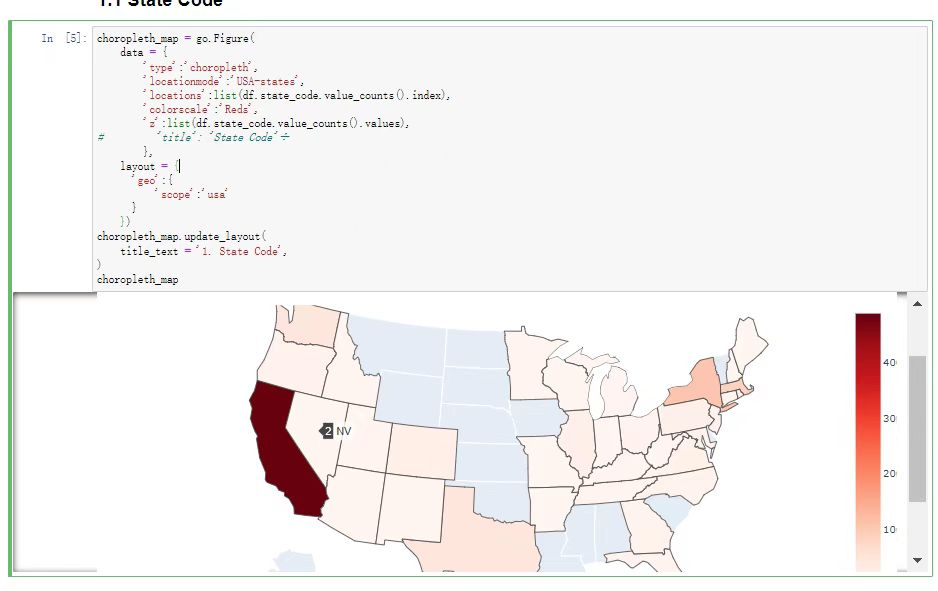

In [2]:
# win运行结果截图
Image(filename='screenshot.jpeg')

## 1.2 Founded_at

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

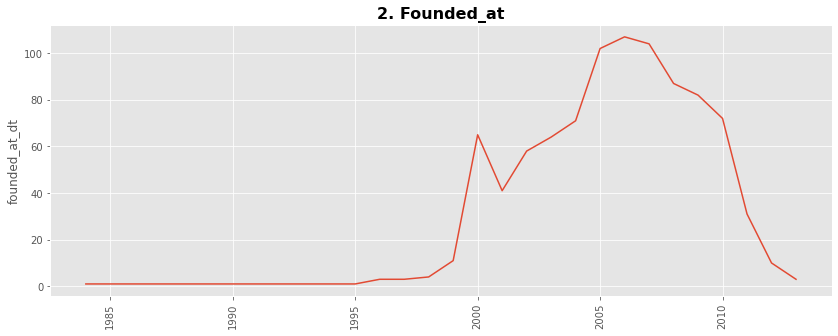

In [6]:
plt.figure(figsize=(14,5))
plt.title("2. Founded_at",{'fontsize':16,
        'fontweight':"bold"})
df['founded_at_dt']=df['founded_at'].apply(lambda x:int(x[-4:]))
s=df.founded_at_dt.value_counts().sort_index(ascending=True)
sns.lineplot(data=s)
plt.xticks(rotation=90)

## 1.3 has_VC & has_angel

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



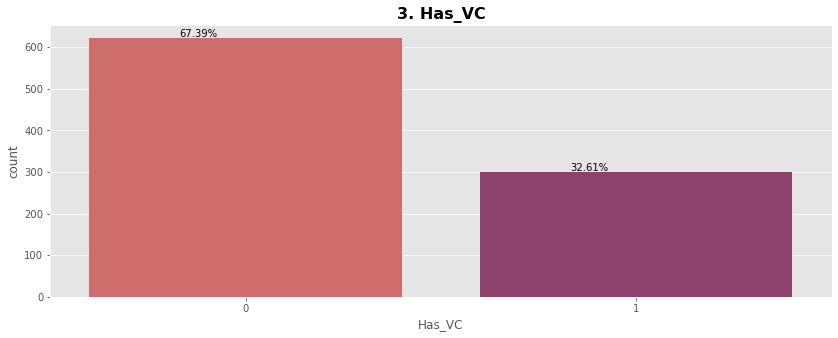

In [7]:
plt.figure(figsize=(14,5))

ax=sns.countplot(df["has_VC"],palette = 'flare')
plt.title("3. Has_VC",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count")
plt.xlabel("Has_VC")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.23, i.get_height()+2, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

## 1.4 has_angel

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



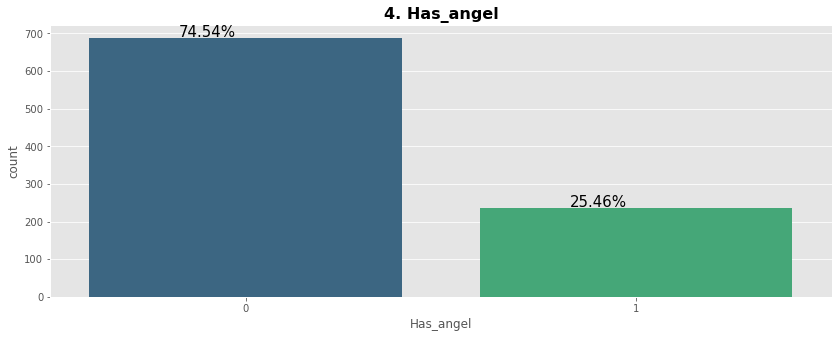

In [8]:
plt.figure(figsize=(14,5))
ax=sns.countplot(df["has_angel"],palette="viridis")
plt.title("4. Has_angel",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count")
plt.xlabel("Has_angel")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.23, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

## 1.5 avg_participants

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



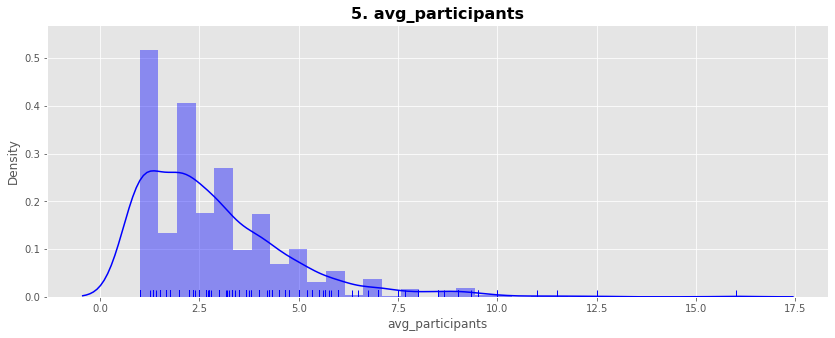

In [9]:
plt.figure(figsize=(14,5))
plt.title("5. avg_participants",{'fontsize':16,
        'fontweight':"bold"})
sns.distplot(df.avg_participants,rug=True,hist=True, color = 'blue')
plt.show()

## 1.6 funding_total_us (US bill $)

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'6. funding_total_us'}, xlabel='funding_total_usd'>

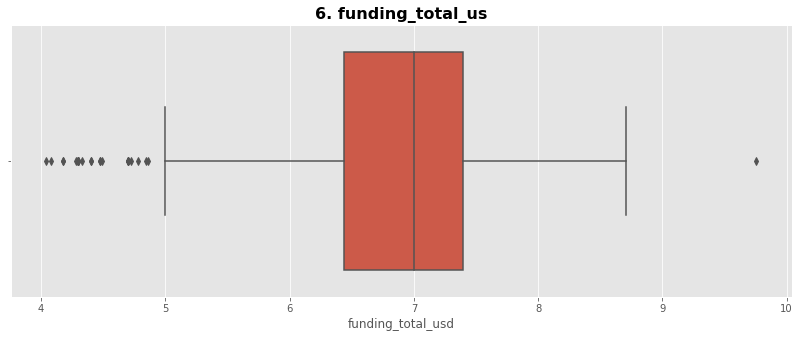

In [10]:
plt.figure(figsize=(14,5))
plt.title("6. funding_total_us",{'fontsize':16,
        'fontweight':"bold"})
sns.boxplot(np.log10(df.funding_total_usd))
#used log10 here

## 1.7 relationships

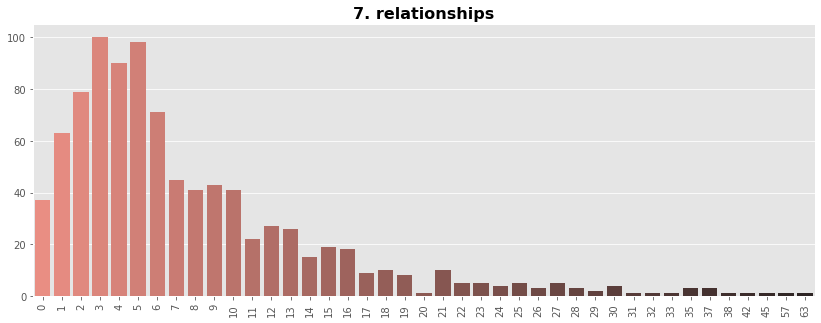

In [11]:
plt.figure(figsize=(14,5))
plt.title("7. relationships",{'fontsize':16,
        'fontweight':"bold"})
sns.barplot(x=df.relationships.value_counts().index,y=df.relationships.value_counts().values,palette='dark:salmon_r')
plt.xticks(rotation=90)
plt.show()

## 1.8 funding_rounds

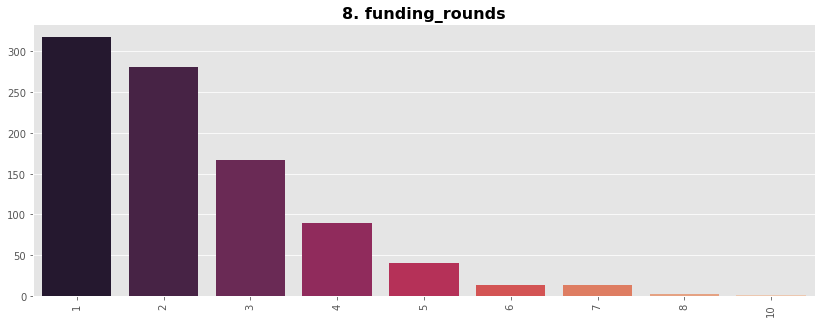

In [12]:
plt.figure(figsize=(14,5))
plt.title("8. funding_rounds",{'fontsize':16,
        'fontweight':"bold"})
sns.barplot(x=df.funding_rounds.value_counts().index,y=df.funding_rounds.value_counts().values,palette='rocket')

plt.xticks(rotation=90)
plt.show()

## 1.9 has_round

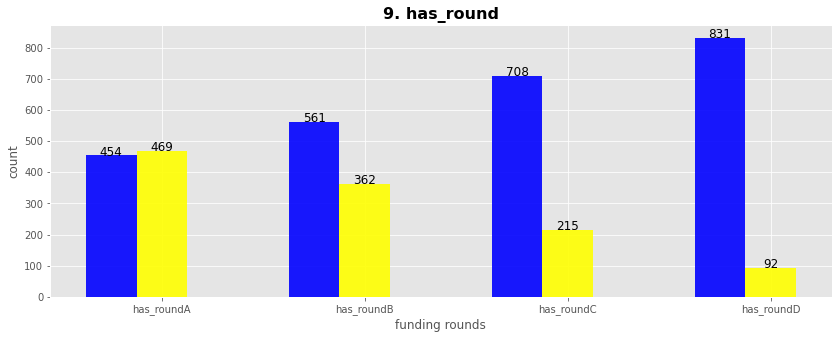

In [13]:
name = ['has_roundA','has_roundB','has_roundC','has_roundD']
plt.figure(figsize=(14,5))
y1 = []
y2 = []
for i in range(4):
    count = df[name[i]].value_counts()
    y1.append(count[0])
    y2.append(count[1])
y1 = np.array(y1)
y2 = np.array(y2)
xt = np.arange(4)

width=0.25
plt.bar(xt-width/2,y1,width,alpha=0.9,label="failed",color = 'blue')
plt.bar(xt+width/2,y2,width,alpha=0.9,tick_label = name,color="yellow",label="success")
for x,y in zip(xt,y1):
    plt.text(x-width/2,y+0.005,'%d'%y,ha="center",fontsize = 12)
for x,y in zip(xt,y2):
    plt.text(x+width/2,y+0.005,'%d'%y,ha="center",fontsize = 12)
plt.title("9. has_round",{'fontsize':16,
        'fontweight':"bold"})
plt.xlabel('funding rounds',)
plt.ylabel('count',)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.legend(fontsize = 15)
plt.show()

## 1.10 category_code

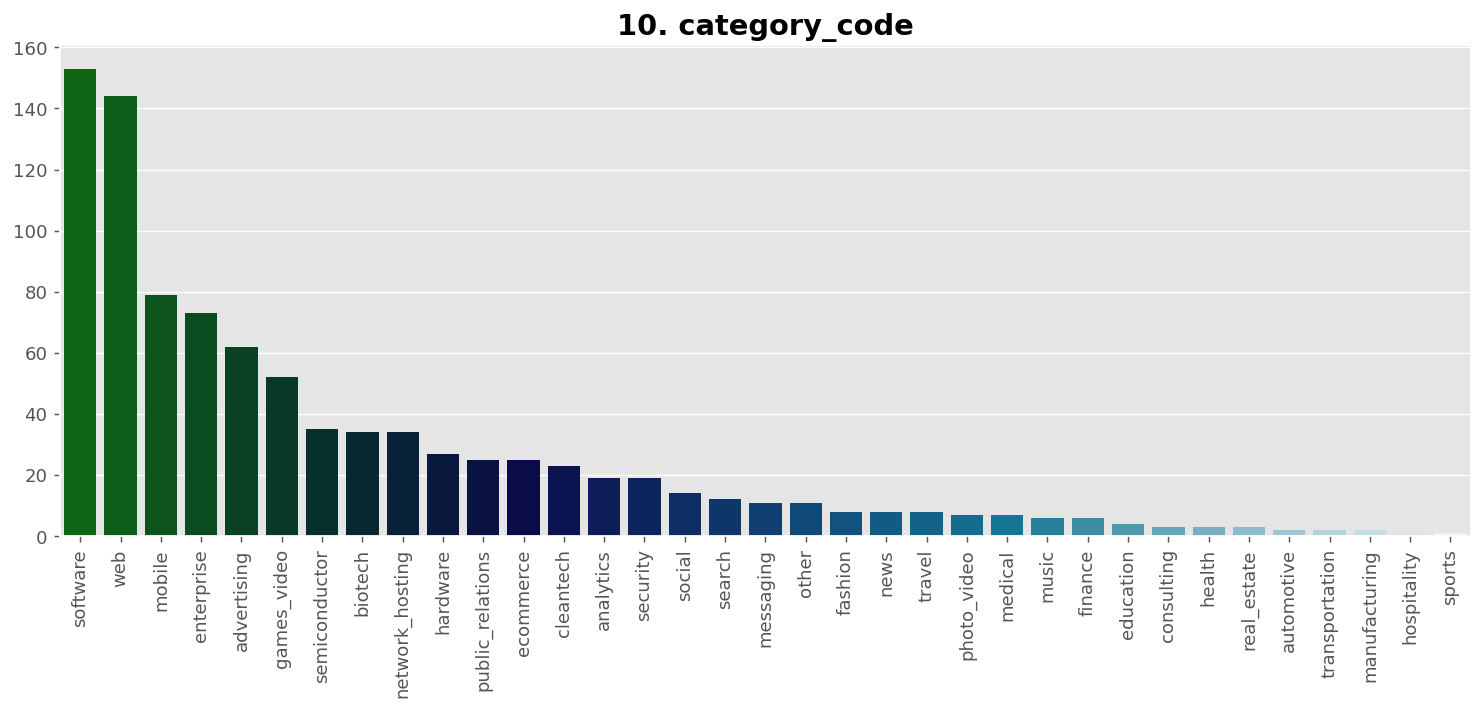

In [15]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (14,5) 
plt.rcParams["figure.dpi"] = 130  

plt.title("10. category_code",{'fontsize':16,
        'fontweight':"bold"})

category = df['category_code'].value_counts()

plt.xticks(rotation=90)
sns.barplot(x=category.index,y=category.values,palette = 'ocean')
plt.show()

# 2. feature engineering

## 2.1 drop columns

* drop unuseful columns

In [16]:
df.drop(['Unnamed: 6','closed_at','age_first_milestone_year','age_last_milestone_year',
         'id','state_code','state_code.1','object_id',
         'Unnamed: 0','zip_code','name',
         'latitude','longitude','city',
         'founded_at','first_funding_at','last_funding_at',
         'status','founded_at_dt'],axis=1,inplace=True)

<AxesSubplot:>

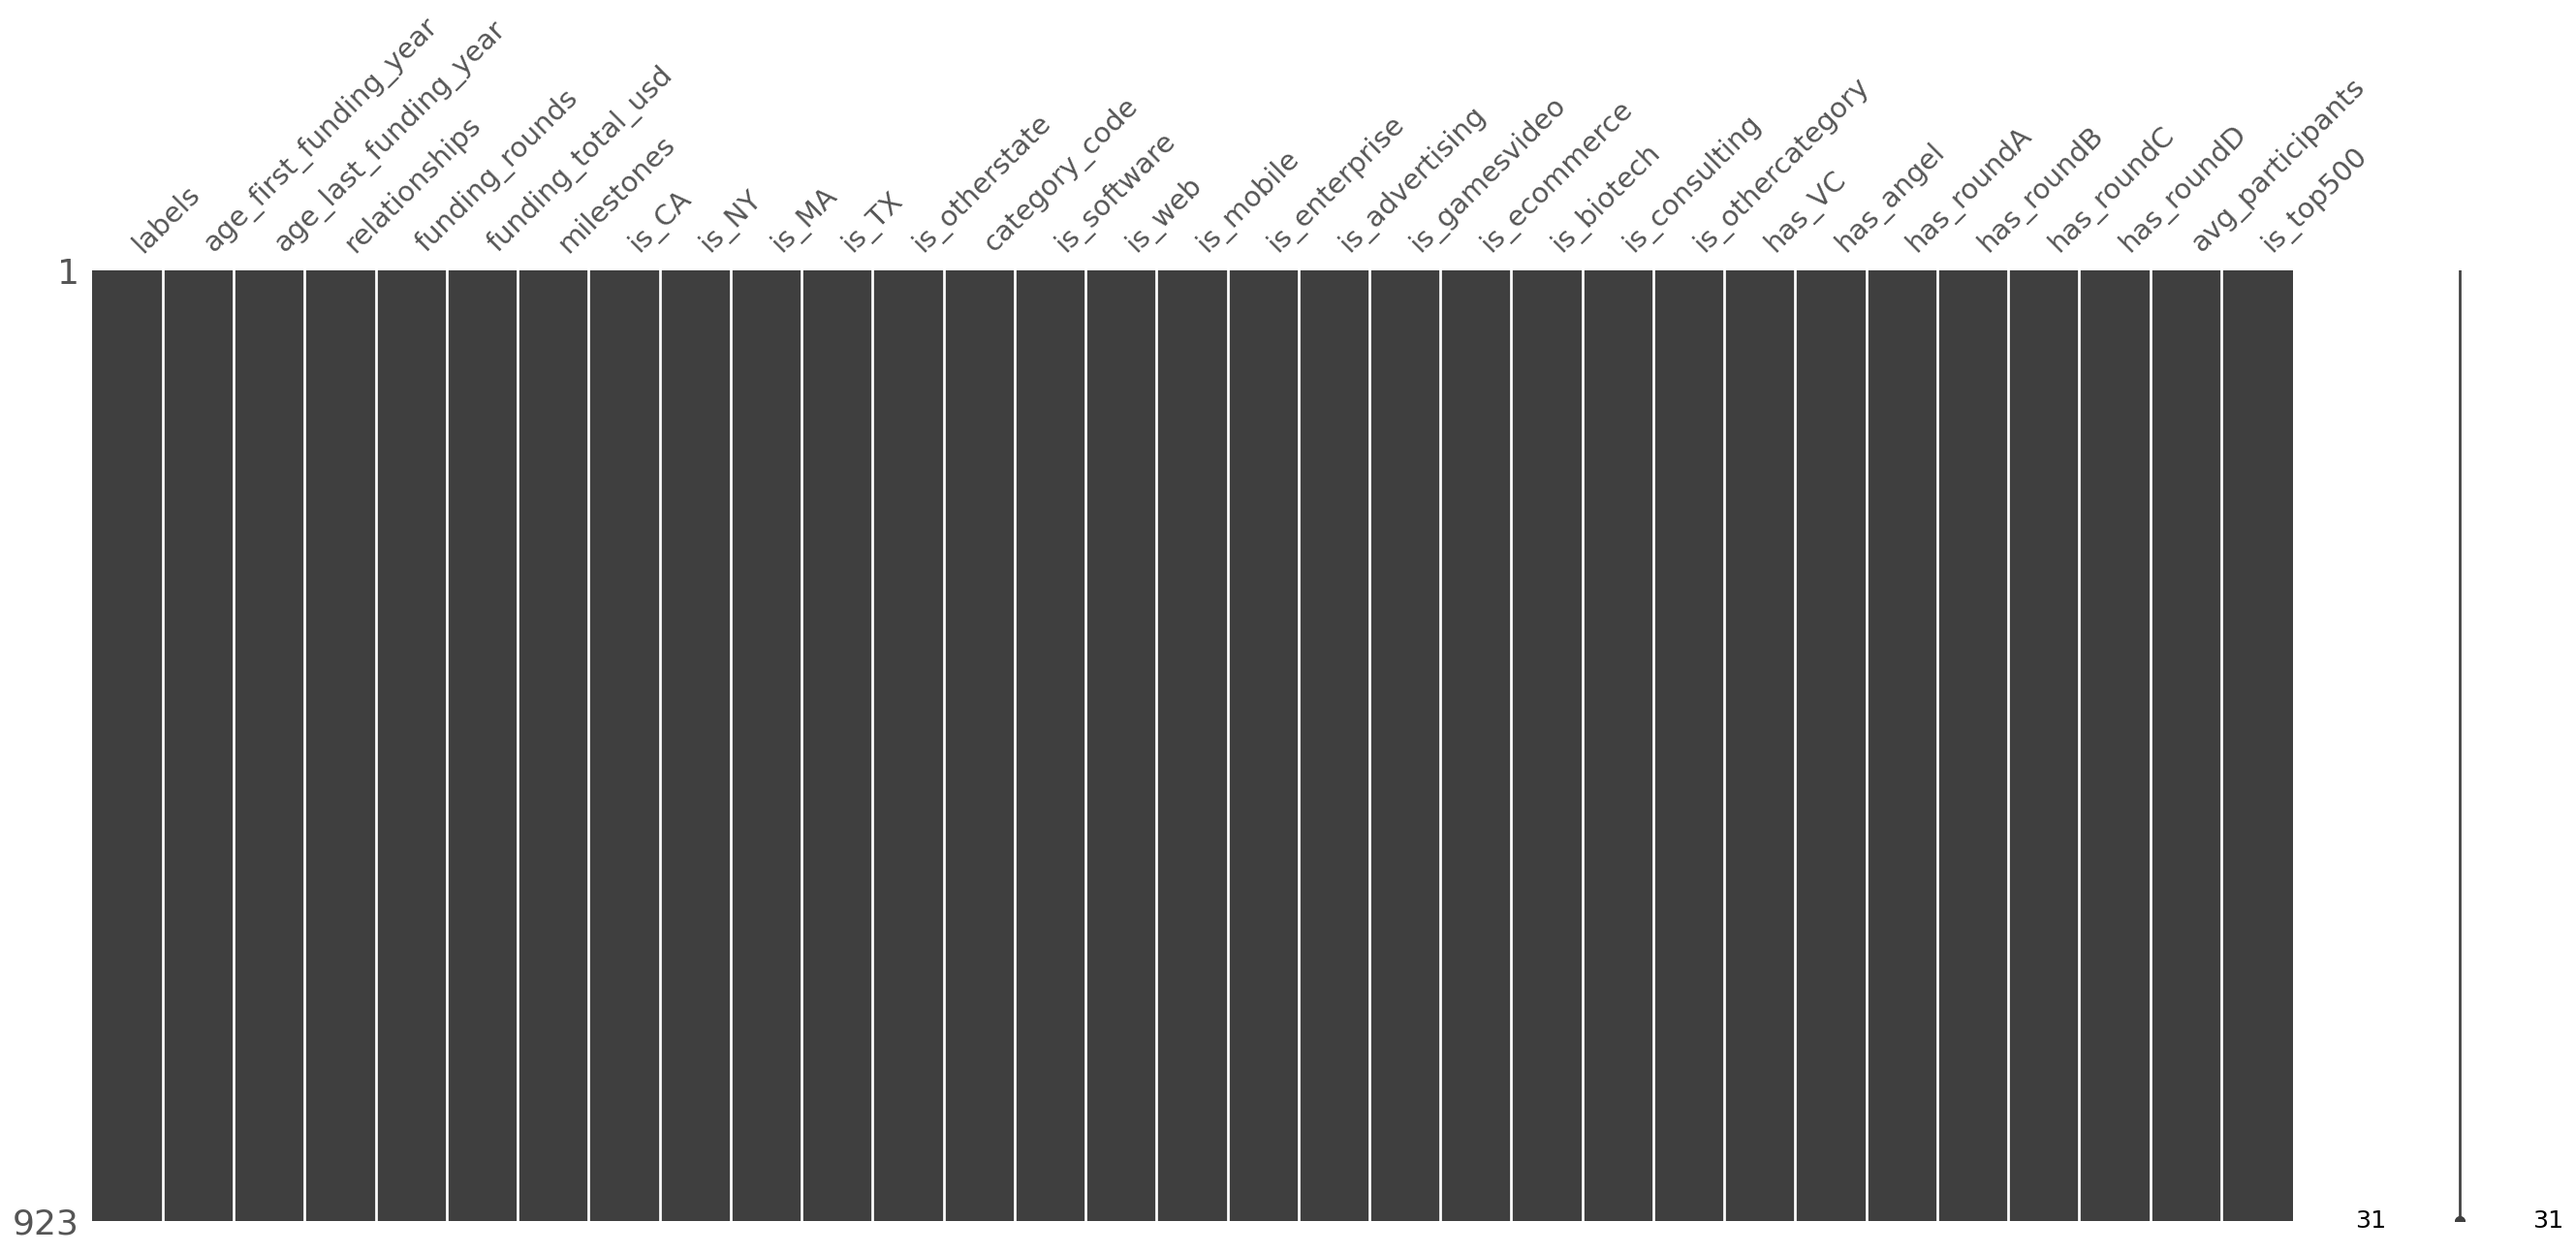

In [17]:
msno.matrix(df)

## 2.2 convert categorical column into numerical one

* get_dummies

In [18]:
category = pd.get_dummies(df["category_code"])
X = pd.concat([df, category],axis = 1)
X

labels  age_first_funding_year  ...  travel  web
0         1                  2.2493  ...       0    0
1         1                  5.1260  ...       0    0
2         1                  1.0329  ...       0    1
3         1                  3.1315  ...       0    0
4         0                  0.0000  ...       0    0
..      ...                     ...  ...     ...  ...
918       1                  0.5178  ...       0    0
919       0                  7.2521  ...       0    0
920       0                  8.4959  ...       0    0
921       1                  0.7589  ...       0    0
922       1                  3.1205  ...       0    0

[923 rows x 66 columns]

In [19]:
X.drop('category_code',axis=1,inplace=True)
X.head()

labels  age_first_funding_year  ...  travel  web
0       1                  2.2493  ...       0    0
1       1                  5.1260  ...       0    0
2       1                  1.0329  ...       0    1
3       1                  3.1315  ...       0    0
4       0                  0.0000  ...       0    0

[5 rows x 65 columns]

## 2.3 features(X) and target value(y)

In [20]:
y = X['labels']
X.drop('labels',axis=1,inplace=True)

In [21]:
X.head()

age_first_funding_year  age_last_funding_year  ...  travel  web
0                  2.2493                 3.0027  ...       0    0
1                  5.1260                 9.9973  ...       0    0
2                  1.0329                 1.0329  ...       0    1
3                  3.1315                 5.3151  ...       0    0
4                  0.0000                 1.6685  ...       0    0

[5 rows x 64 columns]

## 2.4 split into train and test set data

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 8888)

In [23]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(738, 64) (185, 64) (738,) (185,)


# 3. ML

## 3.1 Modeling (Random Forest, LightGBM, XGBoost, SVC, CatBoost) with no tuning

### 3.1.1 Random Forest Classifier

In [24]:
rfc=RandomForestClassifier(random_state=8888)
rfc=rfc.fit(train_X,train_y)

### 3.1.2 LightGBM Classifier

In [25]:
lgbm = LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
lgbm.fit(train_X, train_y)

LGBMClassifier(objective='binary', random_state=8888)

### 3.1.3 XGBoost Classifier

In [26]:
xgbr = xgb.XGBClassifier(objective='binary:hinge',random_state=8888)
xgbr.fit(train_X, train_y
         ,sample_weight=None
         , early_stopping_rounds=1000
        , eval_metric='auc'
        , eval_set=[(test_X, test_y)]
        )

[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.65716
[2]	validation_0-auc:0.72161
[3]	validation_0-auc:0.71355
[4]	validation_0-auc:0.72161
[5]	validation_0-auc:0.71761
[6]	validation_0-auc:0.71355
[7]	validation_0-auc:0.71755
[8]	validation_0-auc:0.70548
[9]	validation_0-auc:0.71348
[10]	validation_0-auc:0.69322
[11]	validation_0-auc:0.69722
[12]	validation_0-auc:0.68916
[13]	validation_0-auc:0.68509
[14]	validation_0-auc:0.68509
[15]	validation_0-auc:0.70122
[16]	validation_0-auc:0.71735
[17]	validation_0-auc:0.72141
[18]	validation_0-auc:0.69709


C:\Users\Liangst.687\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

C:\Users\Liangst.687\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-auc:0.69302
[20]	validation_0-auc:0.70109
[21]	validation_0-auc:0.69296
[22]	validation_0-auc:0.70909
[23]	validation_0-auc:0.70915
[24]	validation_0-auc:0.71315
[25]	validation_0-auc:0.70902
[26]	validation_0-auc:0.71715
[27]	validation_0-auc:0.69689
[28]	validation_0-auc:0.70902
[29]	validation_0-auc:0.70902
[30]	validation_0-auc:0.71309
[31]	validation_0-auc:0.70083
[32]	validation_0-auc:0.70902
[33]	validation_0-auc:0.70502
[34]	validation_0-auc:0.69283
[35]	validation_0-auc:0.71715
[36]	validation_0-auc:0.70096
[37]	validation_0-auc:0.70096
[38]	validation_0-auc:0.70102
[39]	validation_0-auc:0.71309
[40]	validation_0-auc:0.71315
[41]	validation_0-auc:0.68889
[42]	validation_0-auc:0.70915
[43]	validation_0-auc:0.68889
[44]	validation_0-auc:0.70515
[45]	validation_0-auc:0.67276
[46]	validation_0-auc:0.70109
[47]	validation_0-auc:0.67276
[48]	validation_0-auc:0.70109
[49]	validation_0-auc:0.67276
[50]	validation_0-auc:0.70109
[51]	validation_0-auc:0.67276
[52]	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:hinge',
              predictor='auto', random_state=8888, reg_alpha=0, ...)

### 3.1.4 SVC

In [27]:
svc = SVC(probability=True,random_state=8888)
svc.fit(train_X, train_y)

SVC(probability=True, random_state=8888)

### 3.1.5 CatBoost Classifier

In [28]:
catboost = CatBoostClassifier(random_state=8888)
catboost.fit(
    train_X,
    train_y,
    verbose=False
)

## 3.2 Model Accuracy compare with no tuning

In [29]:
random_state = 8888
classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(catboost)


accuracy_list = []
auc_list=[]
for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(accuracy_score(test_y,y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))
    
accuracy_dict={}
for i in range(5):
    key=['svc','random forest','xgboost','light gbm','catboost'][i]
    accuracy_dict[key]=accuracy_list[i]
    
accuracy_dict_sorted=dict(sorted(accuracy_dict.items(), key=lambda item: item[1]))

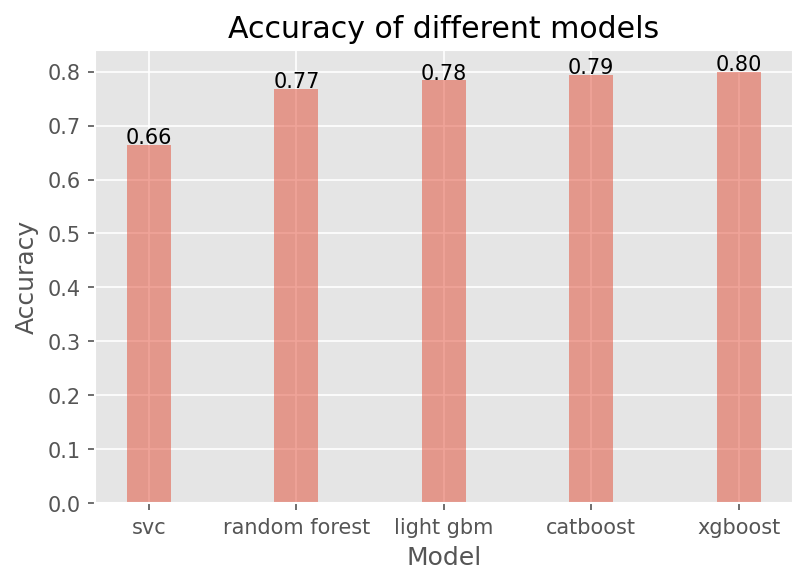

In [30]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (6,4) 
plt.rcParams["figure.dpi"] = 150 

plt.bar(x=list(accuracy_dict_sorted.keys()),height=list(accuracy_dict_sorted.values()),width=0.3,alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
for x,y in zip(range(6),list(accuracy_dict_sorted.values())):
    plt.text(x,y+0.002,'%.2f'%y,ha="center")

## 3.3 Model Accuracy after using Stratified K FOLD

In [46]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=8888)
cv_results = []
for classifier in classifiers:
#     print('stop1')
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold))

# print('stop2')
cv_means = []
cv_std = []
for cv_result in cv_results:
#     print('stop3')
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
#     print('stop4')
# print('stop5')

Learning rate set to 0.008224
0:	learn: 0.6900887	total: 3.26ms	remaining: 3.25s
1:	learn: 0.6859500	total: 6.93ms	remaining: 3.46s
2:	learn: 0.6818621	total: 10.4ms	remaining: 3.47s
3:	learn: 0.6780765	total: 14ms	remaining: 3.49s
4:	learn: 0.6744567	total: 19.6ms	remaining: 3.89s
5:	learn: 0.6707202	total: 23.5ms	remaining: 3.89s
6:	learn: 0.6670091	total: 27.2ms	remaining: 3.85s
7:	learn: 0.6637606	total: 46.3ms	remaining: 5.74s
8:	learn: 0.6608002	total: 50.9ms	remaining: 5.61s
9:	learn: 0.6577084	total: 54.8ms	remaining: 5.43s
10:	learn: 0.6547697	total: 59.3ms	remaining: 5.33s
11:	learn: 0.6516098	total: 64.5ms	remaining: 5.31s
12:	learn: 0.6483007	total: 68ms	remaining: 5.16s
13:	learn: 0.6449779	total: 71.2ms	remaining: 5.01s
14:	learn: 0.6420782	total: 74.5ms	remaining: 4.89s
15:	learn: 0.6391464	total: 78.4ms	remaining: 4.82s
16:	learn: 0.6363954	total: 81.7ms	remaining: 4.72s
17:	learn: 0.6333435	total: 85ms	remaining: 4.64s
18:	learn: 0.6304495	total: 88ms	remaining: 4.54s


165:	learn: 0.4330345	total: 674ms	remaining: 3.38s
166:	learn: 0.4325561	total: 678ms	remaining: 3.38s
167:	learn: 0.4318869	total: 681ms	remaining: 3.37s
168:	learn: 0.4313045	total: 686ms	remaining: 3.37s
169:	learn: 0.4305369	total: 689ms	remaining: 3.36s
170:	learn: 0.4299359	total: 692ms	remaining: 3.35s
171:	learn: 0.4293180	total: 695ms	remaining: 3.35s
172:	learn: 0.4288245	total: 700ms	remaining: 3.35s
173:	learn: 0.4279319	total: 704ms	remaining: 3.34s
174:	learn: 0.4272338	total: 707ms	remaining: 3.33s
175:	learn: 0.4264377	total: 712ms	remaining: 3.33s
176:	learn: 0.4260291	total: 717ms	remaining: 3.33s
177:	learn: 0.4255770	total: 720ms	remaining: 3.32s
178:	learn: 0.4250546	total: 723ms	remaining: 3.32s
179:	learn: 0.4245693	total: 727ms	remaining: 3.31s
180:	learn: 0.4240902	total: 731ms	remaining: 3.31s
181:	learn: 0.4235695	total: 734ms	remaining: 3.3s
182:	learn: 0.4230898	total: 738ms	remaining: 3.3s
183:	learn: 0.4225392	total: 742ms	remaining: 3.29s
184:	learn: 0.

332:	learn: 0.3622271	total: 1.38s	remaining: 2.76s
333:	learn: 0.3619787	total: 1.39s	remaining: 2.77s
334:	learn: 0.3617433	total: 1.4s	remaining: 2.77s
335:	learn: 0.3612835	total: 1.4s	remaining: 2.76s
336:	learn: 0.3610428	total: 1.4s	remaining: 2.76s
337:	learn: 0.3607661	total: 1.41s	remaining: 2.75s
338:	learn: 0.3605161	total: 1.41s	remaining: 2.75s
339:	learn: 0.3601824	total: 1.41s	remaining: 2.74s
340:	learn: 0.3599710	total: 1.42s	remaining: 2.74s
341:	learn: 0.3597545	total: 1.42s	remaining: 2.74s
342:	learn: 0.3596062	total: 1.43s	remaining: 2.73s
343:	learn: 0.3590374	total: 1.43s	remaining: 2.73s
344:	learn: 0.3587105	total: 1.43s	remaining: 2.72s
345:	learn: 0.3584788	total: 1.44s	remaining: 2.72s
346:	learn: 0.3579714	total: 1.44s	remaining: 2.71s
347:	learn: 0.3577059	total: 1.44s	remaining: 2.71s
348:	learn: 0.3573464	total: 1.45s	remaining: 2.7s
349:	learn: 0.3567359	total: 1.45s	remaining: 2.7s
350:	learn: 0.3564619	total: 1.46s	remaining: 2.69s
351:	learn: 0.356

507:	learn: 0.3165617	total: 2.07s	remaining: 2s
508:	learn: 0.3163511	total: 2.1s	remaining: 2.02s
509:	learn: 0.3161717	total: 2.1s	remaining: 2.02s
510:	learn: 0.3159780	total: 2.1s	remaining: 2.01s
511:	learn: 0.3157553	total: 2.11s	remaining: 2.01s
512:	learn: 0.3156395	total: 2.12s	remaining: 2.01s
513:	learn: 0.3154632	total: 2.12s	remaining: 2s
514:	learn: 0.3153458	total: 2.12s	remaining: 2s
515:	learn: 0.3150401	total: 2.13s	remaining: 2s
516:	learn: 0.3148645	total: 2.13s	remaining: 1.99s
517:	learn: 0.3146045	total: 2.14s	remaining: 1.99s
518:	learn: 0.3142459	total: 2.14s	remaining: 1.99s
519:	learn: 0.3139991	total: 2.15s	remaining: 1.98s
520:	learn: 0.3138177	total: 2.15s	remaining: 1.98s
521:	learn: 0.3134472	total: 2.15s	remaining: 1.97s
522:	learn: 0.3132655	total: 2.16s	remaining: 1.97s
523:	learn: 0.3131238	total: 2.16s	remaining: 1.96s
524:	learn: 0.3129010	total: 2.16s	remaining: 1.96s
525:	learn: 0.3125814	total: 2.17s	remaining: 1.95s
526:	learn: 0.3124675	total

696:	learn: 0.2750933	total: 2.93s	remaining: 1.27s
697:	learn: 0.2748867	total: 2.93s	remaining: 1.27s
698:	learn: 0.2747834	total: 2.94s	remaining: 1.26s
699:	learn: 0.2746680	total: 2.94s	remaining: 1.26s
700:	learn: 0.2745163	total: 2.94s	remaining: 1.26s
701:	learn: 0.2743511	total: 2.95s	remaining: 1.25s
702:	learn: 0.2742292	total: 2.95s	remaining: 1.25s
703:	learn: 0.2741491	total: 2.95s	remaining: 1.24s
704:	learn: 0.2740152	total: 2.99s	remaining: 1.25s
705:	learn: 0.2735723	total: 2.99s	remaining: 1.25s
706:	learn: 0.2733794	total: 3s	remaining: 1.24s
707:	learn: 0.2732609	total: 3s	remaining: 1.24s
708:	learn: 0.2730716	total: 3s	remaining: 1.23s
709:	learn: 0.2728671	total: 3.01s	remaining: 1.23s
710:	learn: 0.2727218	total: 3.01s	remaining: 1.22s
711:	learn: 0.2725708	total: 3.01s	remaining: 1.22s
712:	learn: 0.2724830	total: 3.02s	remaining: 1.21s
713:	learn: 0.2722721	total: 3.02s	remaining: 1.21s
714:	learn: 0.2720435	total: 3.02s	remaining: 1.21s
715:	learn: 0.2718721

856:	learn: 0.2426108	total: 3.63s	remaining: 606ms
857:	learn: 0.2421160	total: 3.64s	remaining: 602ms
858:	learn: 0.2419137	total: 3.64s	remaining: 598ms
859:	learn: 0.2415443	total: 3.64s	remaining: 593ms
860:	learn: 0.2414198	total: 3.65s	remaining: 589ms
861:	learn: 0.2409471	total: 3.65s	remaining: 584ms
862:	learn: 0.2407715	total: 3.65s	remaining: 580ms
863:	learn: 0.2406211	total: 3.67s	remaining: 578ms
864:	learn: 0.2404857	total: 3.67s	remaining: 573ms
865:	learn: 0.2403134	total: 3.67s	remaining: 569ms
866:	learn: 0.2399722	total: 3.68s	remaining: 564ms
867:	learn: 0.2398158	total: 3.68s	remaining: 560ms
868:	learn: 0.2396135	total: 3.69s	remaining: 556ms
869:	learn: 0.2395134	total: 3.69s	remaining: 551ms
870:	learn: 0.2393971	total: 3.69s	remaining: 547ms
871:	learn: 0.2391579	total: 3.69s	remaining: 542ms
872:	learn: 0.2390468	total: 3.7s	remaining: 538ms
873:	learn: 0.2388748	total: 3.7s	remaining: 534ms
874:	learn: 0.2387527	total: 3.7s	remaining: 529ms
875:	learn: 0.2

16:	learn: 0.6383733	total: 104ms	remaining: 6.01s
17:	learn: 0.6360144	total: 108ms	remaining: 5.87s
18:	learn: 0.6335344	total: 110ms	remaining: 5.7s
19:	learn: 0.6308655	total: 114ms	remaining: 5.61s
20:	learn: 0.6282694	total: 118ms	remaining: 5.49s
21:	learn: 0.6253142	total: 122ms	remaining: 5.41s
22:	learn: 0.6229688	total: 125ms	remaining: 5.31s
23:	learn: 0.6199242	total: 136ms	remaining: 5.54s
24:	learn: 0.6173085	total: 139ms	remaining: 5.42s
25:	learn: 0.6143979	total: 142ms	remaining: 5.32s
26:	learn: 0.6116935	total: 146ms	remaining: 5.25s
27:	learn: 0.6087075	total: 149ms	remaining: 5.17s
28:	learn: 0.6066278	total: 153ms	remaining: 5.11s
29:	learn: 0.6043491	total: 156ms	remaining: 5.03s
30:	learn: 0.6022021	total: 159ms	remaining: 4.98s
31:	learn: 0.5999924	total: 163ms	remaining: 4.92s
32:	learn: 0.5973529	total: 166ms	remaining: 4.86s
33:	learn: 0.5953155	total: 168ms	remaining: 4.79s
34:	learn: 0.5932744	total: 171ms	remaining: 4.72s
35:	learn: 0.5912149	total: 175m

201:	learn: 0.4172175	total: 963ms	remaining: 3.8s
202:	learn: 0.4166376	total: 969ms	remaining: 3.81s
203:	learn: 0.4160604	total: 996ms	remaining: 3.89s
204:	learn: 0.4154466	total: 1s	remaining: 3.88s
205:	learn: 0.4148635	total: 1.01s	remaining: 3.88s
206:	learn: 0.4141637	total: 1.01s	remaining: 3.88s
207:	learn: 0.4136295	total: 1.02s	remaining: 3.88s
208:	learn: 0.4132203	total: 1.02s	remaining: 3.87s
209:	learn: 0.4128536	total: 1.02s	remaining: 3.86s
210:	learn: 0.4123250	total: 1.03s	remaining: 3.87s
211:	learn: 0.4119258	total: 1.04s	remaining: 3.86s
212:	learn: 0.4115655	total: 1.04s	remaining: 3.85s
213:	learn: 0.4111279	total: 1.05s	remaining: 3.86s
214:	learn: 0.4108030	total: 1.05s	remaining: 3.85s
215:	learn: 0.4102879	total: 1.06s	remaining: 3.84s
216:	learn: 0.4098916	total: 1.06s	remaining: 3.83s
217:	learn: 0.4094707	total: 1.07s	remaining: 3.83s
218:	learn: 0.4089690	total: 1.07s	remaining: 3.81s
219:	learn: 0.4083808	total: 1.07s	remaining: 3.81s
220:	learn: 0.40

402:	learn: 0.3441247	total: 1.99s	remaining: 2.95s
403:	learn: 0.3438181	total: 1.99s	remaining: 2.94s
404:	learn: 0.3436059	total: 2s	remaining: 2.93s
405:	learn: 0.3431770	total: 2s	remaining: 2.93s
406:	learn: 0.3427694	total: 2s	remaining: 2.92s
407:	learn: 0.3424492	total: 2.01s	remaining: 2.91s
408:	learn: 0.3422527	total: 2.01s	remaining: 2.91s
409:	learn: 0.3419363	total: 2.02s	remaining: 2.9s
410:	learn: 0.3414653	total: 2.02s	remaining: 2.89s
411:	learn: 0.3409421	total: 2.02s	remaining: 2.89s
412:	learn: 0.3407629	total: 2.02s	remaining: 2.88s
413:	learn: 0.3403828	total: 2.03s	remaining: 2.87s
414:	learn: 0.3397738	total: 2.03s	remaining: 2.87s
415:	learn: 0.3395130	total: 2.04s	remaining: 2.86s
416:	learn: 0.3393137	total: 2.05s	remaining: 2.86s
417:	learn: 0.3388785	total: 2.05s	remaining: 2.86s
418:	learn: 0.3384066	total: 2.06s	remaining: 2.85s
419:	learn: 0.3383224	total: 2.06s	remaining: 2.84s
420:	learn: 0.3381794	total: 2.06s	remaining: 2.84s
421:	learn: 0.3378949	

579:	learn: 0.3002034	total: 2.67s	remaining: 1.94s
580:	learn: 0.2999508	total: 2.68s	remaining: 1.93s
581:	learn: 0.2995583	total: 2.68s	remaining: 1.93s
582:	learn: 0.2993440	total: 2.68s	remaining: 1.92s
583:	learn: 0.2991387	total: 2.69s	remaining: 1.91s
584:	learn: 0.2988863	total: 2.69s	remaining: 1.91s
585:	learn: 0.2986290	total: 2.69s	remaining: 1.9s
586:	learn: 0.2984225	total: 2.7s	remaining: 1.9s
587:	learn: 0.2981023	total: 2.7s	remaining: 1.89s
588:	learn: 0.2979706	total: 2.7s	remaining: 1.89s
589:	learn: 0.2976430	total: 2.71s	remaining: 1.88s
590:	learn: 0.2974164	total: 2.71s	remaining: 1.88s
591:	learn: 0.2971857	total: 2.71s	remaining: 1.87s
592:	learn: 0.2969341	total: 2.72s	remaining: 1.86s
593:	learn: 0.2967001	total: 2.72s	remaining: 1.86s
594:	learn: 0.2963818	total: 2.72s	remaining: 1.85s
595:	learn: 0.2961735	total: 2.73s	remaining: 1.85s
596:	learn: 0.2959430	total: 2.73s	remaining: 1.84s
597:	learn: 0.2956934	total: 2.73s	remaining: 1.84s
598:	learn: 0.295

776:	learn: 0.2602179	total: 3.36s	remaining: 965ms
777:	learn: 0.2598843	total: 3.37s	remaining: 960ms
778:	learn: 0.2597529	total: 3.37s	remaining: 956ms
779:	learn: 0.2596151	total: 3.37s	remaining: 952ms
780:	learn: 0.2594765	total: 3.38s	remaining: 947ms
781:	learn: 0.2592856	total: 3.38s	remaining: 942ms
782:	learn: 0.2589453	total: 3.38s	remaining: 938ms
783:	learn: 0.2586978	total: 3.39s	remaining: 933ms
784:	learn: 0.2584016	total: 3.39s	remaining: 929ms
785:	learn: 0.2581984	total: 3.4s	remaining: 924ms
786:	learn: 0.2581171	total: 3.4s	remaining: 920ms
787:	learn: 0.2579682	total: 3.4s	remaining: 916ms
788:	learn: 0.2578184	total: 3.41s	remaining: 913ms
789:	learn: 0.2577010	total: 3.42s	remaining: 908ms
790:	learn: 0.2575976	total: 3.42s	remaining: 904ms
791:	learn: 0.2573550	total: 3.42s	remaining: 899ms
792:	learn: 0.2571996	total: 3.43s	remaining: 895ms
793:	learn: 0.2570657	total: 3.43s	remaining: 890ms
794:	learn: 0.2567728	total: 3.44s	remaining: 886ms
795:	learn: 0.2

942:	learn: 0.2340197	total: 4.22s	remaining: 255ms
943:	learn: 0.2338708	total: 4.22s	remaining: 251ms
944:	learn: 0.2336813	total: 4.23s	remaining: 246ms
945:	learn: 0.2335541	total: 4.23s	remaining: 242ms
946:	learn: 0.2334972	total: 4.24s	remaining: 237ms
947:	learn: 0.2333877	total: 4.24s	remaining: 233ms
948:	learn: 0.2332645	total: 4.24s	remaining: 228ms
949:	learn: 0.2331411	total: 4.25s	remaining: 224ms
950:	learn: 0.2329000	total: 4.25s	remaining: 219ms
951:	learn: 0.2327832	total: 4.25s	remaining: 215ms
952:	learn: 0.2326079	total: 4.26s	remaining: 210ms
953:	learn: 0.2323996	total: 4.26s	remaining: 206ms
954:	learn: 0.2323599	total: 4.27s	remaining: 201ms
955:	learn: 0.2322306	total: 4.27s	remaining: 197ms
956:	learn: 0.2321104	total: 4.28s	remaining: 192ms
957:	learn: 0.2320444	total: 4.28s	remaining: 188ms
958:	learn: 0.2319222	total: 4.28s	remaining: 183ms
959:	learn: 0.2318411	total: 4.29s	remaining: 179ms
960:	learn: 0.2316094	total: 4.29s	remaining: 174ms
961:	learn: 

119:	learn: 0.4850830	total: 540ms	remaining: 3.96s
120:	learn: 0.4842815	total: 543ms	remaining: 3.95s
121:	learn: 0.4833858	total: 547ms	remaining: 3.94s
122:	learn: 0.4826764	total: 551ms	remaining: 3.93s
123:	learn: 0.4818788	total: 554ms	remaining: 3.92s
124:	learn: 0.4808477	total: 558ms	remaining: 3.9s
125:	learn: 0.4799488	total: 561ms	remaining: 3.89s
126:	learn: 0.4793820	total: 566ms	remaining: 3.89s
127:	learn: 0.4787434	total: 570ms	remaining: 3.88s
128:	learn: 0.4779088	total: 574ms	remaining: 3.87s
129:	learn: 0.4770569	total: 580ms	remaining: 3.88s
130:	learn: 0.4763039	total: 584ms	remaining: 3.87s
131:	learn: 0.4754816	total: 587ms	remaining: 3.86s
132:	learn: 0.4748844	total: 592ms	remaining: 3.86s
133:	learn: 0.4741001	total: 601ms	remaining: 3.88s
134:	learn: 0.4734870	total: 606ms	remaining: 3.88s
135:	learn: 0.4724531	total: 639ms	remaining: 4.06s
136:	learn: 0.4718038	total: 644ms	remaining: 4.05s
137:	learn: 0.4709556	total: 647ms	remaining: 4.04s
138:	learn: 0

293:	learn: 0.3963852	total: 1.23s	remaining: 2.95s
294:	learn: 0.3960834	total: 1.23s	remaining: 2.95s
295:	learn: 0.3957468	total: 1.24s	remaining: 2.94s
296:	learn: 0.3954425	total: 1.24s	remaining: 2.93s
297:	learn: 0.3950308	total: 1.24s	remaining: 2.93s
298:	learn: 0.3947613	total: 1.25s	remaining: 2.92s
299:	learn: 0.3944624	total: 1.25s	remaining: 2.92s
300:	learn: 0.3942450	total: 1.25s	remaining: 2.91s
301:	learn: 0.3938299	total: 1.26s	remaining: 2.9s
302:	learn: 0.3936806	total: 1.26s	remaining: 2.9s
303:	learn: 0.3935630	total: 1.26s	remaining: 2.89s
304:	learn: 0.3934008	total: 1.27s	remaining: 2.89s
305:	learn: 0.3931316	total: 1.27s	remaining: 2.88s
306:	learn: 0.3927364	total: 1.27s	remaining: 2.87s
307:	learn: 0.3924294	total: 1.28s	remaining: 2.87s
308:	learn: 0.3921328	total: 1.28s	remaining: 2.86s
309:	learn: 0.3919254	total: 1.28s	remaining: 2.86s
310:	learn: 0.3916146	total: 1.29s	remaining: 2.85s
311:	learn: 0.3913297	total: 1.29s	remaining: 2.84s
312:	learn: 0.

490:	learn: 0.3422336	total: 1.93s	remaining: 2s
491:	learn: 0.3419931	total: 1.94s	remaining: 2s
492:	learn: 0.3417822	total: 1.94s	remaining: 2s
493:	learn: 0.3415584	total: 1.95s	remaining: 1.99s
494:	learn: 0.3413760	total: 1.95s	remaining: 1.99s
495:	learn: 0.3410867	total: 1.95s	remaining: 1.98s
496:	learn: 0.3408678	total: 1.96s	remaining: 1.98s
497:	learn: 0.3406628	total: 1.96s	remaining: 1.98s
498:	learn: 0.3402802	total: 1.96s	remaining: 1.97s
499:	learn: 0.3400862	total: 1.97s	remaining: 1.97s
500:	learn: 0.3398734	total: 1.97s	remaining: 1.96s
501:	learn: 0.3394559	total: 1.98s	remaining: 1.96s
502:	learn: 0.3391709	total: 1.98s	remaining: 1.96s
503:	learn: 0.3390490	total: 1.98s	remaining: 1.95s
504:	learn: 0.3388347	total: 1.99s	remaining: 1.95s
505:	learn: 0.3386868	total: 2s	remaining: 1.96s
506:	learn: 0.3381605	total: 2.01s	remaining: 1.95s
507:	learn: 0.3378837	total: 2.01s	remaining: 1.95s
508:	learn: 0.3375374	total: 2.01s	remaining: 1.94s
509:	learn: 0.3372897	to

692:	learn: 0.2965916	total: 2.63s	remaining: 1.16s
693:	learn: 0.2964365	total: 2.63s	remaining: 1.16s
694:	learn: 0.2960159	total: 2.63s	remaining: 1.16s
695:	learn: 0.2957525	total: 2.63s	remaining: 1.15s
696:	learn: 0.2954487	total: 2.64s	remaining: 1.15s
697:	learn: 0.2953568	total: 2.64s	remaining: 1.14s
698:	learn: 0.2952615	total: 2.64s	remaining: 1.14s
699:	learn: 0.2950837	total: 2.65s	remaining: 1.13s
700:	learn: 0.2948438	total: 2.65s	remaining: 1.13s
701:	learn: 0.2947289	total: 2.65s	remaining: 1.13s
702:	learn: 0.2945198	total: 2.66s	remaining: 1.12s
703:	learn: 0.2943158	total: 2.66s	remaining: 1.12s
704:	learn: 0.2940976	total: 2.66s	remaining: 1.11s
705:	learn: 0.2939850	total: 2.67s	remaining: 1.11s
706:	learn: 0.2938668	total: 2.67s	remaining: 1.11s
707:	learn: 0.2935996	total: 2.67s	remaining: 1.1s
708:	learn: 0.2934813	total: 2.68s	remaining: 1.1s
709:	learn: 0.2932715	total: 2.68s	remaining: 1.09s
710:	learn: 0.2930691	total: 2.68s	remaining: 1.09s
711:	learn: 0.

859:	learn: 0.2637125	total: 3.15s	remaining: 512ms
860:	learn: 0.2634504	total: 3.15s	remaining: 509ms
861:	learn: 0.2633039	total: 3.15s	remaining: 505ms
862:	learn: 0.2630585	total: 3.16s	remaining: 501ms
863:	learn: 0.2628701	total: 3.16s	remaining: 498ms
864:	learn: 0.2627474	total: 3.16s	remaining: 494ms
865:	learn: 0.2625912	total: 3.17s	remaining: 490ms
866:	learn: 0.2623810	total: 3.17s	remaining: 486ms
867:	learn: 0.2622672	total: 3.17s	remaining: 483ms
868:	learn: 0.2621377	total: 3.18s	remaining: 479ms
869:	learn: 0.2619313	total: 3.18s	remaining: 475ms
870:	learn: 0.2617465	total: 3.18s	remaining: 471ms
871:	learn: 0.2615859	total: 3.18s	remaining: 467ms
872:	learn: 0.2612175	total: 3.19s	remaining: 464ms
873:	learn: 0.2610103	total: 3.19s	remaining: 460ms
874:	learn: 0.2609314	total: 3.19s	remaining: 456ms
875:	learn: 0.2608173	total: 3.2s	remaining: 452ms
876:	learn: 0.2606726	total: 3.2s	remaining: 449ms
877:	learn: 0.2603978	total: 3.2s	remaining: 445ms
878:	learn: 0.2

61:	learn: 0.5363715	total: 180ms	remaining: 2.72s
62:	learn: 0.5344293	total: 182ms	remaining: 2.71s
63:	learn: 0.5331926	total: 185ms	remaining: 2.71s
64:	learn: 0.5318377	total: 189ms	remaining: 2.72s
65:	learn: 0.5306195	total: 192ms	remaining: 2.71s
66:	learn: 0.5286361	total: 195ms	remaining: 2.71s
67:	learn: 0.5269927	total: 198ms	remaining: 2.71s
68:	learn: 0.5257433	total: 201ms	remaining: 2.71s
69:	learn: 0.5242962	total: 204ms	remaining: 2.72s
70:	learn: 0.5227733	total: 219ms	remaining: 2.87s
71:	learn: 0.5214363	total: 222ms	remaining: 2.86s
72:	learn: 0.5203044	total: 225ms	remaining: 2.86s
73:	learn: 0.5187470	total: 228ms	remaining: 2.86s
74:	learn: 0.5169479	total: 231ms	remaining: 2.85s
75:	learn: 0.5156060	total: 234ms	remaining: 2.85s
76:	learn: 0.5146259	total: 237ms	remaining: 2.83s
77:	learn: 0.5132218	total: 239ms	remaining: 2.83s
78:	learn: 0.5113722	total: 242ms	remaining: 2.82s
79:	learn: 0.5099185	total: 245ms	remaining: 2.81s
80:	learn: 0.5088124	total: 248

228:	learn: 0.4049365	total: 697ms	remaining: 2.35s
229:	learn: 0.4045353	total: 699ms	remaining: 2.34s
230:	learn: 0.4039629	total: 703ms	remaining: 2.34s
231:	learn: 0.4032417	total: 707ms	remaining: 2.34s
232:	learn: 0.4029578	total: 709ms	remaining: 2.33s
233:	learn: 0.4026552	total: 712ms	remaining: 2.33s
234:	learn: 0.4023046	total: 715ms	remaining: 2.33s
235:	learn: 0.4017908	total: 720ms	remaining: 2.33s
236:	learn: 0.4013419	total: 723ms	remaining: 2.33s
237:	learn: 0.4009817	total: 726ms	remaining: 2.32s
238:	learn: 0.4003171	total: 729ms	remaining: 2.32s
239:	learn: 0.3996857	total: 732ms	remaining: 2.32s
240:	learn: 0.3991477	total: 736ms	remaining: 2.32s
241:	learn: 0.3988047	total: 739ms	remaining: 2.31s
242:	learn: 0.3983254	total: 742ms	remaining: 2.31s
243:	learn: 0.3981673	total: 744ms	remaining: 2.31s
244:	learn: 0.3977069	total: 749ms	remaining: 2.31s
245:	learn: 0.3973561	total: 752ms	remaining: 2.3s
246:	learn: 0.3971551	total: 755ms	remaining: 2.3s
247:	learn: 0.

429:	learn: 0.3404925	total: 1.38s	remaining: 1.83s
430:	learn: 0.3402574	total: 1.39s	remaining: 1.83s
431:	learn: 0.3397957	total: 1.39s	remaining: 1.83s
432:	learn: 0.3395836	total: 1.39s	remaining: 1.82s
433:	learn: 0.3393251	total: 1.4s	remaining: 1.82s
434:	learn: 0.3390500	total: 1.4s	remaining: 1.82s
435:	learn: 0.3387964	total: 1.4s	remaining: 1.82s
436:	learn: 0.3385401	total: 1.41s	remaining: 1.81s
437:	learn: 0.3383747	total: 1.41s	remaining: 1.81s
438:	learn: 0.3381245	total: 1.41s	remaining: 1.81s
439:	learn: 0.3376815	total: 1.42s	remaining: 1.8s
440:	learn: 0.3374688	total: 1.42s	remaining: 1.8s
441:	learn: 0.3370573	total: 1.43s	remaining: 1.8s
442:	learn: 0.3367022	total: 1.43s	remaining: 1.8s
443:	learn: 0.3364029	total: 1.43s	remaining: 1.79s
444:	learn: 0.3362447	total: 1.44s	remaining: 1.79s
445:	learn: 0.3357503	total: 1.44s	remaining: 1.79s
446:	learn: 0.3355310	total: 1.44s	remaining: 1.78s
447:	learn: 0.3354011	total: 1.45s	remaining: 1.78s
448:	learn: 0.33522

594:	learn: 0.3039978	total: 1.9s	remaining: 1.29s
595:	learn: 0.3038895	total: 1.9s	remaining: 1.29s
596:	learn: 0.3037741	total: 1.91s	remaining: 1.29s
597:	learn: 0.3035134	total: 1.91s	remaining: 1.28s
598:	learn: 0.3032469	total: 1.91s	remaining: 1.28s
599:	learn: 0.3029194	total: 1.91s	remaining: 1.28s
600:	learn: 0.3026219	total: 1.92s	remaining: 1.27s
601:	learn: 0.3023727	total: 1.92s	remaining: 1.27s
602:	learn: 0.3020708	total: 1.92s	remaining: 1.27s
603:	learn: 0.3018608	total: 1.93s	remaining: 1.26s
604:	learn: 0.3017046	total: 1.93s	remaining: 1.26s
605:	learn: 0.3015450	total: 1.93s	remaining: 1.26s
606:	learn: 0.3013992	total: 1.94s	remaining: 1.25s
607:	learn: 0.3010807	total: 1.94s	remaining: 1.25s
608:	learn: 0.3007778	total: 1.94s	remaining: 1.25s
609:	learn: 0.3005405	total: 1.95s	remaining: 1.24s
610:	learn: 0.3003408	total: 1.95s	remaining: 1.24s
611:	learn: 0.3000430	total: 1.95s	remaining: 1.24s
612:	learn: 0.2997389	total: 1.96s	remaining: 1.23s
613:	learn: 0.

759:	learn: 0.2701710	total: 2.42s	remaining: 763ms
760:	learn: 0.2700249	total: 2.42s	remaining: 760ms
761:	learn: 0.2699529	total: 2.42s	remaining: 757ms
762:	learn: 0.2696598	total: 2.43s	remaining: 754ms
763:	learn: 0.2692325	total: 2.43s	remaining: 751ms
764:	learn: 0.2690406	total: 2.43s	remaining: 748ms
765:	learn: 0.2689606	total: 2.44s	remaining: 745ms
766:	learn: 0.2688807	total: 2.44s	remaining: 742ms
767:	learn: 0.2686427	total: 2.44s	remaining: 739ms
768:	learn: 0.2683089	total: 2.45s	remaining: 736ms
769:	learn: 0.2681382	total: 2.45s	remaining: 733ms
770:	learn: 0.2679709	total: 2.46s	remaining: 729ms
771:	learn: 0.2678268	total: 2.46s	remaining: 726ms
772:	learn: 0.2677194	total: 2.46s	remaining: 723ms
773:	learn: 0.2673690	total: 2.47s	remaining: 720ms
774:	learn: 0.2672383	total: 2.47s	remaining: 717ms
775:	learn: 0.2670095	total: 2.47s	remaining: 714ms
776:	learn: 0.2669014	total: 2.48s	remaining: 711ms
777:	learn: 0.2666739	total: 2.48s	remaining: 708ms
778:	learn: 

923:	learn: 0.2407044	total: 2.93s	remaining: 241ms
924:	learn: 0.2405823	total: 2.93s	remaining: 238ms
925:	learn: 0.2403854	total: 2.94s	remaining: 235ms
926:	learn: 0.2402300	total: 2.94s	remaining: 232ms
927:	learn: 0.2401344	total: 2.94s	remaining: 228ms
928:	learn: 0.2399667	total: 2.95s	remaining: 225ms
929:	learn: 0.2398018	total: 2.95s	remaining: 222ms
930:	learn: 0.2396043	total: 2.95s	remaining: 219ms
931:	learn: 0.2394447	total: 2.96s	remaining: 216ms
932:	learn: 0.2391957	total: 2.96s	remaining: 212ms
933:	learn: 0.2390321	total: 2.96s	remaining: 209ms
934:	learn: 0.2388014	total: 2.96s	remaining: 206ms
935:	learn: 0.2386590	total: 2.97s	remaining: 203ms
936:	learn: 0.2384584	total: 2.97s	remaining: 200ms
937:	learn: 0.2383278	total: 2.97s	remaining: 197ms
938:	learn: 0.2381852	total: 2.98s	remaining: 193ms
939:	learn: 0.2380445	total: 2.98s	remaining: 190ms
940:	learn: 0.2378414	total: 3s	remaining: 188ms
941:	learn: 0.2376894	total: 3s	remaining: 185ms
942:	learn: 0.2376

124:	learn: 0.4505888	total: 380ms	remaining: 2.66s
125:	learn: 0.4496048	total: 383ms	remaining: 2.66s
126:	learn: 0.4485873	total: 386ms	remaining: 2.66s
127:	learn: 0.4479272	total: 390ms	remaining: 2.65s
128:	learn: 0.4469009	total: 393ms	remaining: 2.65s
129:	learn: 0.4463328	total: 396ms	remaining: 2.65s
130:	learn: 0.4453284	total: 399ms	remaining: 2.65s
131:	learn: 0.4443792	total: 402ms	remaining: 2.64s
132:	learn: 0.4438303	total: 405ms	remaining: 2.64s
133:	learn: 0.4430340	total: 409ms	remaining: 2.64s
134:	learn: 0.4421100	total: 412ms	remaining: 2.64s
135:	learn: 0.4413572	total: 425ms	remaining: 2.7s
136:	learn: 0.4406760	total: 428ms	remaining: 2.7s
137:	learn: 0.4399781	total: 431ms	remaining: 2.69s
138:	learn: 0.4392589	total: 434ms	remaining: 2.69s
139:	learn: 0.4387212	total: 438ms	remaining: 2.69s
140:	learn: 0.4381531	total: 441ms	remaining: 2.68s
141:	learn: 0.4372672	total: 444ms	remaining: 2.68s
142:	learn: 0.4366613	total: 446ms	remaining: 2.67s
143:	learn: 0.

287:	learn: 0.3652925	total: 901ms	remaining: 2.23s
288:	learn: 0.3650160	total: 904ms	remaining: 2.22s
289:	learn: 0.3644433	total: 907ms	remaining: 2.22s
290:	learn: 0.3640747	total: 910ms	remaining: 2.22s
291:	learn: 0.3637110	total: 914ms	remaining: 2.22s
292:	learn: 0.3634463	total: 917ms	remaining: 2.21s
293:	learn: 0.3630142	total: 921ms	remaining: 2.21s
294:	learn: 0.3625621	total: 925ms	remaining: 2.21s
295:	learn: 0.3622278	total: 928ms	remaining: 2.21s
296:	learn: 0.3619601	total: 931ms	remaining: 2.2s
297:	learn: 0.3616812	total: 934ms	remaining: 2.2s
298:	learn: 0.3613422	total: 938ms	remaining: 2.2s
299:	learn: 0.3610644	total: 942ms	remaining: 2.2s
300:	learn: 0.3605425	total: 945ms	remaining: 2.19s
301:	learn: 0.3603861	total: 948ms	remaining: 2.19s
302:	learn: 0.3597638	total: 951ms	remaining: 2.19s
303:	learn: 0.3593854	total: 954ms	remaining: 2.18s
304:	learn: 0.3591313	total: 957ms	remaining: 2.18s
305:	learn: 0.3588701	total: 960ms	remaining: 2.18s
306:	learn: 0.35

479:	learn: 0.3130961	total: 1.59s	remaining: 1.72s
480:	learn: 0.3129241	total: 1.59s	remaining: 1.72s
481:	learn: 0.3127957	total: 1.6s	remaining: 1.72s
482:	learn: 0.3126168	total: 1.6s	remaining: 1.71s
483:	learn: 0.3124188	total: 1.6s	remaining: 1.71s
484:	learn: 0.3120424	total: 1.61s	remaining: 1.71s
485:	learn: 0.3118237	total: 1.61s	remaining: 1.7s
486:	learn: 0.3115292	total: 1.61s	remaining: 1.7s
487:	learn: 0.3114000	total: 1.62s	remaining: 1.7s
488:	learn: 0.3111898	total: 1.62s	remaining: 1.69s
489:	learn: 0.3109151	total: 1.62s	remaining: 1.69s
490:	learn: 0.3106857	total: 1.63s	remaining: 1.69s
491:	learn: 0.3103546	total: 1.63s	remaining: 1.68s
492:	learn: 0.3101766	total: 1.63s	remaining: 1.68s
493:	learn: 0.3098776	total: 1.64s	remaining: 1.68s
494:	learn: 0.3097335	total: 1.64s	remaining: 1.67s
495:	learn: 0.3094848	total: 1.64s	remaining: 1.67s
496:	learn: 0.3093527	total: 1.65s	remaining: 1.67s
497:	learn: 0.3091846	total: 1.65s	remaining: 1.66s
498:	learn: 0.3090

674:	learn: 0.2735363	total: 2.28s	remaining: 1.1s
675:	learn: 0.2732796	total: 2.28s	remaining: 1.09s
676:	learn: 0.2731314	total: 2.29s	remaining: 1.09s
677:	learn: 0.2729433	total: 2.29s	remaining: 1.09s
678:	learn: 0.2729023	total: 2.29s	remaining: 1.08s
679:	learn: 0.2727820	total: 2.3s	remaining: 1.08s
680:	learn: 0.2725759	total: 2.3s	remaining: 1.08s
681:	learn: 0.2723805	total: 2.3s	remaining: 1.07s
682:	learn: 0.2721911	total: 2.31s	remaining: 1.07s
683:	learn: 0.2720399	total: 2.31s	remaining: 1.07s
684:	learn: 0.2718486	total: 2.31s	remaining: 1.06s
685:	learn: 0.2717408	total: 2.32s	remaining: 1.06s
686:	learn: 0.2716101	total: 2.32s	remaining: 1.06s
687:	learn: 0.2715070	total: 2.32s	remaining: 1.05s
688:	learn: 0.2711679	total: 2.33s	remaining: 1.05s
689:	learn: 0.2708939	total: 2.33s	remaining: 1.05s
690:	learn: 0.2707468	total: 2.35s	remaining: 1.05s
691:	learn: 0.2706395	total: 2.35s	remaining: 1.05s
692:	learn: 0.2702869	total: 2.35s	remaining: 1.04s
693:	learn: 0.26

859:	learn: 0.2398628	total: 2.97s	remaining: 483ms
860:	learn: 0.2397059	total: 2.97s	remaining: 480ms
861:	learn: 0.2395008	total: 2.97s	remaining: 476ms
862:	learn: 0.2393556	total: 2.98s	remaining: 473ms
863:	learn: 0.2389865	total: 2.98s	remaining: 469ms
864:	learn: 0.2388014	total: 2.98s	remaining: 466ms
865:	learn: 0.2386647	total: 2.99s	remaining: 462ms
866:	learn: 0.2384402	total: 2.99s	remaining: 459ms
867:	learn: 0.2382949	total: 2.99s	remaining: 455ms
868:	learn: 0.2380399	total: 3s	remaining: 452ms
869:	learn: 0.2378748	total: 3s	remaining: 449ms
870:	learn: 0.2377013	total: 3.01s	remaining: 446ms
871:	learn: 0.2375965	total: 3.01s	remaining: 442ms
872:	learn: 0.2374407	total: 3.02s	remaining: 439ms
873:	learn: 0.2372176	total: 3.02s	remaining: 435ms
874:	learn: 0.2371052	total: 3.02s	remaining: 432ms
875:	learn: 0.2369241	total: 3.03s	remaining: 429ms
876:	learn: 0.2368086	total: 3.03s	remaining: 425ms
877:	learn: 0.2366356	total: 3.04s	remaining: 422ms
878:	learn: 0.2364

In [47]:
cv_results

[array([0.64189189, 0.64189189, 0.64189189, 0.6462585 , 0.63945578]),
 array([0.79054054, 0.77702703, 0.81081081, 0.78231293, 0.76190476]),
 array([0.74324324, 0.74324324, 0.71621622, 0.75510204, 0.71428571]),
 array([0.7972973 , 0.74324324, 0.79054054, 0.80272109, 0.7414966 ]),
 array([0.80405405, 0.80405405, 0.83783784, 0.80272109, 0.74829932])]

In [48]:
cv_means_dict={}
for i in range(5):
    key=['svc','random forest','xgboost','light gbm','catboost'][i]
    cv_means_dict[key]=cv_means[i]

cv_means_dict_sorted=dict(sorted(cv_means_dict.items(), key=lambda item: item[1]))

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



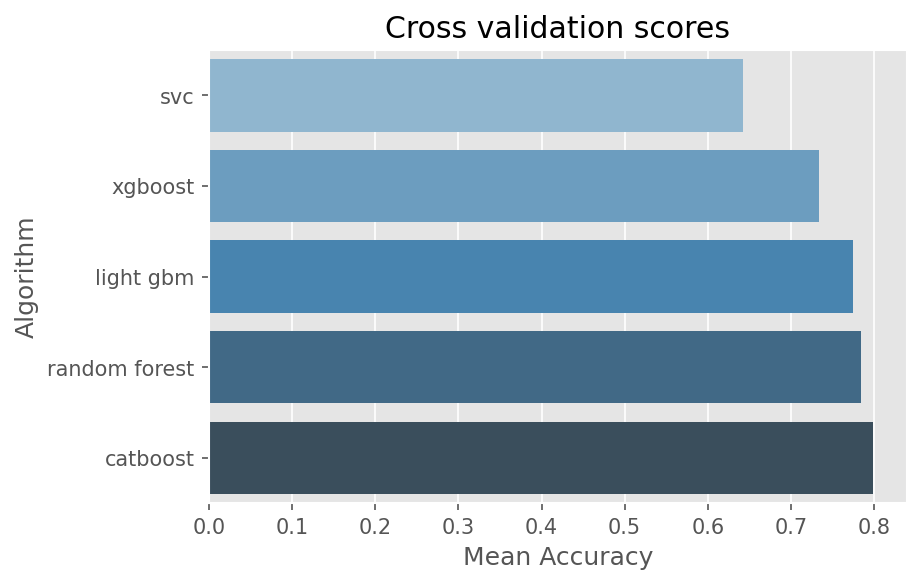

In [49]:
cv_res = pd.DataFrame({"CrossValMeans":list(cv_means_dict_sorted.values()),
                       "Algorithm":list(cv_means_dict_sorted.keys())})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Blues_d",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

## 3.4 Find Optimum hyper parameters of Top2 accuracy Models and compare Model Accuracy score

### 3.4.1 Bayesian Tuning with Random Forest

In [50]:
kfold = StratifiedKFold(n_splits=5)

def rf_cv(n_estimators, max_features, max_depth):
    val = cross_val_score(
        
        RandomForestClassifier(random_state=8888,
            n_estimators=int(n_estimators),
                               max_features=min(max_features, 0.999),  # float
                               max_depth=int(max_depth),
                               min_samples_split = 2),
        train_X, train_y, scoring='f1', cv=kfold
    ).mean()
    return val

pbounds = {'n_estimators': (5, 100),  
           'max_features': (0.1, 0.999),
           'max_depth': (3, 10)}

optimizer = BayesianOptimization(
    f=rf_cv, 
    pbounds=pbounds, 
    verbose=2,  
    random_state=1,
)
optimizer.maximize(  
    init_points=5, 
    n_iter=25,  
)
print(optimizer.res) 
print(optimizer.max)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.8303   |  5.919    |  0.7476   |  5.011    |
|  2        |  0.8455   |  5.116    |  0.2319   |  13.77    |
|  3        |  0.8474   |  4.304    |  0.4107   |  42.69    |
|  4        |  0.8529   |  6.772    |  0.4769   |  70.1     |
|  5        |  0.8406   |  4.431    |  0.8894   |  7.602    |
|  6        |  0.8535   |  9.035    |  0.4391   |  71.08    |
|  7        |  0.8523   |  6.451    |  0.5105   |  75.27    |
|  8        |  0.8396   |  10.0     |  0.9631   |  64.26    |
|  9        |  0.8377   |  3.0      |  0.999    |  72.6     |
|  10       |  0.8505   |  9.278    |  0.1548   |  74.06    |
|  11       |  0.8493   |  7.587    |  0.4438   |  78.62    |
|  12       |  0.8461   |  3.197    |  0.3317   |  80.91    |
|  13       |  0.8454   |  10.0     |  0.999    |  84.06    |
|  14       |  0.8444   |  8.989    |  0.1242   |  68.64    |
|  15   

{'target': 0.854035139599419, 'params': {'max_depth': 6.927509259046254, 'max_features': 0.6950341039840612, 'n_estimators': 81.03428759971908}}

## 3.4.2 Optuna with CatBoost

In [51]:
def objective(trial):

    param = {
        'random_state':8888,
        "depth":trial.suggest_int("depth",3,10),
        'learning_rate':trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "n_estimators":trial.suggest_int("n_estimators", 1000, 10000)        
    }

    

    catboost = CatBoostClassifier(**param)

    catboost.fit(train_X, train_y, eval_set=[(test_X, test_y)], verbose=0, early_stopping_rounds=100)

    preds = catboost.predict(test_X)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(test_y, pred_labels)
    return accuracy

In [52]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, timeout=300)

[I 2022-06-18 23:44:57,942] A new study created in memory with name: no-name-e8b574e0-24ce-4f6f-a562-38d89e0459b0
[I 2022-06-18 23:44:59,331] Trial 0 finished with value: 0.8 and parameters: {'depth': 3, 'learning_rate': 0.01570008196918127, 'n_estimators': 6471}. Best is trial 0 with value: 0.8.
[I 2022-06-18 23:45:00,699] Trial 1 finished with value: 0.8162162162162162 and parameters: {'depth': 6, 'learning_rate': 0.10142044201126181, 'n_estimators': 6760}. Best is trial 1 with value: 0.8162162162162162.
[I 2022-06-18 23:45:01,063] Trial 2 finished with value: 0.8054054054054054 and parameters: {'depth': 3, 'learning_rate': 0.14879086288849097, 'n_estimators': 4848}. Best is trial 1 with value: 0.8162162162162162.
[I 2022-06-18 23:45:07,606] Trial 3 finished with value: 0.7783783783783784 and parameters: {'depth': 10, 'learning_rate': 0.019629864666241167, 'n_estimators': 1700}. Best is trial 1 with value: 0.8162162162162162.
[I 2022-06-18 23:45:09,218] Trial 4 finished with value: 0

finished with value: 0.8162162162162162 and parameters: {'depth': 5, 'learning_rate': 0.026763419461744455, 'n_estimators': 6958}. Best is trial 12 with value: 0.8162162162162162.

In [53]:
params_catboost= {'depth': 5, 'learning_rate': 0.026763419461744455, 'n_estimators': 6958}
params_rfc={'max_depth': 6.927509259046254, 'max_features': 0.6950341039840612, 'n_estimators': 81}

## 3.4.3 Fit to two models

In [54]:
rfc_tuned=RandomForestClassifier(random_state=8888,**params_rfc)
rfc_tuned=rfc_tuned.fit(train_X,train_y)

In [55]:
catboost_tuned=CatBoostClassifier(random_state=8888,**params_catboost)
catboost_tuned=catboost_tuned.fit(
    train_X, train_y,
#     cat_features=cat_features,
#     eval_set=(test_X, test_y),
    verbose=False
)

In [56]:
classifiers.append(rfc_tuned)
classifiers.append(catboost_tuned)


accuracy_list = []
auc_list=[]
for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(accuracy_score(test_y,y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))

## 3.4.4 Compare Model Accuracy Score with using K Fold 

In [58]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=8888)
cv_results = []
for classifier in classifiers:
#     print('stop1')
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold))

# print('stop2')
cv_means = []
cv_std = []
for cv_result in cv_results:
#     print('stop3')
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
#     print('stop4')
# print('stop5')

Learning rate set to 0.008224
0:	learn: 0.6900887	total: 3.06ms	remaining: 3.05s
1:	learn: 0.6859500	total: 6.3ms	remaining: 3.14s
2:	learn: 0.6818621	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6780765	total: 14ms	remaining: 3.48s
4:	learn: 0.6744567	total: 17.5ms	remaining: 3.47s
5:	learn: 0.6707202	total: 21.1ms	remaining: 3.49s
6:	learn: 0.6670091	total: 24.7ms	remaining: 3.5s
7:	learn: 0.6637606	total: 28.4ms	remaining: 3.53s
8:	learn: 0.6608002	total: 32.2ms	remaining: 3.54s
9:	learn: 0.6577084	total: 35.9ms	remaining: 3.56s
10:	learn: 0.6547697	total: 39.6ms	remaining: 3.56s
11:	learn: 0.6516098	total: 42.8ms	remaining: 3.53s
12:	learn: 0.6483007	total: 46.1ms	remaining: 3.5s
13:	learn: 0.6449779	total: 49.5ms	remaining: 3.48s
14:	learn: 0.6420782	total: 52.5ms	remaining: 3.45s
15:	learn: 0.6391464	total: 55.8ms	remaining: 3.43s
16:	learn: 0.6363954	total: 58.9ms	remaining: 3.4s
17:	learn: 0.6333435	total: 62ms	remaining: 3.38s
18:	learn: 0.6304495	total: 65.6ms	remaining: 3.39s


198:	learn: 0.4143608	total: 691ms	remaining: 2.78s
199:	learn: 0.4136272	total: 694ms	remaining: 2.78s
200:	learn: 0.4133213	total: 698ms	remaining: 2.77s
201:	learn: 0.4127258	total: 701ms	remaining: 2.77s
202:	learn: 0.4121315	total: 706ms	remaining: 2.77s
203:	learn: 0.4117950	total: 712ms	remaining: 2.78s
204:	learn: 0.4114415	total: 715ms	remaining: 2.77s
205:	learn: 0.4109545	total: 735ms	remaining: 2.83s
206:	learn: 0.4105486	total: 740ms	remaining: 2.83s
207:	learn: 0.4098594	total: 743ms	remaining: 2.83s
208:	learn: 0.4094799	total: 747ms	remaining: 2.83s
209:	learn: 0.4090889	total: 751ms	remaining: 2.82s
210:	learn: 0.4085118	total: 755ms	remaining: 2.82s
211:	learn: 0.4080398	total: 759ms	remaining: 2.82s
212:	learn: 0.4077089	total: 763ms	remaining: 2.82s
213:	learn: 0.4072032	total: 767ms	remaining: 2.81s
214:	learn: 0.4068679	total: 770ms	remaining: 2.81s
215:	learn: 0.4063624	total: 774ms	remaining: 2.81s
216:	learn: 0.4057317	total: 778ms	remaining: 2.81s
217:	learn: 

364:	learn: 0.3524741	total: 1.4s	remaining: 2.44s
365:	learn: 0.3522175	total: 1.4s	remaining: 2.43s
366:	learn: 0.3519107	total: 1.41s	remaining: 2.43s
367:	learn: 0.3516842	total: 1.41s	remaining: 2.42s
368:	learn: 0.3513392	total: 1.42s	remaining: 2.42s
369:	learn: 0.3509762	total: 1.42s	remaining: 2.42s
370:	learn: 0.3504884	total: 1.42s	remaining: 2.41s
371:	learn: 0.3502581	total: 1.43s	remaining: 2.41s
372:	learn: 0.3499171	total: 1.43s	remaining: 2.4s
373:	learn: 0.3496142	total: 1.43s	remaining: 2.4s
374:	learn: 0.3493768	total: 1.44s	remaining: 2.39s
375:	learn: 0.3490707	total: 1.44s	remaining: 2.39s
376:	learn: 0.3487814	total: 1.45s	remaining: 2.39s
377:	learn: 0.3485790	total: 1.46s	remaining: 2.4s
378:	learn: 0.3484464	total: 1.46s	remaining: 2.39s
379:	learn: 0.3482949	total: 1.46s	remaining: 2.39s
380:	learn: 0.3479391	total: 1.47s	remaining: 2.38s
381:	learn: 0.3477189	total: 1.47s	remaining: 2.38s
382:	learn: 0.3475075	total: 1.48s	remaining: 2.38s
383:	learn: 0.347

566:	learn: 0.3029129	total: 2.09s	remaining: 1.6s
567:	learn: 0.3026145	total: 2.1s	remaining: 1.59s
568:	learn: 0.3022803	total: 2.1s	remaining: 1.59s
569:	learn: 0.3020371	total: 2.1s	remaining: 1.59s
570:	learn: 0.3018496	total: 2.11s	remaining: 1.58s
571:	learn: 0.3016540	total: 2.11s	remaining: 1.58s
572:	learn: 0.3015615	total: 2.11s	remaining: 1.58s
573:	learn: 0.3013580	total: 2.12s	remaining: 1.57s
574:	learn: 0.3009868	total: 2.12s	remaining: 1.57s
575:	learn: 0.3008201	total: 2.13s	remaining: 1.56s
576:	learn: 0.3005441	total: 2.13s	remaining: 1.56s
577:	learn: 0.3003387	total: 2.13s	remaining: 1.56s
578:	learn: 0.3001785	total: 2.13s	remaining: 1.55s
579:	learn: 0.3000745	total: 2.14s	remaining: 1.55s
580:	learn: 0.2999449	total: 2.14s	remaining: 1.54s
581:	learn: 0.2997964	total: 2.14s	remaining: 1.54s
582:	learn: 0.2993097	total: 2.15s	remaining: 1.53s
583:	learn: 0.2990095	total: 2.15s	remaining: 1.53s
584:	learn: 0.2987172	total: 2.15s	remaining: 1.53s
585:	learn: 0.29

772:	learn: 0.2597061	total: 2.79s	remaining: 818ms
773:	learn: 0.2596051	total: 2.79s	remaining: 814ms
774:	learn: 0.2594698	total: 2.79s	remaining: 810ms
775:	learn: 0.2592662	total: 2.79s	remaining: 807ms
776:	learn: 0.2589585	total: 2.8s	remaining: 803ms
777:	learn: 0.2586909	total: 2.8s	remaining: 799ms
778:	learn: 0.2585052	total: 2.8s	remaining: 796ms
779:	learn: 0.2583637	total: 2.81s	remaining: 792ms
780:	learn: 0.2581790	total: 2.81s	remaining: 788ms
781:	learn: 0.2579625	total: 2.81s	remaining: 785ms
782:	learn: 0.2578120	total: 2.82s	remaining: 781ms
783:	learn: 0.2576080	total: 2.82s	remaining: 777ms
784:	learn: 0.2575191	total: 2.83s	remaining: 774ms
785:	learn: 0.2574057	total: 2.83s	remaining: 770ms
786:	learn: 0.2572449	total: 2.83s	remaining: 766ms
787:	learn: 0.2570050	total: 2.83s	remaining: 763ms
788:	learn: 0.2567712	total: 2.84s	remaining: 759ms
789:	learn: 0.2565177	total: 2.84s	remaining: 755ms
790:	learn: 0.2563081	total: 2.85s	remaining: 752ms
791:	learn: 0.2

984:	learn: 0.2210145	total: 3.48s	remaining: 53ms
985:	learn: 0.2208163	total: 3.48s	remaining: 49.5ms
986:	learn: 0.2207123	total: 3.49s	remaining: 45.9ms
987:	learn: 0.2206552	total: 3.49s	remaining: 42.4ms
988:	learn: 0.2205257	total: 3.49s	remaining: 38.9ms
989:	learn: 0.2202674	total: 3.5s	remaining: 35.3ms
990:	learn: 0.2201037	total: 3.5s	remaining: 31.8ms
991:	learn: 0.2199614	total: 3.5s	remaining: 28.3ms
992:	learn: 0.2197949	total: 3.51s	remaining: 24.7ms
993:	learn: 0.2194709	total: 3.51s	remaining: 21.2ms
994:	learn: 0.2193204	total: 3.51s	remaining: 17.7ms
995:	learn: 0.2191445	total: 3.52s	remaining: 14.1ms
996:	learn: 0.2190610	total: 3.52s	remaining: 10.6ms
997:	learn: 0.2188439	total: 3.52s	remaining: 7.06ms
998:	learn: 0.2186129	total: 3.52s	remaining: 3.53ms
999:	learn: 0.2183919	total: 3.53s	remaining: 0us
Learning rate set to 0.008224
0:	learn: 0.6903278	total: 2.64ms	remaining: 2.64s
1:	learn: 0.6873130	total: 5.51ms	remaining: 2.75s
2:	learn: 0.6835768	total: 9

181:	learn: 0.4279784	total: 584ms	remaining: 2.63s
182:	learn: 0.4274267	total: 588ms	remaining: 2.63s
183:	learn: 0.4267139	total: 592ms	remaining: 2.62s
184:	learn: 0.4262741	total: 595ms	remaining: 2.62s
185:	learn: 0.4257565	total: 598ms	remaining: 2.62s
186:	learn: 0.4249836	total: 602ms	remaining: 2.62s
187:	learn: 0.4244074	total: 606ms	remaining: 2.62s
188:	learn: 0.4239589	total: 610ms	remaining: 2.62s
189:	learn: 0.4232451	total: 614ms	remaining: 2.62s
190:	learn: 0.4225724	total: 617ms	remaining: 2.61s
191:	learn: 0.4221579	total: 621ms	remaining: 2.61s
192:	learn: 0.4216108	total: 625ms	remaining: 2.61s
193:	learn: 0.4207833	total: 628ms	remaining: 2.61s
194:	learn: 0.4201410	total: 632ms	remaining: 2.61s
195:	learn: 0.4195929	total: 636ms	remaining: 2.61s
196:	learn: 0.4191804	total: 640ms	remaining: 2.61s
197:	learn: 0.4186507	total: 643ms	remaining: 2.6s
198:	learn: 0.4181971	total: 646ms	remaining: 2.6s
199:	learn: 0.4178750	total: 649ms	remaining: 2.6s
200:	learn: 0.4

382:	learn: 0.3500769	total: 1.27s	remaining: 2.04s
383:	learn: 0.3500503	total: 1.27s	remaining: 2.04s
384:	learn: 0.3497832	total: 1.27s	remaining: 2.03s
385:	learn: 0.3493736	total: 1.27s	remaining: 2.03s
386:	learn: 0.3491458	total: 1.28s	remaining: 2.03s
387:	learn: 0.3488293	total: 1.28s	remaining: 2.03s
388:	learn: 0.3486303	total: 1.29s	remaining: 2.02s
389:	learn: 0.3483771	total: 1.29s	remaining: 2.02s
390:	learn: 0.3478056	total: 1.3s	remaining: 2.02s
391:	learn: 0.3473679	total: 1.3s	remaining: 2.02s
392:	learn: 0.3472417	total: 1.31s	remaining: 2.02s
393:	learn: 0.3467935	total: 1.31s	remaining: 2.02s
394:	learn: 0.3464330	total: 1.31s	remaining: 2.01s
395:	learn: 0.3459438	total: 1.32s	remaining: 2.01s
396:	learn: 0.3457846	total: 1.32s	remaining: 2.01s
397:	learn: 0.3455025	total: 1.32s	remaining: 2s
398:	learn: 0.3452523	total: 1.33s	remaining: 2s
399:	learn: 0.3448896	total: 1.33s	remaining: 2s
400:	learn: 0.3446598	total: 1.33s	remaining: 1.99s
401:	learn: 0.3443516	t

589:	learn: 0.2976430	total: 1.95s	remaining: 1.36s
590:	learn: 0.2974164	total: 1.96s	remaining: 1.35s
591:	learn: 0.2971857	total: 1.96s	remaining: 1.35s
592:	learn: 0.2969341	total: 1.96s	remaining: 1.35s
593:	learn: 0.2967001	total: 1.96s	remaining: 1.34s
594:	learn: 0.2963818	total: 1.97s	remaining: 1.34s
595:	learn: 0.2961735	total: 1.97s	remaining: 1.34s
596:	learn: 0.2959430	total: 1.97s	remaining: 1.33s
597:	learn: 0.2956934	total: 1.98s	remaining: 1.33s
598:	learn: 0.2954435	total: 1.98s	remaining: 1.32s
599:	learn: 0.2952468	total: 1.98s	remaining: 1.32s
600:	learn: 0.2949516	total: 1.99s	remaining: 1.32s
601:	learn: 0.2946506	total: 1.99s	remaining: 1.31s
602:	learn: 0.2945238	total: 1.99s	remaining: 1.31s
603:	learn: 0.2942836	total: 2s	remaining: 1.31s
604:	learn: 0.2940754	total: 2s	remaining: 1.3s
605:	learn: 0.2939461	total: 2s	remaining: 1.3s
606:	learn: 0.2938110	total: 2s	remaining: 1.3s
607:	learn: 0.2935466	total: 2.01s	remaining: 1.29s
608:	learn: 0.2933004	total

748:	learn: 0.2653026	total: 2.47s	remaining: 827ms
749:	learn: 0.2650428	total: 2.47s	remaining: 824ms
750:	learn: 0.2647263	total: 2.48s	remaining: 821ms
751:	learn: 0.2645273	total: 2.48s	remaining: 817ms
752:	learn: 0.2642937	total: 2.48s	remaining: 814ms
753:	learn: 0.2641337	total: 2.48s	remaining: 811ms
754:	learn: 0.2639614	total: 2.49s	remaining: 808ms
755:	learn: 0.2637287	total: 2.49s	remaining: 804ms
756:	learn: 0.2635591	total: 2.5s	remaining: 801ms
757:	learn: 0.2633483	total: 2.5s	remaining: 798ms
758:	learn: 0.2631840	total: 2.5s	remaining: 795ms
759:	learn: 0.2630773	total: 2.51s	remaining: 791ms
760:	learn: 0.2629390	total: 2.51s	remaining: 788ms
761:	learn: 0.2627645	total: 2.51s	remaining: 785ms
762:	learn: 0.2625635	total: 2.52s	remaining: 781ms
763:	learn: 0.2622708	total: 2.52s	remaining: 778ms
764:	learn: 0.2621181	total: 2.52s	remaining: 775ms
765:	learn: 0.2619031	total: 2.52s	remaining: 771ms
766:	learn: 0.2617894	total: 2.53s	remaining: 768ms
767:	learn: 0.2

953:	learn: 0.2323996	total: 3.17s	remaining: 153ms
954:	learn: 0.2323599	total: 3.18s	remaining: 150ms
955:	learn: 0.2322306	total: 3.18s	remaining: 146ms
956:	learn: 0.2321104	total: 3.19s	remaining: 143ms
957:	learn: 0.2320444	total: 3.19s	remaining: 140ms
958:	learn: 0.2319222	total: 3.19s	remaining: 136ms
959:	learn: 0.2318411	total: 3.2s	remaining: 133ms
960:	learn: 0.2316094	total: 3.2s	remaining: 130ms
961:	learn: 0.2314549	total: 3.2s	remaining: 127ms
962:	learn: 0.2312808	total: 3.21s	remaining: 123ms
963:	learn: 0.2311608	total: 3.21s	remaining: 120ms
964:	learn: 0.2310608	total: 3.21s	remaining: 117ms
965:	learn: 0.2309570	total: 3.21s	remaining: 113ms
966:	learn: 0.2306929	total: 3.22s	remaining: 110ms
967:	learn: 0.2304977	total: 3.22s	remaining: 107ms
968:	learn: 0.2304053	total: 3.22s	remaining: 103ms
969:	learn: 0.2302671	total: 3.23s	remaining: 99.8ms
970:	learn: 0.2300937	total: 3.23s	remaining: 96.5ms
971:	learn: 0.2300550	total: 3.23s	remaining: 93.2ms
972:	learn: 

151:	learn: 0.4618272	total: 522ms	remaining: 2.91s
152:	learn: 0.4617271	total: 523ms	remaining: 2.9s
153:	learn: 0.4609288	total: 528ms	remaining: 2.9s
154:	learn: 0.4604802	total: 531ms	remaining: 2.9s
155:	learn: 0.4597006	total: 534ms	remaining: 2.89s
156:	learn: 0.4591700	total: 538ms	remaining: 2.89s
157:	learn: 0.4583371	total: 541ms	remaining: 2.88s
158:	learn: 0.4575029	total: 545ms	remaining: 2.88s
159:	learn: 0.4568797	total: 548ms	remaining: 2.88s
160:	learn: 0.4562413	total: 551ms	remaining: 2.87s
161:	learn: 0.4555798	total: 555ms	remaining: 2.87s
162:	learn: 0.4550299	total: 558ms	remaining: 2.87s
163:	learn: 0.4541547	total: 562ms	remaining: 2.86s
164:	learn: 0.4536010	total: 565ms	remaining: 2.86s
165:	learn: 0.4528527	total: 568ms	remaining: 2.85s
166:	learn: 0.4522407	total: 571ms	remaining: 2.85s
167:	learn: 0.4517923	total: 574ms	remaining: 2.84s
168:	learn: 0.4512000	total: 577ms	remaining: 2.84s
169:	learn: 0.4507387	total: 581ms	remaining: 2.84s
170:	learn: 0.4

348:	learn: 0.3797485	total: 1.21s	remaining: 2.26s
349:	learn: 0.3795069	total: 1.22s	remaining: 2.26s
350:	learn: 0.3791953	total: 1.22s	remaining: 2.25s
351:	learn: 0.3789919	total: 1.22s	remaining: 2.25s
352:	learn: 0.3787924	total: 1.23s	remaining: 2.25s
353:	learn: 0.3786829	total: 1.23s	remaining: 2.24s
354:	learn: 0.3783214	total: 1.23s	remaining: 2.24s
355:	learn: 0.3780522	total: 1.24s	remaining: 2.24s
356:	learn: 0.3778897	total: 1.24s	remaining: 2.23s
357:	learn: 0.3775816	total: 1.24s	remaining: 2.23s
358:	learn: 0.3773801	total: 1.25s	remaining: 2.22s
359:	learn: 0.3771334	total: 1.25s	remaining: 2.22s
360:	learn: 0.3770018	total: 1.25s	remaining: 2.22s
361:	learn: 0.3767318	total: 1.26s	remaining: 2.21s
362:	learn: 0.3762907	total: 1.26s	remaining: 2.21s
363:	learn: 0.3760259	total: 1.26s	remaining: 2.21s
364:	learn: 0.3757556	total: 1.27s	remaining: 2.2s
365:	learn: 0.3754274	total: 1.27s	remaining: 2.2s
366:	learn: 0.3752362	total: 1.27s	remaining: 2.2s
367:	learn: 0.3

555:	learn: 0.3260432	total: 1.9s	remaining: 1.51s
556:	learn: 0.3257247	total: 1.9s	remaining: 1.51s
557:	learn: 0.3254411	total: 1.91s	remaining: 1.51s
558:	learn: 0.3253701	total: 1.91s	remaining: 1.51s
559:	learn: 0.3251539	total: 1.91s	remaining: 1.5s
560:	learn: 0.3248381	total: 1.92s	remaining: 1.5s
561:	learn: 0.3245626	total: 1.92s	remaining: 1.5s
562:	learn: 0.3244906	total: 1.92s	remaining: 1.49s
563:	learn: 0.3240261	total: 1.93s	remaining: 1.49s
564:	learn: 0.3238527	total: 1.93s	remaining: 1.49s
565:	learn: 0.3235912	total: 1.93s	remaining: 1.48s
566:	learn: 0.3233714	total: 1.94s	remaining: 1.48s
567:	learn: 0.3231730	total: 1.94s	remaining: 1.48s
568:	learn: 0.3230902	total: 1.95s	remaining: 1.47s
569:	learn: 0.3229251	total: 1.95s	remaining: 1.47s
570:	learn: 0.3226930	total: 1.95s	remaining: 1.47s
571:	learn: 0.3224968	total: 1.96s	remaining: 1.46s
572:	learn: 0.3223766	total: 1.96s	remaining: 1.46s
573:	learn: 0.3221861	total: 1.96s	remaining: 1.46s
574:	learn: 0.321

746:	learn: 0.2860286	total: 2.58s	remaining: 875ms
747:	learn: 0.2857077	total: 2.59s	remaining: 871ms
748:	learn: 0.2853440	total: 2.59s	remaining: 868ms
749:	learn: 0.2850576	total: 2.59s	remaining: 864ms
750:	learn: 0.2848767	total: 2.6s	remaining: 861ms
751:	learn: 0.2846439	total: 2.6s	remaining: 857ms
752:	learn: 0.2843807	total: 2.6s	remaining: 854ms
753:	learn: 0.2841908	total: 2.61s	remaining: 850ms
754:	learn: 0.2839948	total: 2.62s	remaining: 849ms
755:	learn: 0.2838312	total: 2.62s	remaining: 846ms
756:	learn: 0.2835203	total: 2.62s	remaining: 842ms
757:	learn: 0.2833708	total: 2.63s	remaining: 838ms
758:	learn: 0.2831276	total: 2.63s	remaining: 835ms
759:	learn: 0.2829635	total: 2.63s	remaining: 831ms
760:	learn: 0.2826210	total: 2.64s	remaining: 828ms
761:	learn: 0.2824383	total: 2.64s	remaining: 825ms
762:	learn: 0.2823152	total: 2.64s	remaining: 821ms
763:	learn: 0.2821517	total: 2.65s	remaining: 818ms
764:	learn: 0.2819338	total: 2.65s	remaining: 814ms
765:	learn: 0.2

947:	learn: 0.2485830	total: 3.28s	remaining: 180ms
948:	learn: 0.2484819	total: 3.28s	remaining: 176ms
949:	learn: 0.2483462	total: 3.28s	remaining: 173ms
950:	learn: 0.2482145	total: 3.29s	remaining: 169ms
951:	learn: 0.2479529	total: 3.29s	remaining: 166ms
952:	learn: 0.2477381	total: 3.29s	remaining: 162ms
953:	learn: 0.2475817	total: 3.3s	remaining: 159ms
954:	learn: 0.2474620	total: 3.3s	remaining: 156ms
955:	learn: 0.2473011	total: 3.3s	remaining: 152ms
956:	learn: 0.2471897	total: 3.31s	remaining: 149ms
957:	learn: 0.2469388	total: 3.31s	remaining: 145ms
958:	learn: 0.2468393	total: 3.31s	remaining: 142ms
959:	learn: 0.2466873	total: 3.32s	remaining: 138ms
960:	learn: 0.2464936	total: 3.32s	remaining: 135ms
961:	learn: 0.2463525	total: 3.32s	remaining: 131ms
962:	learn: 0.2462171	total: 3.33s	remaining: 128ms
963:	learn: 0.2460211	total: 3.35s	remaining: 125ms
964:	learn: 0.2459935	total: 3.35s	remaining: 121ms
965:	learn: 0.2457355	total: 3.35s	remaining: 118ms
966:	learn: 0.2

131:	learn: 0.4595961	total: 440ms	remaining: 2.89s
132:	learn: 0.4587083	total: 445ms	remaining: 2.9s
133:	learn: 0.4579466	total: 449ms	remaining: 2.9s
134:	learn: 0.4569936	total: 452ms	remaining: 2.89s
135:	learn: 0.4564123	total: 455ms	remaining: 2.89s
136:	learn: 0.4556081	total: 459ms	remaining: 2.89s
137:	learn: 0.4544079	total: 463ms	remaining: 2.89s
138:	learn: 0.4537076	total: 466ms	remaining: 2.88s
139:	learn: 0.4529626	total: 469ms	remaining: 2.88s
140:	learn: 0.4524643	total: 472ms	remaining: 2.88s
141:	learn: 0.4519091	total: 475ms	remaining: 2.87s
142:	learn: 0.4508461	total: 479ms	remaining: 2.87s
143:	learn: 0.4499910	total: 482ms	remaining: 2.86s
144:	learn: 0.4494221	total: 485ms	remaining: 2.86s
145:	learn: 0.4484282	total: 489ms	remaining: 2.86s
146:	learn: 0.4475681	total: 492ms	remaining: 2.85s
147:	learn: 0.4468552	total: 495ms	remaining: 2.85s
148:	learn: 0.4464533	total: 499ms	remaining: 2.85s
149:	learn: 0.4461369	total: 501ms	remaining: 2.84s
150:	learn: 0.

341:	learn: 0.3644522	total: 1.13s	remaining: 2.17s
342:	learn: 0.3639758	total: 1.13s	remaining: 2.17s
343:	learn: 0.3638300	total: 1.13s	remaining: 2.16s
344:	learn: 0.3635217	total: 1.14s	remaining: 2.16s
345:	learn: 0.3632932	total: 1.14s	remaining: 2.16s
346:	learn: 0.3630075	total: 1.14s	remaining: 2.15s
347:	learn: 0.3628638	total: 1.15s	remaining: 2.15s
348:	learn: 0.3625274	total: 1.15s	remaining: 2.15s
349:	learn: 0.3623769	total: 1.15s	remaining: 2.14s
350:	learn: 0.3618928	total: 1.16s	remaining: 2.14s
351:	learn: 0.3616287	total: 1.16s	remaining: 2.13s
352:	learn: 0.3612985	total: 1.16s	remaining: 2.13s
353:	learn: 0.3610333	total: 1.17s	remaining: 2.13s
354:	learn: 0.3608021	total: 1.17s	remaining: 2.12s
355:	learn: 0.3603952	total: 1.17s	remaining: 2.12s
356:	learn: 0.3600292	total: 1.17s	remaining: 2.12s
357:	learn: 0.3597955	total: 1.18s	remaining: 2.11s
358:	learn: 0.3595797	total: 1.18s	remaining: 2.11s
359:	learn: 0.3592886	total: 1.18s	remaining: 2.1s
360:	learn: 0

512:	learn: 0.3205374	total: 1.65s	remaining: 1.56s
513:	learn: 0.3203152	total: 1.65s	remaining: 1.56s
514:	learn: 0.3200163	total: 1.65s	remaining: 1.55s
515:	learn: 0.3196589	total: 1.65s	remaining: 1.55s
516:	learn: 0.3194242	total: 1.66s	remaining: 1.55s
517:	learn: 0.3191868	total: 1.66s	remaining: 1.55s
518:	learn: 0.3189584	total: 1.67s	remaining: 1.54s
519:	learn: 0.3188084	total: 1.67s	remaining: 1.54s
520:	learn: 0.3185350	total: 1.67s	remaining: 1.54s
521:	learn: 0.3184183	total: 1.68s	remaining: 1.53s
522:	learn: 0.3182810	total: 1.68s	remaining: 1.53s
523:	learn: 0.3181262	total: 1.68s	remaining: 1.53s
524:	learn: 0.3178789	total: 1.68s	remaining: 1.52s
525:	learn: 0.3176229	total: 1.69s	remaining: 1.52s
526:	learn: 0.3174989	total: 1.69s	remaining: 1.52s
527:	learn: 0.3173715	total: 1.69s	remaining: 1.51s
528:	learn: 0.3172411	total: 1.7s	remaining: 1.51s
529:	learn: 0.3170737	total: 1.7s	remaining: 1.51s
530:	learn: 0.3168616	total: 1.7s	remaining: 1.5s
531:	learn: 0.31

683:	learn: 0.2856448	total: 2.16s	remaining: 1000ms
684:	learn: 0.2856417	total: 2.17s	remaining: 996ms
685:	learn: 0.2853301	total: 2.17s	remaining: 993ms
686:	learn: 0.2852699	total: 2.17s	remaining: 990ms
687:	learn: 0.2850789	total: 2.17s	remaining: 986ms
688:	learn: 0.2848972	total: 2.18s	remaining: 983ms
689:	learn: 0.2846613	total: 2.18s	remaining: 980ms
690:	learn: 0.2845142	total: 2.18s	remaining: 977ms
691:	learn: 0.2844011	total: 2.19s	remaining: 973ms
692:	learn: 0.2840973	total: 2.19s	remaining: 970ms
693:	learn: 0.2838291	total: 2.19s	remaining: 967ms
694:	learn: 0.2837007	total: 2.19s	remaining: 964ms
695:	learn: 0.2834400	total: 2.2s	remaining: 961ms
696:	learn: 0.2833127	total: 2.2s	remaining: 957ms
697:	learn: 0.2832127	total: 2.2s	remaining: 954ms
698:	learn: 0.2830856	total: 2.21s	remaining: 951ms
699:	learn: 0.2828902	total: 2.21s	remaining: 948ms
700:	learn: 0.2826397	total: 2.21s	remaining: 944ms
701:	learn: 0.2824683	total: 2.22s	remaining: 941ms
702:	learn: 0.

848:	learn: 0.2538168	total: 2.68s	remaining: 477ms
849:	learn: 0.2535992	total: 2.68s	remaining: 474ms
850:	learn: 0.2534789	total: 2.69s	remaining: 470ms
851:	learn: 0.2533835	total: 2.69s	remaining: 467ms
852:	learn: 0.2532058	total: 2.69s	remaining: 464ms
853:	learn: 0.2531277	total: 2.69s	remaining: 461ms
854:	learn: 0.2527862	total: 2.7s	remaining: 458ms
855:	learn: 0.2525909	total: 2.7s	remaining: 455ms
856:	learn: 0.2523813	total: 2.71s	remaining: 452ms
857:	learn: 0.2522541	total: 2.71s	remaining: 448ms
858:	learn: 0.2521675	total: 2.71s	remaining: 445ms
859:	learn: 0.2520162	total: 2.71s	remaining: 442ms
860:	learn: 0.2518691	total: 2.72s	remaining: 439ms
861:	learn: 0.2516697	total: 2.72s	remaining: 436ms
862:	learn: 0.2515787	total: 2.73s	remaining: 433ms
863:	learn: 0.2514175	total: 2.73s	remaining: 430ms
864:	learn: 0.2513434	total: 2.73s	remaining: 427ms
865:	learn: 0.2511188	total: 2.73s	remaining: 423ms
866:	learn: 0.2508525	total: 2.74s	remaining: 420ms
867:	learn: 0.

54:	learn: 0.5394572	total: 175ms	remaining: 3.01s
55:	learn: 0.5378094	total: 178ms	remaining: 3.01s
56:	learn: 0.5358995	total: 181ms	remaining: 3s
57:	learn: 0.5335457	total: 184ms	remaining: 2.99s
58:	learn: 0.5322247	total: 187ms	remaining: 2.98s
59:	learn: 0.5306655	total: 190ms	remaining: 2.98s
60:	learn: 0.5292864	total: 193ms	remaining: 2.97s
61:	learn: 0.5273283	total: 196ms	remaining: 2.96s
62:	learn: 0.5255653	total: 199ms	remaining: 2.96s
63:	learn: 0.5237937	total: 202ms	remaining: 2.96s
64:	learn: 0.5223776	total: 205ms	remaining: 2.95s
65:	learn: 0.5212487	total: 208ms	remaining: 2.94s
66:	learn: 0.5193417	total: 211ms	remaining: 2.93s
67:	learn: 0.5176018	total: 232ms	remaining: 3.18s
68:	learn: 0.5161985	total: 236ms	remaining: 3.18s
69:	learn: 0.5147969	total: 238ms	remaining: 3.17s
70:	learn: 0.5132653	total: 241ms	remaining: 3.15s
71:	learn: 0.5118102	total: 245ms	remaining: 3.15s
72:	learn: 0.5103004	total: 249ms	remaining: 3.16s
73:	learn: 0.5088708	total: 252ms	

218:	learn: 0.3932386	total: 695ms	remaining: 2.48s
219:	learn: 0.3926013	total: 721ms	remaining: 2.56s
220:	learn: 0.3920964	total: 735ms	remaining: 2.59s
221:	learn: 0.3915108	total: 738ms	remaining: 2.58s
222:	learn: 0.3910673	total: 741ms	remaining: 2.58s
223:	learn: 0.3906166	total: 743ms	remaining: 2.58s
224:	learn: 0.3899726	total: 746ms	remaining: 2.57s
225:	learn: 0.3895843	total: 749ms	remaining: 2.57s
226:	learn: 0.3890453	total: 752ms	remaining: 2.56s
227:	learn: 0.3887796	total: 755ms	remaining: 2.56s
228:	learn: 0.3883013	total: 758ms	remaining: 2.55s
229:	learn: 0.3879336	total: 760ms	remaining: 2.54s
230:	learn: 0.3875999	total: 763ms	remaining: 2.54s
231:	learn: 0.3873486	total: 766ms	remaining: 2.54s
232:	learn: 0.3868838	total: 770ms	remaining: 2.53s
233:	learn: 0.3864801	total: 772ms	remaining: 2.53s
234:	learn: 0.3859766	total: 775ms	remaining: 2.52s
235:	learn: 0.3855121	total: 778ms	remaining: 2.52s
236:	learn: 0.3850461	total: 781ms	remaining: 2.52s
237:	learn: 

421:	learn: 0.3261482	total: 1.39s	remaining: 1.91s
422:	learn: 0.3259248	total: 1.4s	remaining: 1.9s
423:	learn: 0.3256283	total: 1.4s	remaining: 1.9s
424:	learn: 0.3254306	total: 1.4s	remaining: 1.9s
425:	learn: 0.3251375	total: 1.4s	remaining: 1.89s
426:	learn: 0.3247898	total: 1.41s	remaining: 1.89s
427:	learn: 0.3245537	total: 1.41s	remaining: 1.89s
428:	learn: 0.3243972	total: 1.41s	remaining: 1.88s
429:	learn: 0.3241634	total: 1.42s	remaining: 1.88s
430:	learn: 0.3239705	total: 1.42s	remaining: 1.87s
431:	learn: 0.3237197	total: 1.42s	remaining: 1.87s
432:	learn: 0.3235280	total: 1.43s	remaining: 1.87s
433:	learn: 0.3233978	total: 1.43s	remaining: 1.86s
434:	learn: 0.3232559	total: 1.44s	remaining: 1.87s
435:	learn: 0.3229411	total: 1.44s	remaining: 1.86s
436:	learn: 0.3226381	total: 1.44s	remaining: 1.86s
437:	learn: 0.3223735	total: 1.45s	remaining: 1.86s
438:	learn: 0.3221537	total: 1.45s	remaining: 1.85s
439:	learn: 0.3219803	total: 1.45s	remaining: 1.85s
440:	learn: 0.32176

589:	learn: 0.2899199	total: 1.91s	remaining: 1.33s
590:	learn: 0.2895749	total: 1.91s	remaining: 1.32s
591:	learn: 0.2893949	total: 1.91s	remaining: 1.32s
592:	learn: 0.2893009	total: 1.92s	remaining: 1.32s
593:	learn: 0.2891684	total: 1.92s	remaining: 1.31s
594:	learn: 0.2890360	total: 1.94s	remaining: 1.32s
595:	learn: 0.2888119	total: 1.94s	remaining: 1.31s
596:	learn: 0.2887602	total: 1.94s	remaining: 1.31s
597:	learn: 0.2886319	total: 1.95s	remaining: 1.31s
598:	learn: 0.2883752	total: 1.95s	remaining: 1.3s
599:	learn: 0.2880431	total: 1.95s	remaining: 1.3s
600:	learn: 0.2877649	total: 1.95s	remaining: 1.3s
601:	learn: 0.2875350	total: 1.96s	remaining: 1.29s
602:	learn: 0.2873868	total: 1.96s	remaining: 1.29s
603:	learn: 0.2873065	total: 1.96s	remaining: 1.29s
604:	learn: 0.2871870	total: 1.97s	remaining: 1.28s
605:	learn: 0.2867852	total: 1.97s	remaining: 1.28s
606:	learn: 0.2866036	total: 1.97s	remaining: 1.28s
607:	learn: 0.2863631	total: 1.97s	remaining: 1.27s
608:	learn: 0.2

751:	learn: 0.2592724	total: 2.43s	remaining: 801ms
752:	learn: 0.2591438	total: 2.43s	remaining: 798ms
753:	learn: 0.2590019	total: 2.44s	remaining: 797ms
754:	learn: 0.2588605	total: 2.45s	remaining: 794ms
755:	learn: 0.2586460	total: 2.45s	remaining: 791ms
756:	learn: 0.2584953	total: 2.45s	remaining: 787ms
757:	learn: 0.2583468	total: 2.46s	remaining: 784ms
758:	learn: 0.2581093	total: 2.46s	remaining: 781ms
759:	learn: 0.2578214	total: 2.46s	remaining: 778ms
760:	learn: 0.2578166	total: 2.46s	remaining: 774ms
761:	learn: 0.2576943	total: 2.47s	remaining: 771ms
762:	learn: 0.2575714	total: 2.47s	remaining: 768ms
763:	learn: 0.2573299	total: 2.47s	remaining: 764ms
764:	learn: 0.2571669	total: 2.48s	remaining: 761ms
765:	learn: 0.2569189	total: 2.48s	remaining: 758ms
766:	learn: 0.2568094	total: 2.48s	remaining: 755ms
767:	learn: 0.2566664	total: 2.49s	remaining: 751ms
768:	learn: 0.2564701	total: 2.49s	remaining: 748ms
769:	learn: 0.2563412	total: 2.49s	remaining: 745ms
770:	learn: 

913:	learn: 0.2310715	total: 2.95s	remaining: 277ms
914:	learn: 0.2309537	total: 2.95s	remaining: 274ms
915:	learn: 0.2308265	total: 2.96s	remaining: 271ms
916:	learn: 0.2306419	total: 2.96s	remaining: 268ms
917:	learn: 0.2303098	total: 2.96s	remaining: 265ms
918:	learn: 0.2301711	total: 2.96s	remaining: 261ms
919:	learn: 0.2299301	total: 2.97s	remaining: 258ms
920:	learn: 0.2296735	total: 2.97s	remaining: 255ms
921:	learn: 0.2295718	total: 2.98s	remaining: 252ms
922:	learn: 0.2293492	total: 2.98s	remaining: 248ms
923:	learn: 0.2291120	total: 2.98s	remaining: 245ms
924:	learn: 0.2290422	total: 2.98s	remaining: 242ms
925:	learn: 0.2288978	total: 2.99s	remaining: 239ms
926:	learn: 0.2287686	total: 2.99s	remaining: 235ms
927:	learn: 0.2285933	total: 2.99s	remaining: 232ms
928:	learn: 0.2285028	total: 3s	remaining: 229ms
929:	learn: 0.2283800	total: 3s	remaining: 226ms
930:	learn: 0.2282295	total: 3s	remaining: 223ms
931:	learn: 0.2280910	total: 3s	remaining: 219ms
932:	learn: 0.2280327	to

84:	learn: 0.4003011	total: 177ms	remaining: 14.3s
85:	learn: 0.3995182	total: 179ms	remaining: 14.3s
86:	learn: 0.3985025	total: 182ms	remaining: 14.3s
87:	learn: 0.3974329	total: 184ms	remaining: 14.4s
88:	learn: 0.3961733	total: 186ms	remaining: 14.4s
89:	learn: 0.3951760	total: 189ms	remaining: 14.4s
90:	learn: 0.3944671	total: 191ms	remaining: 14.4s
91:	learn: 0.3937032	total: 193ms	remaining: 14.4s
92:	learn: 0.3930782	total: 196ms	remaining: 14.4s
93:	learn: 0.3919092	total: 198ms	remaining: 14.5s
94:	learn: 0.3912930	total: 201ms	remaining: 14.5s
95:	learn: 0.3901716	total: 203ms	remaining: 14.5s
96:	learn: 0.3890627	total: 205ms	remaining: 14.5s
97:	learn: 0.3880133	total: 208ms	remaining: 14.6s
98:	learn: 0.3872812	total: 210ms	remaining: 14.6s
99:	learn: 0.3865754	total: 213ms	remaining: 14.6s
100:	learn: 0.3856548	total: 215ms	remaining: 14.6s
101:	learn: 0.3846779	total: 217ms	remaining: 14.6s
102:	learn: 0.3834719	total: 220ms	remaining: 14.6s
103:	learn: 0.3827384	total:

296:	learn: 0.2609799	total: 689ms	remaining: 15.4s
297:	learn: 0.2604069	total: 719ms	remaining: 16.1s
298:	learn: 0.2599091	total: 721ms	remaining: 16.1s
299:	learn: 0.2593282	total: 724ms	remaining: 16.1s
300:	learn: 0.2590888	total: 726ms	remaining: 16.1s
301:	learn: 0.2590351	total: 728ms	remaining: 16s
302:	learn: 0.2588187	total: 730ms	remaining: 16s
303:	learn: 0.2585680	total: 733ms	remaining: 16.1s
304:	learn: 0.2579855	total: 736ms	remaining: 16s
305:	learn: 0.2577687	total: 738ms	remaining: 16s
306:	learn: 0.2574639	total: 741ms	remaining: 16s
307:	learn: 0.2562260	total: 743ms	remaining: 16s
308:	learn: 0.2558081	total: 745ms	remaining: 16s
309:	learn: 0.2552145	total: 748ms	remaining: 16s
310:	learn: 0.2550656	total: 750ms	remaining: 16s
311:	learn: 0.2546213	total: 753ms	remaining: 16s
312:	learn: 0.2541887	total: 755ms	remaining: 16s
313:	learn: 0.2538572	total: 757ms	remaining: 16s
314:	learn: 0.2529561	total: 759ms	remaining: 16s
315:	learn: 0.2525617	total: 762ms	rem

495:	learn: 0.1808146	total: 1.22s	remaining: 15.8s
496:	learn: 0.1805425	total: 1.22s	remaining: 15.8s
497:	learn: 0.1804749	total: 1.22s	remaining: 15.8s
498:	learn: 0.1801202	total: 1.22s	remaining: 15.8s
499:	learn: 0.1796267	total: 1.23s	remaining: 15.8s
500:	learn: 0.1791045	total: 1.23s	remaining: 15.8s
501:	learn: 0.1790700	total: 1.23s	remaining: 15.8s
502:	learn: 0.1786911	total: 1.23s	remaining: 15.8s
503:	learn: 0.1784043	total: 1.24s	remaining: 15.8s
504:	learn: 0.1779885	total: 1.25s	remaining: 15.9s
505:	learn: 0.1779399	total: 1.25s	remaining: 16s
506:	learn: 0.1774775	total: 1.26s	remaining: 16s
507:	learn: 0.1772127	total: 1.26s	remaining: 16s
508:	learn: 0.1769676	total: 1.26s	remaining: 16s
509:	learn: 0.1769280	total: 1.26s	remaining: 16s
510:	learn: 0.1767188	total: 1.27s	remaining: 16s
511:	learn: 0.1765251	total: 1.27s	remaining: 16s
512:	learn: 0.1762612	total: 1.27s	remaining: 16s
513:	learn: 0.1762116	total: 1.28s	remaining: 16s
514:	learn: 0.1758541	total: 1

690:	learn: 0.1320010	total: 1.73s	remaining: 15.7s
691:	learn: 0.1316810	total: 1.73s	remaining: 15.7s
692:	learn: 0.1314968	total: 1.73s	remaining: 15.7s
693:	learn: 0.1314777	total: 1.74s	remaining: 15.7s
694:	learn: 0.1311365	total: 1.74s	remaining: 15.7s
695:	learn: 0.1308709	total: 1.74s	remaining: 15.7s
696:	learn: 0.1306111	total: 1.74s	remaining: 15.7s
697:	learn: 0.1304794	total: 1.75s	remaining: 15.7s
698:	learn: 0.1302514	total: 1.75s	remaining: 15.7s
699:	learn: 0.1300672	total: 1.75s	remaining: 15.7s
700:	learn: 0.1299311	total: 1.75s	remaining: 15.7s
701:	learn: 0.1297661	total: 1.76s	remaining: 15.7s
702:	learn: 0.1294299	total: 1.76s	remaining: 15.7s
703:	learn: 0.1291789	total: 1.76s	remaining: 15.7s
704:	learn: 0.1289963	total: 1.76s	remaining: 15.7s
705:	learn: 0.1287048	total: 1.77s	remaining: 15.7s
706:	learn: 0.1286363	total: 1.77s	remaining: 15.7s
707:	learn: 0.1285017	total: 1.77s	remaining: 15.7s
708:	learn: 0.1283464	total: 1.77s	remaining: 15.7s
709:	learn: 

870:	learn: 0.1030869	total: 2.24s	remaining: 15.7s
871:	learn: 0.1028190	total: 2.25s	remaining: 15.7s
872:	learn: 0.1026721	total: 2.25s	remaining: 15.7s
873:	learn: 0.1026621	total: 2.25s	remaining: 15.7s
874:	learn: 0.1025350	total: 2.25s	remaining: 15.7s
875:	learn: 0.1023203	total: 2.26s	remaining: 15.7s
876:	learn: 0.1022201	total: 2.26s	remaining: 15.7s
877:	learn: 0.1021387	total: 2.26s	remaining: 15.7s
878:	learn: 0.1020503	total: 2.27s	remaining: 15.7s
879:	learn: 0.1019082	total: 2.27s	remaining: 15.7s
880:	learn: 0.1018998	total: 2.27s	remaining: 15.7s
881:	learn: 0.1015673	total: 2.27s	remaining: 15.7s
882:	learn: 0.1015363	total: 2.27s	remaining: 15.7s
883:	learn: 0.1013632	total: 2.28s	remaining: 15.7s
884:	learn: 0.1013455	total: 2.28s	remaining: 15.7s
885:	learn: 0.1013361	total: 2.28s	remaining: 15.6s
886:	learn: 0.1013229	total: 2.29s	remaining: 15.6s
887:	learn: 0.1013144	total: 2.29s	remaining: 15.6s
888:	learn: 0.1011533	total: 2.29s	remaining: 15.6s
889:	learn: 

1065:	learn: 0.0802032	total: 2.75s	remaining: 15.2s
1066:	learn: 0.0801543	total: 2.75s	remaining: 15.2s
1067:	learn: 0.0801076	total: 2.76s	remaining: 15.2s
1068:	learn: 0.0800589	total: 2.76s	remaining: 15.2s
1069:	learn: 0.0800483	total: 2.76s	remaining: 15.2s
1070:	learn: 0.0800369	total: 2.76s	remaining: 15.2s
1071:	learn: 0.0799701	total: 2.77s	remaining: 15.2s
1072:	learn: 0.0799063	total: 2.77s	remaining: 15.2s
1073:	learn: 0.0797977	total: 2.77s	remaining: 15.2s
1074:	learn: 0.0796510	total: 2.77s	remaining: 15.2s
1075:	learn: 0.0795815	total: 2.78s	remaining: 15.2s
1076:	learn: 0.0794374	total: 2.78s	remaining: 15.2s
1077:	learn: 0.0793213	total: 2.78s	remaining: 15.2s
1078:	learn: 0.0793151	total: 2.78s	remaining: 15.2s
1079:	learn: 0.0792164	total: 2.79s	remaining: 15.2s
1080:	learn: 0.0790496	total: 2.79s	remaining: 15.2s
1081:	learn: 0.0789463	total: 2.79s	remaining: 15.2s
1082:	learn: 0.0788819	total: 2.79s	remaining: 15.2s
1083:	learn: 0.0788326	total: 2.8s	remaining: 

1259:	learn: 0.0646782	total: 3.26s	remaining: 14.8s
1260:	learn: 0.0646746	total: 3.26s	remaining: 14.7s
1261:	learn: 0.0646702	total: 3.27s	remaining: 14.7s
1262:	learn: 0.0646625	total: 3.27s	remaining: 14.7s
1263:	learn: 0.0646282	total: 3.27s	remaining: 14.7s
1264:	learn: 0.0646167	total: 3.28s	remaining: 14.8s
1265:	learn: 0.0645401	total: 3.28s	remaining: 14.7s
1266:	learn: 0.0644764	total: 3.28s	remaining: 14.7s
1267:	learn: 0.0644110	total: 3.29s	remaining: 14.7s
1268:	learn: 0.0643002	total: 3.29s	remaining: 14.7s
1269:	learn: 0.0642337	total: 3.29s	remaining: 14.7s
1270:	learn: 0.0640197	total: 3.32s	remaining: 14.8s
1271:	learn: 0.0639478	total: 3.32s	remaining: 14.8s
1272:	learn: 0.0638770	total: 3.32s	remaining: 14.8s
1273:	learn: 0.0638154	total: 3.32s	remaining: 14.8s
1274:	learn: 0.0637143	total: 3.33s	remaining: 14.8s
1275:	learn: 0.0636322	total: 3.33s	remaining: 14.8s
1276:	learn: 0.0634756	total: 3.33s	remaining: 14.8s
1277:	learn: 0.0633550	total: 3.33s	remaining:

1450:	learn: 0.0522933	total: 3.78s	remaining: 14.3s
1451:	learn: 0.0522563	total: 3.78s	remaining: 14.3s
1452:	learn: 0.0522477	total: 3.78s	remaining: 14.3s
1453:	learn: 0.0521887	total: 3.78s	remaining: 14.3s
1454:	learn: 0.0521702	total: 3.79s	remaining: 14.3s
1455:	learn: 0.0520787	total: 3.79s	remaining: 14.3s
1456:	learn: 0.0519752	total: 3.79s	remaining: 14.3s
1457:	learn: 0.0519078	total: 3.79s	remaining: 14.3s
1458:	learn: 0.0518100	total: 3.79s	remaining: 14.3s
1459:	learn: 0.0517684	total: 3.8s	remaining: 14.3s
1460:	learn: 0.0517077	total: 3.8s	remaining: 14.3s
1461:	learn: 0.0516661	total: 3.8s	remaining: 14.3s
1462:	learn: 0.0516633	total: 3.8s	remaining: 14.3s
1463:	learn: 0.0516268	total: 3.81s	remaining: 14.3s
1464:	learn: 0.0515301	total: 3.81s	remaining: 14.3s
1465:	learn: 0.0514942	total: 3.81s	remaining: 14.3s
1466:	learn: 0.0514424	total: 3.81s	remaining: 14.3s
1467:	learn: 0.0514182	total: 3.82s	remaining: 14.3s
1468:	learn: 0.0514154	total: 3.82s	remaining: 14.

1643:	learn: 0.0433567	total: 4.29s	remaining: 13.9s
1644:	learn: 0.0433025	total: 4.29s	remaining: 13.9s
1645:	learn: 0.0432955	total: 4.29s	remaining: 13.8s
1646:	learn: 0.0432869	total: 4.29s	remaining: 13.8s
1647:	learn: 0.0432577	total: 4.3s	remaining: 13.8s
1648:	learn: 0.0432143	total: 4.3s	remaining: 13.8s
1649:	learn: 0.0431969	total: 4.3s	remaining: 13.8s
1650:	learn: 0.0431343	total: 4.3s	remaining: 13.8s
1651:	learn: 0.0431082	total: 4.3s	remaining: 13.8s
1652:	learn: 0.0430851	total: 4.31s	remaining: 13.8s
1653:	learn: 0.0430829	total: 4.31s	remaining: 13.8s
1654:	learn: 0.0430810	total: 4.31s	remaining: 13.8s
1655:	learn: 0.0429897	total: 4.31s	remaining: 13.8s
1656:	learn: 0.0429167	total: 4.32s	remaining: 13.8s
1657:	learn: 0.0429106	total: 4.32s	remaining: 13.8s
1658:	learn: 0.0429009	total: 4.32s	remaining: 13.8s
1659:	learn: 0.0428586	total: 4.32s	remaining: 13.8s
1660:	learn: 0.0428364	total: 4.33s	remaining: 13.8s
1661:	learn: 0.0427944	total: 4.33s	remaining: 13.8

1838:	learn: 0.0367643	total: 4.79s	remaining: 13.3s
1839:	learn: 0.0367628	total: 4.79s	remaining: 13.3s
1840:	learn: 0.0367060	total: 4.8s	remaining: 13.3s
1841:	learn: 0.0366560	total: 4.8s	remaining: 13.3s
1842:	learn: 0.0366337	total: 4.8s	remaining: 13.3s
1843:	learn: 0.0366280	total: 4.8s	remaining: 13.3s
1844:	learn: 0.0365636	total: 4.81s	remaining: 13.3s
1845:	learn: 0.0365486	total: 4.81s	remaining: 13.3s
1846:	learn: 0.0365486	total: 4.81s	remaining: 13.3s
1847:	learn: 0.0365112	total: 4.81s	remaining: 13.3s
1848:	learn: 0.0364788	total: 4.82s	remaining: 13.3s
1849:	learn: 0.0364770	total: 4.82s	remaining: 13.3s
1850:	learn: 0.0364749	total: 4.82s	remaining: 13.3s
1851:	learn: 0.0364305	total: 4.82s	remaining: 13.3s
1852:	learn: 0.0364128	total: 4.83s	remaining: 13.3s
1853:	learn: 0.0363554	total: 4.83s	remaining: 13.3s
1854:	learn: 0.0363046	total: 4.83s	remaining: 13.3s
1855:	learn: 0.0362732	total: 4.83s	remaining: 13.3s
1856:	learn: 0.0362717	total: 4.83s	remaining: 13.

2038:	learn: 0.0317317	total: 5.31s	remaining: 12.8s
2039:	learn: 0.0317168	total: 5.31s	remaining: 12.8s
2040:	learn: 0.0317117	total: 5.31s	remaining: 12.8s
2041:	learn: 0.0317117	total: 5.32s	remaining: 12.8s
2042:	learn: 0.0316981	total: 5.32s	remaining: 12.8s
2043:	learn: 0.0316487	total: 5.32s	remaining: 12.8s
2044:	learn: 0.0316487	total: 5.33s	remaining: 12.8s
2045:	learn: 0.0316092	total: 5.33s	remaining: 12.8s
2046:	learn: 0.0316018	total: 5.33s	remaining: 12.8s
2047:	learn: 0.0315884	total: 5.33s	remaining: 12.8s
2048:	learn: 0.0315399	total: 5.34s	remaining: 12.8s
2049:	learn: 0.0315127	total: 5.34s	remaining: 12.8s
2050:	learn: 0.0314862	total: 5.34s	remaining: 12.8s
2051:	learn: 0.0314392	total: 5.34s	remaining: 12.8s
2052:	learn: 0.0314246	total: 5.35s	remaining: 12.8s
2053:	learn: 0.0314135	total: 5.35s	remaining: 12.8s
2054:	learn: 0.0314068	total: 5.35s	remaining: 12.8s
2055:	learn: 0.0313836	total: 5.36s	remaining: 12.8s
2056:	learn: 0.0313697	total: 5.36s	remaining:

2230:	learn: 0.0282651	total: 5.81s	remaining: 12.3s
2231:	learn: 0.0282643	total: 5.81s	remaining: 12.3s
2232:	learn: 0.0282643	total: 5.81s	remaining: 12.3s
2233:	learn: 0.0282643	total: 5.81s	remaining: 12.3s
2234:	learn: 0.0282450	total: 5.82s	remaining: 12.3s
2235:	learn: 0.0282449	total: 5.82s	remaining: 12.3s
2236:	learn: 0.0282387	total: 5.82s	remaining: 12.3s
2237:	learn: 0.0282387	total: 5.82s	remaining: 12.3s
2238:	learn: 0.0282221	total: 5.83s	remaining: 12.3s
2239:	learn: 0.0282083	total: 5.83s	remaining: 12.3s
2240:	learn: 0.0281836	total: 5.83s	remaining: 12.3s
2241:	learn: 0.0281594	total: 5.83s	remaining: 12.3s
2242:	learn: 0.0281489	total: 5.84s	remaining: 12.3s
2243:	learn: 0.0281489	total: 5.84s	remaining: 12.3s
2244:	learn: 0.0281478	total: 5.84s	remaining: 12.3s
2245:	learn: 0.0281478	total: 5.84s	remaining: 12.3s
2246:	learn: 0.0281421	total: 5.85s	remaining: 12.3s
2247:	learn: 0.0281409	total: 5.85s	remaining: 12.3s
2248:	learn: 0.0281363	total: 5.85s	remaining:

2421:	learn: 0.0257376	total: 6.32s	remaining: 11.8s
2422:	learn: 0.0257265	total: 6.32s	remaining: 11.8s
2423:	learn: 0.0256847	total: 6.32s	remaining: 11.8s
2424:	learn: 0.0256644	total: 6.32s	remaining: 11.8s
2425:	learn: 0.0256182	total: 6.33s	remaining: 11.8s
2426:	learn: 0.0256181	total: 6.33s	remaining: 11.8s
2427:	learn: 0.0255765	total: 6.33s	remaining: 11.8s
2428:	learn: 0.0255553	total: 6.33s	remaining: 11.8s
2429:	learn: 0.0255529	total: 6.34s	remaining: 11.8s
2430:	learn: 0.0255528	total: 6.34s	remaining: 11.8s
2431:	learn: 0.0255444	total: 6.34s	remaining: 11.8s
2432:	learn: 0.0255337	total: 6.34s	remaining: 11.8s
2433:	learn: 0.0254907	total: 6.35s	remaining: 11.8s
2434:	learn: 0.0254892	total: 6.35s	remaining: 11.8s
2435:	learn: 0.0254892	total: 6.35s	remaining: 11.8s
2436:	learn: 0.0254766	total: 6.36s	remaining: 11.8s
2437:	learn: 0.0254635	total: 6.36s	remaining: 11.8s
2438:	learn: 0.0254635	total: 6.36s	remaining: 11.8s
2439:	learn: 0.0254625	total: 6.36s	remaining:

2593:	learn: 0.0234262	total: 6.82s	remaining: 11.5s
2594:	learn: 0.0234104	total: 6.82s	remaining: 11.5s
2595:	learn: 0.0234064	total: 6.83s	remaining: 11.5s
2596:	learn: 0.0233956	total: 6.83s	remaining: 11.5s
2597:	learn: 0.0233748	total: 6.83s	remaining: 11.5s
2598:	learn: 0.0233669	total: 6.84s	remaining: 11.5s
2599:	learn: 0.0233517	total: 6.84s	remaining: 11.5s
2600:	learn: 0.0233507	total: 6.84s	remaining: 11.5s
2601:	learn: 0.0233372	total: 6.84s	remaining: 11.5s
2602:	learn: 0.0233322	total: 6.85s	remaining: 11.5s
2603:	learn: 0.0233022	total: 6.85s	remaining: 11.5s
2604:	learn: 0.0232932	total: 6.85s	remaining: 11.5s
2605:	learn: 0.0232783	total: 6.86s	remaining: 11.5s
2606:	learn: 0.0232507	total: 6.86s	remaining: 11.4s
2607:	learn: 0.0232347	total: 6.86s	remaining: 11.4s
2608:	learn: 0.0232317	total: 6.87s	remaining: 11.4s
2609:	learn: 0.0232103	total: 6.87s	remaining: 11.4s
2610:	learn: 0.0231928	total: 6.87s	remaining: 11.4s
2611:	learn: 0.0231716	total: 6.87s	remaining:

2753:	learn: 0.0214876	total: 7.33s	remaining: 11.2s
2754:	learn: 0.0214783	total: 7.33s	remaining: 11.2s
2755:	learn: 0.0214713	total: 7.33s	remaining: 11.2s
2756:	learn: 0.0214542	total: 7.33s	remaining: 11.2s
2757:	learn: 0.0214493	total: 7.34s	remaining: 11.2s
2758:	learn: 0.0214493	total: 7.34s	remaining: 11.2s
2759:	learn: 0.0214485	total: 7.34s	remaining: 11.2s
2760:	learn: 0.0214485	total: 7.34s	remaining: 11.2s
2761:	learn: 0.0214381	total: 7.35s	remaining: 11.2s
2762:	learn: 0.0214373	total: 7.35s	remaining: 11.2s
2763:	learn: 0.0214365	total: 7.35s	remaining: 11.2s
2764:	learn: 0.0214184	total: 7.36s	remaining: 11.2s
2765:	learn: 0.0213991	total: 7.36s	remaining: 11.2s
2766:	learn: 0.0213980	total: 7.36s	remaining: 11.2s
2767:	learn: 0.0213868	total: 7.37s	remaining: 11.2s
2768:	learn: 0.0213704	total: 7.37s	remaining: 11.2s
2769:	learn: 0.0213690	total: 7.37s	remaining: 11.1s
2770:	learn: 0.0213523	total: 7.38s	remaining: 11.1s
2771:	learn: 0.0213331	total: 7.38s	remaining:

2934:	learn: 0.0202493	total: 7.83s	remaining: 10.7s
2935:	learn: 0.0202485	total: 7.83s	remaining: 10.7s
2936:	learn: 0.0202388	total: 7.84s	remaining: 10.7s
2937:	learn: 0.0202342	total: 7.84s	remaining: 10.7s
2938:	learn: 0.0202342	total: 7.84s	remaining: 10.7s
2939:	learn: 0.0202336	total: 7.85s	remaining: 10.7s
2940:	learn: 0.0202169	total: 7.85s	remaining: 10.7s
2941:	learn: 0.0202102	total: 7.85s	remaining: 10.7s
2942:	learn: 0.0201914	total: 7.86s	remaining: 10.7s
2943:	learn: 0.0201717	total: 7.86s	remaining: 10.7s
2944:	learn: 0.0201650	total: 7.86s	remaining: 10.7s
2945:	learn: 0.0201650	total: 7.87s	remaining: 10.7s
2946:	learn: 0.0201521	total: 7.87s	remaining: 10.7s
2947:	learn: 0.0201372	total: 7.87s	remaining: 10.7s
2948:	learn: 0.0201336	total: 7.87s	remaining: 10.7s
2949:	learn: 0.0201183	total: 7.88s	remaining: 10.7s
2950:	learn: 0.0201072	total: 7.88s	remaining: 10.7s
2951:	learn: 0.0201072	total: 7.88s	remaining: 10.7s
2952:	learn: 0.0200861	total: 7.88s	remaining:

3094:	learn: 0.0189535	total: 8.34s	remaining: 10.4s
3095:	learn: 0.0189445	total: 8.34s	remaining: 10.4s
3096:	learn: 0.0189284	total: 8.34s	remaining: 10.4s
3097:	learn: 0.0189240	total: 8.35s	remaining: 10.4s
3098:	learn: 0.0189195	total: 8.35s	remaining: 10.4s
3099:	learn: 0.0189169	total: 8.35s	remaining: 10.4s
3100:	learn: 0.0188955	total: 8.35s	remaining: 10.4s
3101:	learn: 0.0188841	total: 8.36s	remaining: 10.4s
3102:	learn: 0.0188777	total: 8.36s	remaining: 10.4s
3103:	learn: 0.0188772	total: 8.36s	remaining: 10.4s
3104:	learn: 0.0188772	total: 8.37s	remaining: 10.4s
3105:	learn: 0.0188546	total: 8.37s	remaining: 10.4s
3106:	learn: 0.0188390	total: 8.37s	remaining: 10.4s
3107:	learn: 0.0188391	total: 8.38s	remaining: 10.4s
3108:	learn: 0.0188384	total: 8.38s	remaining: 10.4s
3109:	learn: 0.0188257	total: 8.38s	remaining: 10.4s
3110:	learn: 0.0188191	total: 8.38s	remaining: 10.4s
3111:	learn: 0.0188152	total: 8.4s	remaining: 10.4s
3112:	learn: 0.0188038	total: 8.4s	remaining: 1

3282:	learn: 0.0179105	total: 8.84s	remaining: 9.9s
3283:	learn: 0.0179105	total: 8.85s	remaining: 9.9s
3284:	learn: 0.0179029	total: 8.85s	remaining: 9.89s
3285:	learn: 0.0178843	total: 8.85s	remaining: 9.89s
3286:	learn: 0.0178644	total: 8.85s	remaining: 9.89s
3287:	learn: 0.0178636	total: 8.86s	remaining: 9.88s
3288:	learn: 0.0178636	total: 8.86s	remaining: 9.88s
3289:	learn: 0.0178438	total: 8.86s	remaining: 9.88s
3290:	learn: 0.0178365	total: 8.86s	remaining: 9.88s
3291:	learn: 0.0178293	total: 8.87s	remaining: 9.87s
3292:	learn: 0.0178186	total: 8.87s	remaining: 9.87s
3293:	learn: 0.0178065	total: 8.87s	remaining: 9.87s
3294:	learn: 0.0177994	total: 8.87s	remaining: 9.87s
3295:	learn: 0.0177888	total: 8.88s	remaining: 9.86s
3296:	learn: 0.0177758	total: 8.88s	remaining: 9.86s
3297:	learn: 0.0177702	total: 8.88s	remaining: 9.86s
3298:	learn: 0.0177699	total: 8.88s	remaining: 9.85s
3299:	learn: 0.0177652	total: 8.89s	remaining: 9.85s
3300:	learn: 0.0177652	total: 8.89s	remaining: 9

3454:	learn: 0.0168879	total: 9.35s	remaining: 9.48s
3455:	learn: 0.0168821	total: 9.35s	remaining: 9.48s
3456:	learn: 0.0168821	total: 9.36s	remaining: 9.47s
3457:	learn: 0.0168668	total: 9.36s	remaining: 9.47s
3458:	learn: 0.0168668	total: 9.36s	remaining: 9.47s
3459:	learn: 0.0168601	total: 9.37s	remaining: 9.47s
3460:	learn: 0.0168591	total: 9.37s	remaining: 9.47s
3461:	learn: 0.0168536	total: 9.37s	remaining: 9.46s
3462:	learn: 0.0168534	total: 9.37s	remaining: 9.46s
3463:	learn: 0.0168448	total: 9.38s	remaining: 9.46s
3464:	learn: 0.0168448	total: 9.38s	remaining: 9.46s
3465:	learn: 0.0168386	total: 9.38s	remaining: 9.46s
3466:	learn: 0.0168309	total: 9.39s	remaining: 9.45s
3467:	learn: 0.0168308	total: 9.39s	remaining: 9.45s
3468:	learn: 0.0168161	total: 9.4s	remaining: 9.45s
3469:	learn: 0.0168108	total: 9.4s	remaining: 9.45s
3470:	learn: 0.0168032	total: 9.41s	remaining: 9.45s
3471:	learn: 0.0167955	total: 9.41s	remaining: 9.45s
3472:	learn: 0.0167954	total: 9.41s	remaining: 9

3610:	learn: 0.0160411	total: 9.85s	remaining: 9.13s
3611:	learn: 0.0160297	total: 9.86s	remaining: 9.13s
3612:	learn: 0.0160297	total: 9.86s	remaining: 9.13s
3613:	learn: 0.0160298	total: 9.86s	remaining: 9.13s
3614:	learn: 0.0160254	total: 9.87s	remaining: 9.12s
3615:	learn: 0.0160186	total: 9.87s	remaining: 9.12s
3616:	learn: 0.0160078	total: 9.87s	remaining: 9.12s
3617:	learn: 0.0160079	total: 9.87s	remaining: 9.12s
3618:	learn: 0.0160077	total: 9.88s	remaining: 9.11s
3619:	learn: 0.0159887	total: 9.88s	remaining: 9.11s
3620:	learn: 0.0159883	total: 9.88s	remaining: 9.11s
3621:	learn: 0.0159819	total: 9.89s	remaining: 9.11s
3622:	learn: 0.0159768	total: 9.89s	remaining: 9.1s
3623:	learn: 0.0159722	total: 9.89s	remaining: 9.1s
3624:	learn: 0.0159640	total: 9.89s	remaining: 9.1s
3625:	learn: 0.0159640	total: 9.9s	remaining: 9.1s
3626:	learn: 0.0159640	total: 9.9s	remaining: 9.09s
3627:	learn: 0.0159623	total: 9.9s	remaining: 9.09s
3628:	learn: 0.0159621	total: 9.91s	remaining: 9.09s


3803:	learn: 0.0153907	total: 10.4s	remaining: 8.59s
3804:	learn: 0.0153712	total: 10.4s	remaining: 8.59s
3805:	learn: 0.0153671	total: 10.4s	remaining: 8.58s
3806:	learn: 0.0153623	total: 10.4s	remaining: 8.58s
3807:	learn: 0.0153524	total: 10.4s	remaining: 8.58s
3808:	learn: 0.0153523	total: 10.4s	remaining: 8.57s
3809:	learn: 0.0153523	total: 10.4s	remaining: 8.57s
3810:	learn: 0.0153522	total: 10.4s	remaining: 8.57s
3811:	learn: 0.0153390	total: 10.4s	remaining: 8.57s
3812:	learn: 0.0153389	total: 10.4s	remaining: 8.56s
3813:	learn: 0.0153389	total: 10.4s	remaining: 8.56s
3814:	learn: 0.0153389	total: 10.4s	remaining: 8.56s
3815:	learn: 0.0153388	total: 10.4s	remaining: 8.55s
3816:	learn: 0.0153386	total: 10.4s	remaining: 8.55s
3817:	learn: 0.0153381	total: 10.4s	remaining: 8.55s
3818:	learn: 0.0153381	total: 10.4s	remaining: 8.54s
3819:	learn: 0.0153380	total: 10.4s	remaining: 8.54s
3820:	learn: 0.0153380	total: 10.4s	remaining: 8.54s
3821:	learn: 0.0153342	total: 10.4s	remaining:

4026:	learn: 0.0147729	total: 10.9s	remaining: 7.91s
4027:	learn: 0.0147729	total: 10.9s	remaining: 7.91s
4028:	learn: 0.0147729	total: 10.9s	remaining: 7.91s
4029:	learn: 0.0147729	total: 10.9s	remaining: 7.9s
4030:	learn: 0.0147729	total: 10.9s	remaining: 7.9s
4031:	learn: 0.0147729	total: 10.9s	remaining: 7.9s
4032:	learn: 0.0147729	total: 10.9s	remaining: 7.89s
4033:	learn: 0.0147729	total: 10.9s	remaining: 7.89s
4034:	learn: 0.0147729	total: 10.9s	remaining: 7.89s
4035:	learn: 0.0147686	total: 10.9s	remaining: 7.88s
4036:	learn: 0.0147686	total: 10.9s	remaining: 7.88s
4037:	learn: 0.0147681	total: 10.9s	remaining: 7.88s
4038:	learn: 0.0147619	total: 10.9s	remaining: 7.88s
4039:	learn: 0.0147618	total: 10.9s	remaining: 7.87s
4040:	learn: 0.0147570	total: 10.9s	remaining: 7.87s
4041:	learn: 0.0147568	total: 10.9s	remaining: 7.87s
4042:	learn: 0.0147501	total: 10.9s	remaining: 7.86s
4043:	learn: 0.0147407	total: 10.9s	remaining: 7.86s
4044:	learn: 0.0147308	total: 10.9s	remaining: 7.

4237:	learn: 0.0138898	total: 11.4s	remaining: 7.31s
4238:	learn: 0.0138851	total: 11.4s	remaining: 7.3s
4239:	learn: 0.0138851	total: 11.4s	remaining: 7.3s
4240:	learn: 0.0138850	total: 11.4s	remaining: 7.3s
4241:	learn: 0.0138743	total: 11.4s	remaining: 7.29s
4242:	learn: 0.0138730	total: 11.4s	remaining: 7.29s
4243:	learn: 0.0138659	total: 11.4s	remaining: 7.29s
4244:	learn: 0.0138635	total: 11.4s	remaining: 7.29s
4245:	learn: 0.0138498	total: 11.4s	remaining: 7.28s
4246:	learn: 0.0138371	total: 11.4s	remaining: 7.28s
4247:	learn: 0.0138335	total: 11.4s	remaining: 7.28s
4248:	learn: 0.0138335	total: 11.4s	remaining: 7.28s
4249:	learn: 0.0138322	total: 11.4s	remaining: 7.27s
4250:	learn: 0.0138322	total: 11.4s	remaining: 7.27s
4251:	learn: 0.0138321	total: 11.4s	remaining: 7.27s
4252:	learn: 0.0138321	total: 11.4s	remaining: 7.26s
4253:	learn: 0.0138321	total: 11.4s	remaining: 7.26s
4254:	learn: 0.0138285	total: 11.4s	remaining: 7.26s
4255:	learn: 0.0138276	total: 11.4s	remaining: 7.

4453:	learn: 0.0132474	total: 11.9s	remaining: 6.68s
4454:	learn: 0.0132391	total: 11.9s	remaining: 6.68s
4455:	learn: 0.0132377	total: 11.9s	remaining: 6.68s
4456:	learn: 0.0132378	total: 11.9s	remaining: 6.68s
4457:	learn: 0.0132303	total: 11.9s	remaining: 6.67s
4458:	learn: 0.0132253	total: 11.9s	remaining: 6.67s
4459:	learn: 0.0132208	total: 11.9s	remaining: 6.67s
4460:	learn: 0.0132207	total: 11.9s	remaining: 6.66s
4461:	learn: 0.0132117	total: 11.9s	remaining: 6.66s
4462:	learn: 0.0132105	total: 11.9s	remaining: 6.66s
4463:	learn: 0.0131992	total: 11.9s	remaining: 6.66s
4464:	learn: 0.0131959	total: 11.9s	remaining: 6.65s
4465:	learn: 0.0131960	total: 11.9s	remaining: 6.65s
4466:	learn: 0.0131959	total: 11.9s	remaining: 6.65s
4467:	learn: 0.0131908	total: 11.9s	remaining: 6.64s
4468:	learn: 0.0131871	total: 11.9s	remaining: 6.64s
4469:	learn: 0.0131871	total: 11.9s	remaining: 6.64s
4470:	learn: 0.0131871	total: 11.9s	remaining: 6.63s
4471:	learn: 0.0131844	total: 11.9s	remaining:

4663:	learn: 0.0128422	total: 12.4s	remaining: 6.1s
4664:	learn: 0.0128423	total: 12.4s	remaining: 6.1s
4665:	learn: 0.0128422	total: 12.4s	remaining: 6.1s
4666:	learn: 0.0128422	total: 12.4s	remaining: 6.09s
4667:	learn: 0.0128422	total: 12.4s	remaining: 6.09s
4668:	learn: 0.0128421	total: 12.4s	remaining: 6.09s
4669:	learn: 0.0128367	total: 12.4s	remaining: 6.08s
4670:	learn: 0.0128367	total: 12.4s	remaining: 6.08s
4671:	learn: 0.0128367	total: 12.4s	remaining: 6.08s
4672:	learn: 0.0128366	total: 12.4s	remaining: 6.08s
4673:	learn: 0.0128366	total: 12.4s	remaining: 6.07s
4674:	learn: 0.0128367	total: 12.4s	remaining: 6.07s
4675:	learn: 0.0128367	total: 12.4s	remaining: 6.07s
4676:	learn: 0.0128365	total: 12.4s	remaining: 6.06s
4677:	learn: 0.0128342	total: 12.4s	remaining: 6.06s
4678:	learn: 0.0128342	total: 12.4s	remaining: 6.06s
4679:	learn: 0.0128341	total: 12.4s	remaining: 6.05s
4680:	learn: 0.0128341	total: 12.4s	remaining: 6.05s
4681:	learn: 0.0128341	total: 12.4s	remaining: 6.

4880:	learn: 0.0125305	total: 12.9s	remaining: 5.5s
4881:	learn: 0.0125302	total: 12.9s	remaining: 5.49s
4882:	learn: 0.0125301	total: 12.9s	remaining: 5.49s
4883:	learn: 0.0125265	total: 12.9s	remaining: 5.49s
4884:	learn: 0.0125184	total: 12.9s	remaining: 5.48s
4885:	learn: 0.0125170	total: 12.9s	remaining: 5.48s
4886:	learn: 0.0125101	total: 12.9s	remaining: 5.48s
4887:	learn: 0.0125100	total: 12.9s	remaining: 5.48s
4888:	learn: 0.0125100	total: 12.9s	remaining: 5.47s
4889:	learn: 0.0125100	total: 12.9s	remaining: 5.47s
4890:	learn: 0.0125100	total: 12.9s	remaining: 5.47s
4891:	learn: 0.0125100	total: 12.9s	remaining: 5.46s
4892:	learn: 0.0125099	total: 12.9s	remaining: 5.46s
4893:	learn: 0.0125041	total: 12.9s	remaining: 5.46s
4894:	learn: 0.0125040	total: 12.9s	remaining: 5.46s
4895:	learn: 0.0125041	total: 12.9s	remaining: 5.45s
4896:	learn: 0.0125033	total: 13s	remaining: 5.45s
4897:	learn: 0.0124972	total: 13s	remaining: 5.45s
4898:	learn: 0.0124971	total: 13s	remaining: 5.45s


5108:	learn: 0.0122187	total: 13.4s	remaining: 4.86s
5109:	learn: 0.0122043	total: 13.4s	remaining: 4.86s
5110:	learn: 0.0122043	total: 13.4s	remaining: 4.85s
5111:	learn: 0.0122021	total: 13.4s	remaining: 4.85s
5112:	learn: 0.0122021	total: 13.4s	remaining: 4.85s
5113:	learn: 0.0122021	total: 13.4s	remaining: 4.84s
5114:	learn: 0.0122020	total: 13.4s	remaining: 4.84s
5115:	learn: 0.0122020	total: 13.5s	remaining: 4.84s
5116:	learn: 0.0122020	total: 13.5s	remaining: 4.84s
5117:	learn: 0.0121950	total: 13.5s	remaining: 4.84s
5118:	learn: 0.0121949	total: 13.5s	remaining: 4.84s
5119:	learn: 0.0121949	total: 13.5s	remaining: 4.83s
5120:	learn: 0.0121927	total: 13.5s	remaining: 4.83s
5121:	learn: 0.0121927	total: 13.5s	remaining: 4.83s
5122:	learn: 0.0121883	total: 13.5s	remaining: 4.83s
5123:	learn: 0.0121883	total: 13.5s	remaining: 4.82s
5124:	learn: 0.0121883	total: 13.5s	remaining: 4.82s
5125:	learn: 0.0121882	total: 13.5s	remaining: 4.82s
5126:	learn: 0.0121882	total: 13.5s	remaining:

5327:	learn: 0.0119527	total: 13.9s	remaining: 4.26s
5328:	learn: 0.0119527	total: 13.9s	remaining: 4.26s
5329:	learn: 0.0119527	total: 13.9s	remaining: 4.26s
5330:	learn: 0.0119527	total: 13.9s	remaining: 4.25s
5331:	learn: 0.0119527	total: 13.9s	remaining: 4.25s
5332:	learn: 0.0119527	total: 13.9s	remaining: 4.25s
5333:	learn: 0.0119527	total: 13.9s	remaining: 4.25s
5334:	learn: 0.0119527	total: 13.9s	remaining: 4.24s
5335:	learn: 0.0119526	total: 14s	remaining: 4.24s
5336:	learn: 0.0119526	total: 14s	remaining: 4.24s
5337:	learn: 0.0119527	total: 14s	remaining: 4.24s
5338:	learn: 0.0119526	total: 14s	remaining: 4.23s
5339:	learn: 0.0119526	total: 14s	remaining: 4.23s
5340:	learn: 0.0119439	total: 14s	remaining: 4.23s
5341:	learn: 0.0119439	total: 14s	remaining: 4.22s
5342:	learn: 0.0119439	total: 14s	remaining: 4.22s
5343:	learn: 0.0119439	total: 14s	remaining: 4.22s
5344:	learn: 0.0119439	total: 14s	remaining: 4.22s
5345:	learn: 0.0119439	total: 14s	remaining: 4.21s
5346:	learn: 0.

5550:	learn: 0.0116966	total: 14.4s	remaining: 3.66s
5551:	learn: 0.0116922	total: 14.4s	remaining: 3.66s
5552:	learn: 0.0116923	total: 14.4s	remaining: 3.65s
5553:	learn: 0.0116792	total: 14.4s	remaining: 3.65s
5554:	learn: 0.0116778	total: 14.5s	remaining: 3.65s
5555:	learn: 0.0116777	total: 14.5s	remaining: 3.65s
5556:	learn: 0.0116776	total: 14.5s	remaining: 3.64s
5557:	learn: 0.0116683	total: 14.5s	remaining: 3.64s
5558:	learn: 0.0116548	total: 14.5s	remaining: 3.64s
5559:	learn: 0.0116503	total: 14.5s	remaining: 3.64s
5560:	learn: 0.0116453	total: 14.5s	remaining: 3.63s
5561:	learn: 0.0116443	total: 14.5s	remaining: 3.63s
5562:	learn: 0.0116443	total: 14.5s	remaining: 3.63s
5563:	learn: 0.0116426	total: 14.5s	remaining: 3.63s
5564:	learn: 0.0116427	total: 14.5s	remaining: 3.62s
5565:	learn: 0.0116427	total: 14.5s	remaining: 3.62s
5566:	learn: 0.0116427	total: 14.5s	remaining: 3.62s
5567:	learn: 0.0116378	total: 14.5s	remaining: 3.62s
5568:	learn: 0.0116378	total: 14.5s	remaining:

5764:	learn: 0.0114233	total: 15s	remaining: 3.09s
5765:	learn: 0.0114233	total: 15s	remaining: 3.09s
5766:	learn: 0.0114167	total: 15s	remaining: 3.09s
5767:	learn: 0.0114167	total: 15s	remaining: 3.09s
5768:	learn: 0.0114166	total: 15s	remaining: 3.08s
5769:	learn: 0.0114086	total: 15s	remaining: 3.08s
5770:	learn: 0.0114084	total: 15s	remaining: 3.08s
5771:	learn: 0.0114085	total: 15s	remaining: 3.08s
5772:	learn: 0.0114063	total: 15s	remaining: 3.07s
5773:	learn: 0.0114063	total: 15s	remaining: 3.07s
5774:	learn: 0.0114062	total: 15s	remaining: 3.07s
5775:	learn: 0.0114062	total: 15s	remaining: 3.06s
5776:	learn: 0.0114026	total: 15s	remaining: 3.06s
5777:	learn: 0.0114026	total: 15s	remaining: 3.06s
5778:	learn: 0.0114025	total: 15s	remaining: 3.06s
5779:	learn: 0.0114025	total: 15s	remaining: 3.05s
5780:	learn: 0.0114025	total: 15s	remaining: 3.05s
5781:	learn: 0.0114024	total: 15s	remaining: 3.05s
5782:	learn: 0.0114016	total: 15s	remaining: 3.05s
5783:	learn: 0.0114016	total: 1

5994:	learn: 0.0112177	total: 15.5s	remaining: 2.48s
5995:	learn: 0.0112177	total: 15.5s	remaining: 2.48s
5996:	learn: 0.0112177	total: 15.5s	remaining: 2.48s
5997:	learn: 0.0112177	total: 15.5s	remaining: 2.48s
5998:	learn: 0.0112177	total: 15.5s	remaining: 2.47s
5999:	learn: 0.0112177	total: 15.5s	remaining: 2.47s
6000:	learn: 0.0112175	total: 15.5s	remaining: 2.47s
6001:	learn: 0.0112111	total: 15.5s	remaining: 2.46s
6002:	learn: 0.0112111	total: 15.5s	remaining: 2.46s
6003:	learn: 0.0112111	total: 15.5s	remaining: 2.46s
6004:	learn: 0.0112111	total: 15.5s	remaining: 2.46s
6005:	learn: 0.0112043	total: 15.5s	remaining: 2.45s
6006:	learn: 0.0112043	total: 15.5s	remaining: 2.45s
6007:	learn: 0.0112044	total: 15.5s	remaining: 2.45s
6008:	learn: 0.0112002	total: 15.5s	remaining: 2.45s
6009:	learn: 0.0111939	total: 15.5s	remaining: 2.44s
6010:	learn: 0.0111877	total: 15.5s	remaining: 2.44s
6011:	learn: 0.0111822	total: 15.5s	remaining: 2.44s
6012:	learn: 0.0111822	total: 15.5s	remaining:

6217:	learn: 0.0110891	total: 16s	remaining: 1.9s
6218:	learn: 0.0110892	total: 16s	remaining: 1.9s
6219:	learn: 0.0110891	total: 16s	remaining: 1.9s
6220:	learn: 0.0110883	total: 16s	remaining: 1.89s
6221:	learn: 0.0110882	total: 16s	remaining: 1.89s
6222:	learn: 0.0110882	total: 16s	remaining: 1.89s
6223:	learn: 0.0110882	total: 16s	remaining: 1.89s
6224:	learn: 0.0110881	total: 16s	remaining: 1.88s
6225:	learn: 0.0110882	total: 16s	remaining: 1.88s
6226:	learn: 0.0110882	total: 16s	remaining: 1.88s
6227:	learn: 0.0110881	total: 16s	remaining: 1.87s
6228:	learn: 0.0110882	total: 16s	remaining: 1.87s
6229:	learn: 0.0110881	total: 16s	remaining: 1.87s
6230:	learn: 0.0110881	total: 16s	remaining: 1.87s
6231:	learn: 0.0110881	total: 16s	remaining: 1.86s
6232:	learn: 0.0110881	total: 16s	remaining: 1.86s
6233:	learn: 0.0110881	total: 16s	remaining: 1.86s
6234:	learn: 0.0110881	total: 16s	remaining: 1.86s
6235:	learn: 0.0110881	total: 16s	remaining: 1.85s
6236:	learn: 0.0110881	total: 16s	

6446:	learn: 0.0110313	total: 16.5s	remaining: 1.31s
6447:	learn: 0.0110275	total: 16.5s	remaining: 1.3s
6448:	learn: 0.0110251	total: 16.5s	remaining: 1.3s
6449:	learn: 0.0110252	total: 16.5s	remaining: 1.3s
6450:	learn: 0.0110244	total: 16.5s	remaining: 1.3s
6451:	learn: 0.0110243	total: 16.5s	remaining: 1.29s
6452:	learn: 0.0110243	total: 16.5s	remaining: 1.29s
6453:	learn: 0.0110242	total: 16.5s	remaining: 1.29s
6454:	learn: 0.0110242	total: 16.5s	remaining: 1.28s
6455:	learn: 0.0110242	total: 16.5s	remaining: 1.28s
6456:	learn: 0.0110242	total: 16.5s	remaining: 1.28s
6457:	learn: 0.0110242	total: 16.5s	remaining: 1.28s
6458:	learn: 0.0110242	total: 16.5s	remaining: 1.27s
6459:	learn: 0.0110242	total: 16.5s	remaining: 1.27s
6460:	learn: 0.0110242	total: 16.5s	remaining: 1.27s
6461:	learn: 0.0110242	total: 16.5s	remaining: 1.27s
6462:	learn: 0.0110242	total: 16.5s	remaining: 1.26s
6463:	learn: 0.0110241	total: 16.5s	remaining: 1.26s
6464:	learn: 0.0110241	total: 16.5s	remaining: 1.2

6672:	learn: 0.0108692	total: 17s	remaining: 725ms
6673:	learn: 0.0108692	total: 17s	remaining: 723ms
6674:	learn: 0.0108692	total: 17s	remaining: 720ms
6675:	learn: 0.0108669	total: 17s	remaining: 718ms
6676:	learn: 0.0108658	total: 17s	remaining: 715ms
6677:	learn: 0.0108658	total: 17s	remaining: 713ms
6678:	learn: 0.0108657	total: 17s	remaining: 710ms
6679:	learn: 0.0108657	total: 17s	remaining: 708ms
6680:	learn: 0.0108657	total: 17s	remaining: 705ms
6681:	learn: 0.0108657	total: 17s	remaining: 702ms
6682:	learn: 0.0108657	total: 17s	remaining: 700ms
6683:	learn: 0.0108630	total: 17s	remaining: 697ms
6684:	learn: 0.0108630	total: 17s	remaining: 695ms
6685:	learn: 0.0108630	total: 17s	remaining: 692ms
6686:	learn: 0.0108629	total: 17s	remaining: 690ms
6687:	learn: 0.0108629	total: 17s	remaining: 687ms
6688:	learn: 0.0108628	total: 17s	remaining: 685ms
6689:	learn: 0.0108627	total: 17s	remaining: 682ms
6690:	learn: 0.0108628	total: 17s	remaining: 679ms
6691:	learn: 0.0108628	total: 1

6886:	learn: 0.0106741	total: 17.5s	remaining: 180ms
6887:	learn: 0.0106741	total: 17.5s	remaining: 178ms
6888:	learn: 0.0106741	total: 17.5s	remaining: 175ms
6889:	learn: 0.0106741	total: 17.5s	remaining: 173ms
6890:	learn: 0.0106741	total: 17.5s	remaining: 170ms
6891:	learn: 0.0106740	total: 17.5s	remaining: 168ms
6892:	learn: 0.0106740	total: 17.5s	remaining: 165ms
6893:	learn: 0.0106740	total: 17.5s	remaining: 163ms
6894:	learn: 0.0106740	total: 17.5s	remaining: 160ms
6895:	learn: 0.0106740	total: 17.5s	remaining: 158ms
6896:	learn: 0.0106740	total: 17.5s	remaining: 155ms
6897:	learn: 0.0106740	total: 17.5s	remaining: 152ms
6898:	learn: 0.0106740	total: 17.5s	remaining: 150ms
6899:	learn: 0.0106719	total: 17.5s	remaining: 147ms
6900:	learn: 0.0106712	total: 17.5s	remaining: 145ms
6901:	learn: 0.0106711	total: 17.5s	remaining: 142ms
6902:	learn: 0.0106711	total: 17.5s	remaining: 140ms
6903:	learn: 0.0106711	total: 17.5s	remaining: 137ms
6904:	learn: 0.0106686	total: 17.5s	remaining:

96:	learn: 0.3977828	total: 218ms	remaining: 15.4s
97:	learn: 0.3967806	total: 221ms	remaining: 15.4s
98:	learn: 0.3953727	total: 223ms	remaining: 15.5s
99:	learn: 0.3943757	total: 225ms	remaining: 15.5s
100:	learn: 0.3937326	total: 228ms	remaining: 15.5s
101:	learn: 0.3929434	total: 231ms	remaining: 15.5s
102:	learn: 0.3920742	total: 234ms	remaining: 15.6s
103:	learn: 0.3911971	total: 236ms	remaining: 15.6s
104:	learn: 0.3901148	total: 239ms	remaining: 15.6s
105:	learn: 0.3888214	total: 241ms	remaining: 15.6s
106:	learn: 0.3882016	total: 244ms	remaining: 15.6s
107:	learn: 0.3876016	total: 246ms	remaining: 15.6s
108:	learn: 0.3869124	total: 248ms	remaining: 15.6s
109:	learn: 0.3858180	total: 250ms	remaining: 15.6s
110:	learn: 0.3849937	total: 252ms	remaining: 15.6s
111:	learn: 0.3840322	total: 255ms	remaining: 15.6s
112:	learn: 0.3827660	total: 258ms	remaining: 15.6s
113:	learn: 0.3821078	total: 260ms	remaining: 15.6s
114:	learn: 0.3812866	total: 262ms	remaining: 15.6s
115:	learn: 0.38

311:	learn: 0.2701191	total: 730ms	remaining: 15.6s
312:	learn: 0.2696860	total: 733ms	remaining: 15.6s
313:	learn: 0.2694102	total: 735ms	remaining: 15.6s
314:	learn: 0.2690045	total: 737ms	remaining: 15.6s
315:	learn: 0.2683947	total: 740ms	remaining: 15.5s
316:	learn: 0.2679775	total: 742ms	remaining: 15.5s
317:	learn: 0.2674663	total: 744ms	remaining: 15.5s
318:	learn: 0.2667512	total: 746ms	remaining: 15.5s
319:	learn: 0.2665320	total: 749ms	remaining: 15.5s
320:	learn: 0.2664534	total: 751ms	remaining: 15.5s
321:	learn: 0.2662481	total: 753ms	remaining: 15.5s
322:	learn: 0.2659889	total: 756ms	remaining: 15.5s
323:	learn: 0.2659423	total: 758ms	remaining: 15.5s
324:	learn: 0.2655187	total: 761ms	remaining: 15.5s
325:	learn: 0.2649773	total: 763ms	remaining: 15.5s
326:	learn: 0.2641911	total: 765ms	remaining: 15.5s
327:	learn: 0.2638620	total: 767ms	remaining: 15.5s
328:	learn: 0.2633216	total: 770ms	remaining: 15.5s
329:	learn: 0.2628544	total: 772ms	remaining: 15.5s
330:	learn: 

517:	learn: 0.1973474	total: 1.24s	remaining: 15.4s
518:	learn: 0.1971074	total: 1.24s	remaining: 15.4s
519:	learn: 0.1965940	total: 1.25s	remaining: 15.4s
520:	learn: 0.1962587	total: 1.25s	remaining: 15.4s
521:	learn: 0.1959555	total: 1.25s	remaining: 15.4s
522:	learn: 0.1959275	total: 1.25s	remaining: 15.4s
523:	learn: 0.1957179	total: 1.25s	remaining: 15.4s
524:	learn: 0.1953591	total: 1.26s	remaining: 15.4s
525:	learn: 0.1946405	total: 1.26s	remaining: 15.4s
526:	learn: 0.1943391	total: 1.26s	remaining: 15.4s
527:	learn: 0.1942938	total: 1.26s	remaining: 15.4s
528:	learn: 0.1937407	total: 1.27s	remaining: 15.4s
529:	learn: 0.1935348	total: 1.27s	remaining: 15.4s
530:	learn: 0.1933993	total: 1.27s	remaining: 15.4s
531:	learn: 0.1930652	total: 1.27s	remaining: 15.4s
532:	learn: 0.1923906	total: 1.28s	remaining: 15.4s
533:	learn: 0.1920958	total: 1.28s	remaining: 15.4s
534:	learn: 0.1915366	total: 1.28s	remaining: 15.4s
535:	learn: 0.1912226	total: 1.29s	remaining: 15.4s
536:	learn: 

692:	learn: 0.1501663	total: 1.75s	remaining: 15.8s
693:	learn: 0.1500674	total: 1.75s	remaining: 15.8s
694:	learn: 0.1500499	total: 1.75s	remaining: 15.8s
695:	learn: 0.1498968	total: 1.76s	remaining: 15.8s
696:	learn: 0.1497654	total: 1.76s	remaining: 15.8s
697:	learn: 0.1496260	total: 1.76s	remaining: 15.8s
698:	learn: 0.1494246	total: 1.77s	remaining: 15.8s
699:	learn: 0.1491331	total: 1.77s	remaining: 15.8s
700:	learn: 0.1490755	total: 1.77s	remaining: 15.8s
701:	learn: 0.1487351	total: 1.77s	remaining: 15.8s
702:	learn: 0.1485214	total: 1.78s	remaining: 15.8s
703:	learn: 0.1483744	total: 1.78s	remaining: 15.8s
704:	learn: 0.1479348	total: 1.78s	remaining: 15.8s
705:	learn: 0.1476476	total: 1.79s	remaining: 15.8s
706:	learn: 0.1474794	total: 1.79s	remaining: 15.8s
707:	learn: 0.1469920	total: 1.79s	remaining: 15.8s
708:	learn: 0.1468471	total: 1.79s	remaining: 15.8s
709:	learn: 0.1467431	total: 1.8s	remaining: 15.8s
710:	learn: 0.1464860	total: 1.8s	remaining: 15.8s
711:	learn: 0.

865:	learn: 0.1174289	total: 2.26s	remaining: 15.9s
866:	learn: 0.1173317	total: 2.26s	remaining: 15.9s
867:	learn: 0.1172152	total: 2.26s	remaining: 15.9s
868:	learn: 0.1170058	total: 2.26s	remaining: 15.9s
869:	learn: 0.1169182	total: 2.27s	remaining: 15.9s
870:	learn: 0.1166879	total: 2.27s	remaining: 15.9s
871:	learn: 0.1165369	total: 2.27s	remaining: 15.9s
872:	learn: 0.1165173	total: 2.27s	remaining: 15.9s
873:	learn: 0.1162013	total: 2.28s	remaining: 15.9s
874:	learn: 0.1160926	total: 2.28s	remaining: 15.9s
875:	learn: 0.1160158	total: 2.29s	remaining: 15.9s
876:	learn: 0.1158624	total: 2.29s	remaining: 15.9s
877:	learn: 0.1155942	total: 2.29s	remaining: 15.9s
878:	learn: 0.1152739	total: 2.29s	remaining: 15.9s
879:	learn: 0.1151526	total: 2.3s	remaining: 15.9s
880:	learn: 0.1148967	total: 2.3s	remaining: 15.9s
881:	learn: 0.1146382	total: 2.3s	remaining: 15.9s
882:	learn: 0.1145089	total: 2.3s	remaining: 15.9s
883:	learn: 0.1144573	total: 2.31s	remaining: 15.9s
884:	learn: 0.11

1045:	learn: 0.0919112	total: 2.76s	remaining: 15.6s
1046:	learn: 0.0917980	total: 2.76s	remaining: 15.6s
1047:	learn: 0.0917281	total: 2.77s	remaining: 15.6s
1048:	learn: 0.0916624	total: 2.77s	remaining: 15.6s
1049:	learn: 0.0915549	total: 2.77s	remaining: 15.6s
1050:	learn: 0.0914307	total: 2.77s	remaining: 15.6s
1051:	learn: 0.0912878	total: 2.78s	remaining: 15.6s
1052:	learn: 0.0911132	total: 2.78s	remaining: 15.6s
1053:	learn: 0.0910971	total: 2.78s	remaining: 15.6s
1054:	learn: 0.0910602	total: 2.79s	remaining: 15.6s
1055:	learn: 0.0909659	total: 2.79s	remaining: 15.6s
1056:	learn: 0.0907872	total: 2.79s	remaining: 15.6s
1057:	learn: 0.0907717	total: 2.79s	remaining: 15.6s
1058:	learn: 0.0907212	total: 2.79s	remaining: 15.6s
1059:	learn: 0.0906332	total: 2.8s	remaining: 15.6s
1060:	learn: 0.0906249	total: 2.8s	remaining: 15.6s
1061:	learn: 0.0904983	total: 2.8s	remaining: 15.6s
1062:	learn: 0.0904765	total: 2.81s	remaining: 15.6s
1063:	learn: 0.0904253	total: 2.81s	remaining: 15

1232:	learn: 0.0737538	total: 3.27s	remaining: 15.2s
1233:	learn: 0.0737045	total: 3.27s	remaining: 15.2s
1234:	learn: 0.0736162	total: 3.27s	remaining: 15.2s
1235:	learn: 0.0735464	total: 3.27s	remaining: 15.2s
1236:	learn: 0.0734902	total: 3.28s	remaining: 15.2s
1237:	learn: 0.0734649	total: 3.28s	remaining: 15.2s
1238:	learn: 0.0733675	total: 3.28s	remaining: 15.2s
1239:	learn: 0.0733277	total: 3.29s	remaining: 15.2s
1240:	learn: 0.0732160	total: 3.29s	remaining: 15.2s
1241:	learn: 0.0730788	total: 3.29s	remaining: 15.2s
1242:	learn: 0.0730300	total: 3.3s	remaining: 15.2s
1243:	learn: 0.0729089	total: 3.3s	remaining: 15.2s
1244:	learn: 0.0727624	total: 3.3s	remaining: 15.2s
1245:	learn: 0.0727100	total: 3.31s	remaining: 15.2s
1246:	learn: 0.0726713	total: 3.31s	remaining: 15.2s
1247:	learn: 0.0726210	total: 3.31s	remaining: 15.2s
1248:	learn: 0.0726059	total: 3.31s	remaining: 15.2s
1249:	learn: 0.0726011	total: 3.32s	remaining: 15.2s
1250:	learn: 0.0725161	total: 3.32s	remaining: 15

1400:	learn: 0.0614022	total: 3.77s	remaining: 15s
1401:	learn: 0.0612722	total: 3.78s	remaining: 15s
1402:	learn: 0.0612145	total: 3.78s	remaining: 15s
1403:	learn: 0.0611822	total: 3.78s	remaining: 15s
1404:	learn: 0.0611769	total: 3.79s	remaining: 15s
1405:	learn: 0.0611386	total: 3.79s	remaining: 15s
1406:	learn: 0.0610934	total: 3.79s	remaining: 15s
1407:	learn: 0.0610457	total: 3.8s	remaining: 15s
1408:	learn: 0.0608777	total: 3.8s	remaining: 15s
1409:	learn: 0.0608339	total: 3.8s	remaining: 15s
1410:	learn: 0.0608293	total: 3.81s	remaining: 15s
1411:	learn: 0.0607824	total: 3.81s	remaining: 15s
1412:	learn: 0.0607242	total: 3.81s	remaining: 15s
1413:	learn: 0.0606793	total: 3.81s	remaining: 15s
1414:	learn: 0.0606087	total: 3.82s	remaining: 15s
1415:	learn: 0.0605824	total: 3.82s	remaining: 15s
1416:	learn: 0.0604740	total: 3.83s	remaining: 15s
1417:	learn: 0.0604455	total: 3.83s	remaining: 15s
1418:	learn: 0.0604199	total: 3.83s	remaining: 15s
1419:	learn: 0.0603651	total: 3.83

1572:	learn: 0.0523651	total: 4.28s	remaining: 14.6s
1573:	learn: 0.0523371	total: 4.28s	remaining: 14.6s
1574:	learn: 0.0522892	total: 4.28s	remaining: 14.6s
1575:	learn: 0.0522745	total: 4.29s	remaining: 14.6s
1576:	learn: 0.0522081	total: 4.29s	remaining: 14.6s
1577:	learn: 0.0521212	total: 4.29s	remaining: 14.6s
1578:	learn: 0.0520728	total: 4.29s	remaining: 14.6s
1579:	learn: 0.0520360	total: 4.3s	remaining: 14.6s
1580:	learn: 0.0520146	total: 4.3s	remaining: 14.6s
1581:	learn: 0.0519741	total: 4.3s	remaining: 14.6s
1582:	learn: 0.0519146	total: 4.31s	remaining: 14.6s
1583:	learn: 0.0519017	total: 4.31s	remaining: 14.6s
1584:	learn: 0.0518683	total: 4.31s	remaining: 14.6s
1585:	learn: 0.0518274	total: 4.32s	remaining: 14.6s
1586:	learn: 0.0517515	total: 4.32s	remaining: 14.6s
1587:	learn: 0.0517372	total: 4.32s	remaining: 14.6s
1588:	learn: 0.0517114	total: 4.32s	remaining: 14.6s
1589:	learn: 0.0516651	total: 4.33s	remaining: 14.6s
1590:	learn: 0.0515516	total: 4.33s	remaining: 14

1732:	learn: 0.0459892	total: 4.79s	remaining: 14.4s
1733:	learn: 0.0459085	total: 4.79s	remaining: 14.4s
1734:	learn: 0.0458876	total: 4.8s	remaining: 14.4s
1735:	learn: 0.0458848	total: 4.8s	remaining: 14.4s
1736:	learn: 0.0458613	total: 4.8s	remaining: 14.4s
1737:	learn: 0.0457961	total: 4.8s	remaining: 14.4s
1738:	learn: 0.0457837	total: 4.81s	remaining: 14.4s
1739:	learn: 0.0457639	total: 4.81s	remaining: 14.4s
1740:	learn: 0.0457442	total: 4.81s	remaining: 14.4s
1741:	learn: 0.0456668	total: 4.82s	remaining: 14.4s
1742:	learn: 0.0456422	total: 4.82s	remaining: 14.4s
1743:	learn: 0.0455851	total: 4.82s	remaining: 14.4s
1744:	learn: 0.0455039	total: 4.83s	remaining: 14.4s
1745:	learn: 0.0454881	total: 4.83s	remaining: 14.4s
1746:	learn: 0.0454652	total: 4.83s	remaining: 14.4s
1747:	learn: 0.0454586	total: 4.83s	remaining: 14.4s
1748:	learn: 0.0453846	total: 4.84s	remaining: 14.4s
1749:	learn: 0.0453820	total: 4.84s	remaining: 14.4s
1750:	learn: 0.0453151	total: 4.84s	remaining: 14.

1902:	learn: 0.0407258	total: 5.29s	remaining: 14s
1903:	learn: 0.0406930	total: 5.29s	remaining: 14s
1904:	learn: 0.0406907	total: 5.29s	remaining: 14s
1905:	learn: 0.0406343	total: 5.3s	remaining: 14s
1906:	learn: 0.0406021	total: 5.3s	remaining: 14s
1907:	learn: 0.0405480	total: 5.3s	remaining: 14s
1908:	learn: 0.0405380	total: 5.3s	remaining: 14s
1909:	learn: 0.0405314	total: 5.31s	remaining: 14s
1910:	learn: 0.0405247	total: 5.31s	remaining: 14s
1911:	learn: 0.0404259	total: 5.31s	remaining: 14s
1912:	learn: 0.0404100	total: 5.32s	remaining: 14s
1913:	learn: 0.0404042	total: 5.32s	remaining: 14s
1914:	learn: 0.0403059	total: 5.32s	remaining: 14s
1915:	learn: 0.0402687	total: 5.32s	remaining: 14s
1916:	learn: 0.0402551	total: 5.33s	remaining: 14s
1917:	learn: 0.0402216	total: 5.33s	remaining: 14s
1918:	learn: 0.0402208	total: 5.33s	remaining: 14s
1919:	learn: 0.0402072	total: 5.33s	remaining: 14s
1920:	learn: 0.0401242	total: 5.34s	remaining: 14s
1921:	learn: 0.0400431	total: 5.34s

2104:	learn: 0.0349552	total: 5.8s	remaining: 13.4s
2105:	learn: 0.0349236	total: 5.8s	remaining: 13.4s
2106:	learn: 0.0349184	total: 5.8s	remaining: 13.4s
2107:	learn: 0.0349070	total: 5.81s	remaining: 13.4s
2108:	learn: 0.0348684	total: 5.81s	remaining: 13.4s
2109:	learn: 0.0348659	total: 5.81s	remaining: 13.4s
2110:	learn: 0.0348654	total: 5.81s	remaining: 13.3s
2111:	learn: 0.0348558	total: 5.82s	remaining: 13.3s
2112:	learn: 0.0348276	total: 5.82s	remaining: 13.3s
2113:	learn: 0.0348023	total: 5.82s	remaining: 13.3s
2114:	learn: 0.0347919	total: 5.82s	remaining: 13.3s
2115:	learn: 0.0347692	total: 5.83s	remaining: 13.3s
2116:	learn: 0.0347272	total: 5.83s	remaining: 13.3s
2117:	learn: 0.0347267	total: 5.83s	remaining: 13.3s
2118:	learn: 0.0346949	total: 5.83s	remaining: 13.3s
2119:	learn: 0.0346809	total: 5.84s	remaining: 13.3s
2120:	learn: 0.0346780	total: 5.84s	remaining: 13.3s
2121:	learn: 0.0346623	total: 5.84s	remaining: 13.3s
2122:	learn: 0.0346406	total: 5.84s	remaining: 13

2298:	learn: 0.0309937	total: 6.3s	remaining: 12.8s
2299:	learn: 0.0309818	total: 6.31s	remaining: 12.8s
2300:	learn: 0.0309591	total: 6.31s	remaining: 12.8s
2301:	learn: 0.0309340	total: 6.31s	remaining: 12.8s
2302:	learn: 0.0309014	total: 6.32s	remaining: 12.8s
2303:	learn: 0.0308718	total: 6.32s	remaining: 12.8s
2304:	learn: 0.0308649	total: 6.32s	remaining: 12.8s
2305:	learn: 0.0308337	total: 6.32s	remaining: 12.8s
2306:	learn: 0.0308239	total: 6.33s	remaining: 12.8s
2307:	learn: 0.0308066	total: 6.33s	remaining: 12.8s
2308:	learn: 0.0307888	total: 6.33s	remaining: 12.7s
2309:	learn: 0.0307887	total: 6.33s	remaining: 12.7s
2310:	learn: 0.0307693	total: 6.34s	remaining: 12.7s
2311:	learn: 0.0307632	total: 6.34s	remaining: 12.7s
2312:	learn: 0.0307412	total: 6.34s	remaining: 12.7s
2313:	learn: 0.0307373	total: 6.34s	remaining: 12.7s
2314:	learn: 0.0307142	total: 6.35s	remaining: 12.7s
2315:	learn: 0.0307142	total: 6.35s	remaining: 12.7s
2316:	learn: 0.0307056	total: 6.35s	remaining: 

2507:	learn: 0.0275965	total: 6.81s	remaining: 12.1s
2508:	learn: 0.0275801	total: 6.82s	remaining: 12.1s
2509:	learn: 0.0275734	total: 6.82s	remaining: 12.1s
2510:	learn: 0.0275632	total: 6.82s	remaining: 12.1s
2511:	learn: 0.0275546	total: 6.82s	remaining: 12.1s
2512:	learn: 0.0275461	total: 6.83s	remaining: 12.1s
2513:	learn: 0.0275421	total: 6.83s	remaining: 12.1s
2514:	learn: 0.0275346	total: 6.83s	remaining: 12.1s
2515:	learn: 0.0275018	total: 6.83s	remaining: 12.1s
2516:	learn: 0.0274676	total: 6.84s	remaining: 12.1s
2517:	learn: 0.0274428	total: 6.84s	remaining: 12.1s
2518:	learn: 0.0274330	total: 6.84s	remaining: 12.1s
2519:	learn: 0.0274290	total: 6.84s	remaining: 12.1s
2520:	learn: 0.0274186	total: 6.85s	remaining: 12.1s
2521:	learn: 0.0274159	total: 6.85s	remaining: 12s
2522:	learn: 0.0274092	total: 6.85s	remaining: 12s
2523:	learn: 0.0273766	total: 6.85s	remaining: 12s
2524:	learn: 0.0273718	total: 6.86s	remaining: 12s
2525:	learn: 0.0273429	total: 6.86s	remaining: 12s
252

2709:	learn: 0.0246804	total: 7.32s	remaining: 11.5s
2710:	learn: 0.0246572	total: 7.32s	remaining: 11.5s
2711:	learn: 0.0246519	total: 7.33s	remaining: 11.5s
2712:	learn: 0.0246371	total: 7.33s	remaining: 11.5s
2713:	learn: 0.0246264	total: 7.33s	remaining: 11.5s
2714:	learn: 0.0246200	total: 7.33s	remaining: 11.5s
2715:	learn: 0.0246162	total: 7.34s	remaining: 11.5s
2716:	learn: 0.0246140	total: 7.34s	remaining: 11.5s
2717:	learn: 0.0246106	total: 7.34s	remaining: 11.5s
2718:	learn: 0.0245878	total: 7.34s	remaining: 11.5s
2719:	learn: 0.0245661	total: 7.35s	remaining: 11.4s
2720:	learn: 0.0245521	total: 7.35s	remaining: 11.4s
2721:	learn: 0.0245436	total: 7.35s	remaining: 11.4s
2722:	learn: 0.0245355	total: 7.36s	remaining: 11.4s
2723:	learn: 0.0245168	total: 7.36s	remaining: 11.4s
2724:	learn: 0.0244944	total: 7.36s	remaining: 11.4s
2725:	learn: 0.0244857	total: 7.36s	remaining: 11.4s
2726:	learn: 0.0244634	total: 7.37s	remaining: 11.4s
2727:	learn: 0.0244435	total: 7.37s	remaining:

2908:	learn: 0.0222604	total: 7.83s	remaining: 10.9s
2909:	learn: 0.0222443	total: 7.83s	remaining: 10.9s
2910:	learn: 0.0222331	total: 7.84s	remaining: 10.9s
2911:	learn: 0.0222143	total: 7.84s	remaining: 10.9s
2912:	learn: 0.0222143	total: 7.84s	remaining: 10.9s
2913:	learn: 0.0222055	total: 7.85s	remaining: 10.9s
2914:	learn: 0.0222055	total: 7.85s	remaining: 10.9s
2915:	learn: 0.0221984	total: 7.85s	remaining: 10.9s
2916:	learn: 0.0221792	total: 7.85s	remaining: 10.9s
2917:	learn: 0.0221765	total: 7.86s	remaining: 10.9s
2918:	learn: 0.0221494	total: 7.86s	remaining: 10.9s
2919:	learn: 0.0221438	total: 7.86s	remaining: 10.9s
2920:	learn: 0.0221413	total: 7.87s	remaining: 10.9s
2921:	learn: 0.0221364	total: 7.87s	remaining: 10.9s
2922:	learn: 0.0221291	total: 7.87s	remaining: 10.9s
2923:	learn: 0.0221245	total: 7.88s	remaining: 10.9s
2924:	learn: 0.0221201	total: 7.88s	remaining: 10.9s
2925:	learn: 0.0220955	total: 7.88s	remaining: 10.9s
2926:	learn: 0.0220848	total: 7.88s	remaining:

3110:	learn: 0.0200599	total: 8.34s	remaining: 10.3s
3111:	learn: 0.0200418	total: 8.35s	remaining: 10.3s
3112:	learn: 0.0200365	total: 8.35s	remaining: 10.3s
3113:	learn: 0.0200314	total: 8.35s	remaining: 10.3s
3114:	learn: 0.0200143	total: 8.37s	remaining: 10.3s
3115:	learn: 0.0199936	total: 8.37s	remaining: 10.3s
3116:	learn: 0.0199699	total: 8.37s	remaining: 10.3s
3117:	learn: 0.0199554	total: 8.38s	remaining: 10.3s
3118:	learn: 0.0199405	total: 8.38s	remaining: 10.3s
3119:	learn: 0.0199373	total: 8.38s	remaining: 10.3s
3120:	learn: 0.0199345	total: 8.38s	remaining: 10.3s
3121:	learn: 0.0199311	total: 8.38s	remaining: 10.3s
3122:	learn: 0.0199222	total: 8.39s	remaining: 10.3s
3123:	learn: 0.0198996	total: 8.39s	remaining: 10.3s
3124:	learn: 0.0198924	total: 8.39s	remaining: 10.3s
3125:	learn: 0.0198753	total: 8.39s	remaining: 10.3s
3126:	learn: 0.0198722	total: 8.4s	remaining: 10.3s
3127:	learn: 0.0198612	total: 8.4s	remaining: 10.3s
3128:	learn: 0.0198612	total: 8.4s	remaining: 10

3308:	learn: 0.0184151	total: 8.83s	remaining: 9.74s
3309:	learn: 0.0184033	total: 8.83s	remaining: 9.73s
3310:	learn: 0.0184033	total: 8.84s	remaining: 9.73s
3311:	learn: 0.0183893	total: 8.84s	remaining: 9.73s
3312:	learn: 0.0183888	total: 8.84s	remaining: 9.73s
3313:	learn: 0.0183826	total: 8.84s	remaining: 9.72s
3314:	learn: 0.0183815	total: 8.85s	remaining: 9.72s
3315:	learn: 0.0183792	total: 8.85s	remaining: 9.72s
3316:	learn: 0.0183734	total: 8.85s	remaining: 9.72s
3317:	learn: 0.0183643	total: 8.85s	remaining: 9.71s
3318:	learn: 0.0183519	total: 8.86s	remaining: 9.71s
3319:	learn: 0.0183443	total: 8.86s	remaining: 9.71s
3320:	learn: 0.0183304	total: 8.86s	remaining: 9.71s
3321:	learn: 0.0183300	total: 8.86s	remaining: 9.7s
3322:	learn: 0.0183300	total: 8.87s	remaining: 9.7s
3323:	learn: 0.0183225	total: 8.87s	remaining: 9.7s
3324:	learn: 0.0183130	total: 8.87s	remaining: 9.69s
3325:	learn: 0.0183007	total: 8.87s	remaining: 9.69s
3326:	learn: 0.0182858	total: 8.88s	remaining: 9.

3521:	learn: 0.0168923	total: 9.35s	remaining: 9.12s
3522:	learn: 0.0168893	total: 9.35s	remaining: 9.11s
3523:	learn: 0.0168702	total: 9.35s	remaining: 9.11s
3524:	learn: 0.0168385	total: 9.35s	remaining: 9.11s
3525:	learn: 0.0168217	total: 9.36s	remaining: 9.11s
3526:	learn: 0.0168023	total: 9.36s	remaining: 9.1s
3527:	learn: 0.0167963	total: 9.36s	remaining: 9.1s
3528:	learn: 0.0167913	total: 9.36s	remaining: 9.1s
3529:	learn: 0.0167844	total: 9.37s	remaining: 9.09s
3530:	learn: 0.0167806	total: 9.37s	remaining: 9.09s
3531:	learn: 0.0167717	total: 9.37s	remaining: 9.09s
3532:	learn: 0.0167695	total: 9.37s	remaining: 9.09s
3533:	learn: 0.0167627	total: 9.38s	remaining: 9.08s
3534:	learn: 0.0167626	total: 9.38s	remaining: 9.08s
3535:	learn: 0.0167584	total: 9.38s	remaining: 9.08s
3536:	learn: 0.0167539	total: 9.38s	remaining: 9.07s
3537:	learn: 0.0167443	total: 9.38s	remaining: 9.07s
3538:	learn: 0.0167427	total: 9.39s	remaining: 9.07s
3539:	learn: 0.0167331	total: 9.39s	remaining: 9.

3737:	learn: 0.0155699	total: 9.86s	remaining: 8.49s
3738:	learn: 0.0155673	total: 9.86s	remaining: 8.49s
3739:	learn: 0.0155585	total: 9.86s	remaining: 8.48s
3740:	learn: 0.0155583	total: 9.86s	remaining: 8.48s
3741:	learn: 0.0155556	total: 9.87s	remaining: 8.48s
3742:	learn: 0.0155519	total: 9.87s	remaining: 8.47s
3743:	learn: 0.0155518	total: 9.87s	remaining: 8.47s
3744:	learn: 0.0155494	total: 9.87s	remaining: 8.47s
3745:	learn: 0.0155457	total: 9.87s	remaining: 8.47s
3746:	learn: 0.0155458	total: 9.88s	remaining: 8.46s
3747:	learn: 0.0155334	total: 9.88s	remaining: 8.46s
3748:	learn: 0.0155334	total: 9.88s	remaining: 8.46s
3749:	learn: 0.0155274	total: 9.88s	remaining: 8.45s
3750:	learn: 0.0155230	total: 9.88s	remaining: 8.45s
3751:	learn: 0.0155121	total: 9.89s	remaining: 8.45s
3752:	learn: 0.0155036	total: 9.89s	remaining: 8.45s
3753:	learn: 0.0155036	total: 9.89s	remaining: 8.44s
3754:	learn: 0.0155024	total: 9.89s	remaining: 8.44s
3755:	learn: 0.0154900	total: 9.9s	remaining: 

3946:	learn: 0.0145909	total: 10.4s	remaining: 7.91s
3947:	learn: 0.0145908	total: 10.4s	remaining: 7.91s
3948:	learn: 0.0145855	total: 10.4s	remaining: 7.9s
3949:	learn: 0.0145727	total: 10.4s	remaining: 7.9s
3950:	learn: 0.0145656	total: 10.4s	remaining: 7.9s
3951:	learn: 0.0145639	total: 10.4s	remaining: 7.89s
3952:	learn: 0.0145625	total: 10.4s	remaining: 7.89s
3953:	learn: 0.0145518	total: 10.4s	remaining: 7.89s
3954:	learn: 0.0145484	total: 10.4s	remaining: 7.89s
3955:	learn: 0.0145479	total: 10.4s	remaining: 7.88s
3956:	learn: 0.0145455	total: 10.4s	remaining: 7.88s
3957:	learn: 0.0145422	total: 10.4s	remaining: 7.88s
3958:	learn: 0.0145369	total: 10.4s	remaining: 7.88s
3959:	learn: 0.0145369	total: 10.4s	remaining: 7.87s
3960:	learn: 0.0145263	total: 10.4s	remaining: 7.87s
3961:	learn: 0.0145177	total: 10.4s	remaining: 7.87s
3962:	learn: 0.0145104	total: 10.4s	remaining: 7.87s
3963:	learn: 0.0145077	total: 10.4s	remaining: 7.86s
3964:	learn: 0.0145040	total: 10.4s	remaining: 7.

4161:	learn: 0.0136404	total: 10.9s	remaining: 7.31s
4162:	learn: 0.0136403	total: 10.9s	remaining: 7.3s
4163:	learn: 0.0136396	total: 10.9s	remaining: 7.3s
4164:	learn: 0.0136371	total: 10.9s	remaining: 7.3s
4165:	learn: 0.0136281	total: 10.9s	remaining: 7.3s
4166:	learn: 0.0136273	total: 10.9s	remaining: 7.29s
4167:	learn: 0.0136212	total: 10.9s	remaining: 7.29s
4168:	learn: 0.0136161	total: 10.9s	remaining: 7.29s
4169:	learn: 0.0136153	total: 10.9s	remaining: 7.28s
4170:	learn: 0.0136153	total: 10.9s	remaining: 7.28s
4171:	learn: 0.0136098	total: 10.9s	remaining: 7.28s
4172:	learn: 0.0136005	total: 10.9s	remaining: 7.28s
4173:	learn: 0.0135992	total: 10.9s	remaining: 7.27s
4174:	learn: 0.0135957	total: 10.9s	remaining: 7.27s
4175:	learn: 0.0135864	total: 10.9s	remaining: 7.27s
4176:	learn: 0.0135864	total: 10.9s	remaining: 7.26s
4177:	learn: 0.0135864	total: 10.9s	remaining: 7.26s
4178:	learn: 0.0135764	total: 10.9s	remaining: 7.26s
4179:	learn: 0.0135763	total: 10.9s	remaining: 7.2

4378:	learn: 0.0128711	total: 11.4s	remaining: 6.71s
4379:	learn: 0.0128660	total: 11.4s	remaining: 6.71s
4380:	learn: 0.0128656	total: 11.4s	remaining: 6.7s
4381:	learn: 0.0128582	total: 11.4s	remaining: 6.7s
4382:	learn: 0.0128578	total: 11.4s	remaining: 6.7s
4383:	learn: 0.0128520	total: 11.4s	remaining: 6.7s
4384:	learn: 0.0128458	total: 11.4s	remaining: 6.69s
4385:	learn: 0.0128457	total: 11.4s	remaining: 6.69s
4386:	learn: 0.0128458	total: 11.4s	remaining: 6.69s
4387:	learn: 0.0128383	total: 11.4s	remaining: 6.68s
4388:	learn: 0.0128361	total: 11.4s	remaining: 6.68s
4389:	learn: 0.0128351	total: 11.4s	remaining: 6.68s
4390:	learn: 0.0128351	total: 11.4s	remaining: 6.68s
4391:	learn: 0.0128351	total: 11.4s	remaining: 6.67s
4392:	learn: 0.0128249	total: 11.4s	remaining: 6.67s
4393:	learn: 0.0128190	total: 11.4s	remaining: 6.67s
4394:	learn: 0.0128164	total: 11.4s	remaining: 6.67s
4395:	learn: 0.0128165	total: 11.4s	remaining: 6.66s
4396:	learn: 0.0128147	total: 11.4s	remaining: 6.6

4603:	learn: 0.0122860	total: 11.9s	remaining: 6.08s
4604:	learn: 0.0122846	total: 11.9s	remaining: 6.08s
4605:	learn: 0.0122846	total: 11.9s	remaining: 6.08s
4606:	learn: 0.0122847	total: 11.9s	remaining: 6.08s
4607:	learn: 0.0122837	total: 11.9s	remaining: 6.08s
4608:	learn: 0.0122791	total: 11.9s	remaining: 6.07s
4609:	learn: 0.0122792	total: 11.9s	remaining: 6.07s
4610:	learn: 0.0122716	total: 11.9s	remaining: 6.07s
4611:	learn: 0.0122643	total: 11.9s	remaining: 6.06s
4612:	learn: 0.0122643	total: 11.9s	remaining: 6.06s
4613:	learn: 0.0122630	total: 11.9s	remaining: 6.06s
4614:	learn: 0.0122590	total: 11.9s	remaining: 6.06s
4615:	learn: 0.0122590	total: 11.9s	remaining: 6.05s
4616:	learn: 0.0122590	total: 11.9s	remaining: 6.05s
4617:	learn: 0.0122590	total: 11.9s	remaining: 6.05s
4618:	learn: 0.0122502	total: 11.9s	remaining: 6.05s
4619:	learn: 0.0122502	total: 11.9s	remaining: 6.04s
4620:	learn: 0.0122378	total: 11.9s	remaining: 6.04s
4621:	learn: 0.0122352	total: 11.9s	remaining:

4818:	learn: 0.0117832	total: 12.4s	remaining: 5.51s
4819:	learn: 0.0117824	total: 12.4s	remaining: 5.51s
4820:	learn: 0.0117824	total: 12.4s	remaining: 5.5s
4821:	learn: 0.0117774	total: 12.4s	remaining: 5.5s
4822:	learn: 0.0117764	total: 12.4s	remaining: 5.5s
4823:	learn: 0.0117764	total: 12.4s	remaining: 5.5s
4824:	learn: 0.0117764	total: 12.4s	remaining: 5.49s
4825:	learn: 0.0117764	total: 12.4s	remaining: 5.49s
4826:	learn: 0.0117764	total: 12.4s	remaining: 5.49s
4827:	learn: 0.0117754	total: 12.4s	remaining: 5.48s
4828:	learn: 0.0117754	total: 12.4s	remaining: 5.48s
4829:	learn: 0.0117753	total: 12.4s	remaining: 5.48s
4830:	learn: 0.0117754	total: 12.4s	remaining: 5.48s
4831:	learn: 0.0117754	total: 12.4s	remaining: 5.47s
4832:	learn: 0.0117754	total: 12.4s	remaining: 5.47s
4833:	learn: 0.0117743	total: 12.4s	remaining: 5.47s
4834:	learn: 0.0117735	total: 12.4s	remaining: 5.46s
4835:	learn: 0.0117736	total: 12.4s	remaining: 5.46s
4836:	learn: 0.0117735	total: 12.5s	remaining: 5.4

5039:	learn: 0.0114506	total: 12.9s	remaining: 4.92s
5040:	learn: 0.0114506	total: 12.9s	remaining: 4.92s
5041:	learn: 0.0114500	total: 12.9s	remaining: 4.91s
5042:	learn: 0.0114449	total: 12.9s	remaining: 4.91s
5043:	learn: 0.0114418	total: 12.9s	remaining: 4.91s
5044:	learn: 0.0114418	total: 12.9s	remaining: 4.9s
5045:	learn: 0.0114418	total: 12.9s	remaining: 4.9s
5046:	learn: 0.0114418	total: 12.9s	remaining: 4.9s
5047:	learn: 0.0114418	total: 12.9s	remaining: 4.9s
5048:	learn: 0.0114418	total: 12.9s	remaining: 4.89s
5049:	learn: 0.0114377	total: 12.9s	remaining: 4.89s
5050:	learn: 0.0114377	total: 12.9s	remaining: 4.89s
5051:	learn: 0.0114377	total: 13s	remaining: 4.89s
5052:	learn: 0.0114377	total: 13s	remaining: 4.88s
5053:	learn: 0.0114361	total: 13s	remaining: 4.88s
5054:	learn: 0.0114361	total: 13s	remaining: 4.88s
5055:	learn: 0.0114346	total: 13s	remaining: 4.88s
5056:	learn: 0.0114347	total: 13s	remaining: 4.87s
5057:	learn: 0.0114347	total: 13s	remaining: 4.87s
5058:	learn

5250:	learn: 0.0111660	total: 13.4s	remaining: 4.37s
5251:	learn: 0.0111659	total: 13.4s	remaining: 4.36s
5252:	learn: 0.0111645	total: 13.4s	remaining: 4.36s
5253:	learn: 0.0111645	total: 13.4s	remaining: 4.36s
5254:	learn: 0.0111635	total: 13.4s	remaining: 4.36s
5255:	learn: 0.0111635	total: 13.4s	remaining: 4.35s
5256:	learn: 0.0111635	total: 13.4s	remaining: 4.35s
5257:	learn: 0.0111613	total: 13.4s	remaining: 4.35s
5258:	learn: 0.0111590	total: 13.4s	remaining: 4.34s
5259:	learn: 0.0111590	total: 13.4s	remaining: 4.34s
5260:	learn: 0.0111590	total: 13.4s	remaining: 4.34s
5261:	learn: 0.0111590	total: 13.5s	remaining: 4.33s
5262:	learn: 0.0111590	total: 13.5s	remaining: 4.33s
5263:	learn: 0.0111582	total: 13.5s	remaining: 4.33s
5264:	learn: 0.0111578	total: 13.5s	remaining: 4.33s
5265:	learn: 0.0111571	total: 13.5s	remaining: 4.33s
5266:	learn: 0.0111571	total: 13.5s	remaining: 4.32s
5267:	learn: 0.0111570	total: 13.5s	remaining: 4.32s
5268:	learn: 0.0111570	total: 13.5s	remaining:

5409:	learn: 0.0109837	total: 13.8s	remaining: 3.94s
5410:	learn: 0.0109837	total: 13.8s	remaining: 3.94s
5411:	learn: 0.0109836	total: 13.8s	remaining: 3.94s
5412:	learn: 0.0109836	total: 13.8s	remaining: 3.93s
5413:	learn: 0.0109836	total: 13.8s	remaining: 3.93s
5414:	learn: 0.0109823	total: 13.8s	remaining: 3.93s
5415:	learn: 0.0109823	total: 13.8s	remaining: 3.93s
5416:	learn: 0.0109823	total: 13.8s	remaining: 3.92s
5417:	learn: 0.0109821	total: 13.8s	remaining: 3.92s
5418:	learn: 0.0109820	total: 13.8s	remaining: 3.92s
5419:	learn: 0.0109820	total: 13.8s	remaining: 3.92s
5420:	learn: 0.0109820	total: 13.8s	remaining: 3.91s
5421:	learn: 0.0109820	total: 13.8s	remaining: 3.91s
5422:	learn: 0.0109820	total: 13.8s	remaining: 3.91s
5423:	learn: 0.0109778	total: 13.8s	remaining: 3.91s
5424:	learn: 0.0109778	total: 13.8s	remaining: 3.9s
5425:	learn: 0.0109778	total: 13.8s	remaining: 3.9s
5426:	learn: 0.0109778	total: 13.8s	remaining: 3.9s
5427:	learn: 0.0109747	total: 13.8s	remaining: 3.

5624:	learn: 0.0107207	total: 14.3s	remaining: 3.39s
5625:	learn: 0.0107207	total: 14.3s	remaining: 3.38s
5626:	learn: 0.0107206	total: 14.3s	remaining: 3.38s
5627:	learn: 0.0107206	total: 14.3s	remaining: 3.38s
5628:	learn: 0.0107206	total: 14.3s	remaining: 3.38s
5629:	learn: 0.0107121	total: 14.3s	remaining: 3.37s
5630:	learn: 0.0107094	total: 14.3s	remaining: 3.37s
5631:	learn: 0.0107095	total: 14.3s	remaining: 3.37s
5632:	learn: 0.0107055	total: 14.3s	remaining: 3.37s
5633:	learn: 0.0107055	total: 14.3s	remaining: 3.36s
5634:	learn: 0.0107055	total: 14.3s	remaining: 3.36s
5635:	learn: 0.0107004	total: 14.3s	remaining: 3.36s
5636:	learn: 0.0107004	total: 14.3s	remaining: 3.36s
5637:	learn: 0.0107004	total: 14.3s	remaining: 3.35s
5638:	learn: 0.0106948	total: 14.3s	remaining: 3.35s
5639:	learn: 0.0106876	total: 14.3s	remaining: 3.35s
5640:	learn: 0.0106846	total: 14.3s	remaining: 3.35s
5641:	learn: 0.0106781	total: 14.3s	remaining: 3.34s
5642:	learn: 0.0106781	total: 14.3s	remaining:

5848:	learn: 0.0104884	total: 14.8s	remaining: 2.8s
5849:	learn: 0.0104884	total: 14.8s	remaining: 2.8s
5850:	learn: 0.0104884	total: 14.8s	remaining: 2.8s
5851:	learn: 0.0104884	total: 14.8s	remaining: 2.8s
5852:	learn: 0.0104884	total: 14.8s	remaining: 2.79s
5853:	learn: 0.0104883	total: 14.8s	remaining: 2.79s
5854:	learn: 0.0104883	total: 14.8s	remaining: 2.79s
5855:	learn: 0.0104883	total: 14.8s	remaining: 2.79s
5856:	learn: 0.0104828	total: 14.8s	remaining: 2.78s
5857:	learn: 0.0104828	total: 14.8s	remaining: 2.78s
5858:	learn: 0.0104827	total: 14.8s	remaining: 2.78s
5859:	learn: 0.0104828	total: 14.8s	remaining: 2.78s
5860:	learn: 0.0104827	total: 14.8s	remaining: 2.77s
5861:	learn: 0.0104828	total: 14.8s	remaining: 2.77s
5862:	learn: 0.0104828	total: 14.8s	remaining: 2.77s
5863:	learn: 0.0104828	total: 14.8s	remaining: 2.77s
5864:	learn: 0.0104827	total: 14.8s	remaining: 2.76s
5865:	learn: 0.0104827	total: 14.8s	remaining: 2.76s
5866:	learn: 0.0104827	total: 14.8s	remaining: 2.7

6078:	learn: 0.0103426	total: 15.3s	remaining: 2.21s
6079:	learn: 0.0103426	total: 15.3s	remaining: 2.21s
6080:	learn: 0.0103426	total: 15.3s	remaining: 2.21s
6081:	learn: 0.0103379	total: 15.3s	remaining: 2.21s
6082:	learn: 0.0103360	total: 15.3s	remaining: 2.2s
6083:	learn: 0.0103303	total: 15.3s	remaining: 2.2s
6084:	learn: 0.0103287	total: 15.3s	remaining: 2.2s
6085:	learn: 0.0103287	total: 15.3s	remaining: 2.19s
6086:	learn: 0.0103287	total: 15.3s	remaining: 2.19s
6087:	learn: 0.0103174	total: 15.3s	remaining: 2.19s
6088:	learn: 0.0103174	total: 15.3s	remaining: 2.19s
6089:	learn: 0.0103146	total: 15.3s	remaining: 2.18s
6090:	learn: 0.0103145	total: 15.3s	remaining: 2.18s
6091:	learn: 0.0103084	total: 15.3s	remaining: 2.18s
6092:	learn: 0.0103084	total: 15.3s	remaining: 2.18s
6093:	learn: 0.0103005	total: 15.3s	remaining: 2.17s
6094:	learn: 0.0102939	total: 15.3s	remaining: 2.17s
6095:	learn: 0.0102940	total: 15.3s	remaining: 2.17s
6096:	learn: 0.0102939	total: 15.3s	remaining: 2.

6301:	learn: 0.0101887	total: 15.8s	remaining: 1.65s
6302:	learn: 0.0101880	total: 15.8s	remaining: 1.64s
6303:	learn: 0.0101850	total: 15.8s	remaining: 1.64s
6304:	learn: 0.0101850	total: 15.8s	remaining: 1.64s
6305:	learn: 0.0101789	total: 15.8s	remaining: 1.64s
6306:	learn: 0.0101790	total: 15.8s	remaining: 1.63s
6307:	learn: 0.0101789	total: 15.8s	remaining: 1.63s
6308:	learn: 0.0101789	total: 15.8s	remaining: 1.63s
6309:	learn: 0.0101789	total: 15.8s	remaining: 1.63s
6310:	learn: 0.0101789	total: 15.8s	remaining: 1.62s
6311:	learn: 0.0101789	total: 15.9s	remaining: 1.62s
6312:	learn: 0.0101759	total: 15.9s	remaining: 1.62s
6313:	learn: 0.0101756	total: 15.9s	remaining: 1.62s
6314:	learn: 0.0101756	total: 15.9s	remaining: 1.61s
6315:	learn: 0.0101755	total: 15.9s	remaining: 1.61s
6316:	learn: 0.0101755	total: 15.9s	remaining: 1.61s
6317:	learn: 0.0101755	total: 15.9s	remaining: 1.61s
6318:	learn: 0.0101755	total: 15.9s	remaining: 1.6s
6319:	learn: 0.0101754	total: 15.9s	remaining: 

6510:	learn: 0.0099855	total: 16.3s	remaining: 1.12s
6511:	learn: 0.0099855	total: 16.3s	remaining: 1.12s
6512:	learn: 0.0099856	total: 16.3s	remaining: 1.11s
6513:	learn: 0.0099855	total: 16.3s	remaining: 1.11s
6514:	learn: 0.0099826	total: 16.3s	remaining: 1.11s
6515:	learn: 0.0099826	total: 16.3s	remaining: 1.11s
6516:	learn: 0.0099826	total: 16.3s	remaining: 1.1s
6517:	learn: 0.0099826	total: 16.3s	remaining: 1.1s
6518:	learn: 0.0099826	total: 16.3s	remaining: 1.1s
6519:	learn: 0.0099745	total: 16.3s	remaining: 1.1s
6520:	learn: 0.0099745	total: 16.3s	remaining: 1.09s
6521:	learn: 0.0099708	total: 16.4s	remaining: 1.09s
6522:	learn: 0.0099707	total: 16.4s	remaining: 1.09s
6523:	learn: 0.0099707	total: 16.4s	remaining: 1.09s
6524:	learn: 0.0099707	total: 16.4s	remaining: 1.08s
6525:	learn: 0.0099707	total: 16.4s	remaining: 1.08s
6526:	learn: 0.0099706	total: 16.4s	remaining: 1.08s
6527:	learn: 0.0099706	total: 16.4s	remaining: 1.08s
6528:	learn: 0.0099706	total: 16.4s	remaining: 1.0

6737:	learn: 0.0098515	total: 16.8s	remaining: 550ms
6738:	learn: 0.0098515	total: 16.8s	remaining: 547ms
6739:	learn: 0.0098515	total: 16.8s	remaining: 545ms
6740:	learn: 0.0098515	total: 16.8s	remaining: 542ms
6741:	learn: 0.0098467	total: 16.8s	remaining: 540ms
6742:	learn: 0.0098453	total: 16.8s	remaining: 537ms
6743:	learn: 0.0098452	total: 16.8s	remaining: 535ms
6744:	learn: 0.0098453	total: 16.9s	remaining: 532ms
6745:	learn: 0.0098452	total: 16.9s	remaining: 530ms
6746:	learn: 0.0098453	total: 16.9s	remaining: 527ms
6747:	learn: 0.0098434	total: 16.9s	remaining: 525ms
6748:	learn: 0.0098434	total: 16.9s	remaining: 522ms
6749:	learn: 0.0098434	total: 16.9s	remaining: 520ms
6750:	learn: 0.0098432	total: 16.9s	remaining: 517ms
6751:	learn: 0.0098432	total: 16.9s	remaining: 515ms
6752:	learn: 0.0098432	total: 16.9s	remaining: 512ms
6753:	learn: 0.0098401	total: 16.9s	remaining: 510ms
6754:	learn: 0.0098401	total: 16.9s	remaining: 507ms
6755:	learn: 0.0098400	total: 16.9s	remaining:

0:	learn: 0.6826923	total: 2.22ms	remaining: 15.5s
1:	learn: 0.6730776	total: 4.29ms	remaining: 14.9s
2:	learn: 0.6644845	total: 6.32ms	remaining: 14.6s
3:	learn: 0.6556693	total: 8.62ms	remaining: 15s
4:	learn: 0.6455763	total: 11.1ms	remaining: 15.5s
5:	learn: 0.6355699	total: 13.1ms	remaining: 15.2s
6:	learn: 0.6271537	total: 15.1ms	remaining: 15s
7:	learn: 0.6195003	total: 17.1ms	remaining: 14.8s
8:	learn: 0.6115706	total: 18.9ms	remaining: 14.6s
9:	learn: 0.6032886	total: 21.1ms	remaining: 14.6s
10:	learn: 0.5963776	total: 23.5ms	remaining: 14.9s
11:	learn: 0.5911028	total: 25.5ms	remaining: 14.8s
12:	learn: 0.5856582	total: 27.6ms	remaining: 14.7s
13:	learn: 0.5797551	total: 29.6ms	remaining: 14.7s
14:	learn: 0.5747341	total: 31.6ms	remaining: 14.6s
15:	learn: 0.5690951	total: 33.7ms	remaining: 14.6s
16:	learn: 0.5634207	total: 35.6ms	remaining: 14.5s
17:	learn: 0.5590211	total: 38ms	remaining: 14.7s
18:	learn: 0.5538407	total: 40.1ms	remaining: 14.6s
19:	learn: 0.5501203	total: 

191:	learn: 0.3459734	total: 517ms	remaining: 18.2s
192:	learn: 0.3451884	total: 520ms	remaining: 18.2s
193:	learn: 0.3449796	total: 523ms	remaining: 18.2s
194:	learn: 0.3448307	total: 526ms	remaining: 18.3s
195:	learn: 0.3442029	total: 530ms	remaining: 18.3s
196:	learn: 0.3436324	total: 534ms	remaining: 18.3s
197:	learn: 0.3430461	total: 538ms	remaining: 18.4s
198:	learn: 0.3423469	total: 541ms	remaining: 18.4s
199:	learn: 0.3418145	total: 544ms	remaining: 18.4s
200:	learn: 0.3414242	total: 546ms	remaining: 18.4s
201:	learn: 0.3408948	total: 549ms	remaining: 18.4s
202:	learn: 0.3406031	total: 552ms	remaining: 18.4s
203:	learn: 0.3397879	total: 555ms	remaining: 18.4s
204:	learn: 0.3393852	total: 559ms	remaining: 18.4s
205:	learn: 0.3387978	total: 562ms	remaining: 18.4s
206:	learn: 0.3383628	total: 565ms	remaining: 18.4s
207:	learn: 0.3379170	total: 568ms	remaining: 18.4s
208:	learn: 0.3373444	total: 570ms	remaining: 18.4s
209:	learn: 0.3368361	total: 574ms	remaining: 18.4s
210:	learn: 

375:	learn: 0.2587050	total: 1.02s	remaining: 17.9s
376:	learn: 0.2580001	total: 1.03s	remaining: 17.9s
377:	learn: 0.2573622	total: 1.03s	remaining: 17.9s
378:	learn: 0.2568660	total: 1.03s	remaining: 17.9s
379:	learn: 0.2561014	total: 1.03s	remaining: 17.9s
380:	learn: 0.2551653	total: 1.04s	remaining: 17.9s
381:	learn: 0.2544196	total: 1.04s	remaining: 17.9s
382:	learn: 0.2538627	total: 1.04s	remaining: 17.9s
383:	learn: 0.2528907	total: 1.04s	remaining: 17.9s
384:	learn: 0.2519932	total: 1.05s	remaining: 17.9s
385:	learn: 0.2513492	total: 1.05s	remaining: 17.9s
386:	learn: 0.2505275	total: 1.05s	remaining: 17.9s
387:	learn: 0.2494756	total: 1.06s	remaining: 17.9s
388:	learn: 0.2494065	total: 1.06s	remaining: 17.9s
389:	learn: 0.2493416	total: 1.06s	remaining: 17.9s
390:	learn: 0.2484047	total: 1.06s	remaining: 17.9s
391:	learn: 0.2480353	total: 1.07s	remaining: 17.9s
392:	learn: 0.2474742	total: 1.07s	remaining: 17.9s
393:	learn: 0.2474370	total: 1.07s	remaining: 17.9s
394:	learn: 

557:	learn: 0.1844332	total: 1.54s	remaining: 17.6s
558:	learn: 0.1841575	total: 1.54s	remaining: 17.6s
559:	learn: 0.1838330	total: 1.54s	remaining: 17.6s
560:	learn: 0.1836815	total: 1.54s	remaining: 17.6s
561:	learn: 0.1832504	total: 1.55s	remaining: 17.6s
562:	learn: 0.1830422	total: 1.55s	remaining: 17.6s
563:	learn: 0.1829918	total: 1.55s	remaining: 17.6s
564:	learn: 0.1825547	total: 1.56s	remaining: 17.6s
565:	learn: 0.1823632	total: 1.56s	remaining: 17.6s
566:	learn: 0.1818061	total: 1.56s	remaining: 17.6s
567:	learn: 0.1814653	total: 1.56s	remaining: 17.6s
568:	learn: 0.1807903	total: 1.57s	remaining: 17.6s
569:	learn: 0.1806354	total: 1.57s	remaining: 17.6s
570:	learn: 0.1805877	total: 1.57s	remaining: 17.6s
571:	learn: 0.1805556	total: 1.57s	remaining: 17.6s
572:	learn: 0.1799548	total: 1.58s	remaining: 17.6s
573:	learn: 0.1795660	total: 1.58s	remaining: 17.6s
574:	learn: 0.1793900	total: 1.58s	remaining: 17.6s
575:	learn: 0.1790201	total: 1.58s	remaining: 17.6s
576:	learn: 

739:	learn: 0.1384546	total: 2.05s	remaining: 17.2s
740:	learn: 0.1382351	total: 2.05s	remaining: 17.2s
741:	learn: 0.1381903	total: 2.05s	remaining: 17.2s
742:	learn: 0.1379214	total: 2.06s	remaining: 17.2s
743:	learn: 0.1377034	total: 2.06s	remaining: 17.2s
744:	learn: 0.1375805	total: 2.06s	remaining: 17.2s
745:	learn: 0.1374676	total: 2.06s	remaining: 17.2s
746:	learn: 0.1374222	total: 2.07s	remaining: 17.2s
747:	learn: 0.1372788	total: 2.07s	remaining: 17.2s
748:	learn: 0.1371233	total: 2.07s	remaining: 17.2s
749:	learn: 0.1367533	total: 2.08s	remaining: 17.2s
750:	learn: 0.1365734	total: 2.08s	remaining: 17.2s
751:	learn: 0.1363842	total: 2.08s	remaining: 17.2s
752:	learn: 0.1361668	total: 2.09s	remaining: 17.2s
753:	learn: 0.1359374	total: 2.09s	remaining: 17.2s
754:	learn: 0.1358907	total: 2.09s	remaining: 17.2s
755:	learn: 0.1358141	total: 2.1s	remaining: 17.2s
756:	learn: 0.1356250	total: 2.1s	remaining: 17.2s
757:	learn: 0.1354754	total: 2.1s	remaining: 17.2s
758:	learn: 0.1

924:	learn: 0.1069172	total: 2.56s	remaining: 16.7s
925:	learn: 0.1066766	total: 2.56s	remaining: 16.7s
926:	learn: 0.1065514	total: 2.56s	remaining: 16.7s
927:	learn: 0.1061991	total: 2.56s	remaining: 16.7s
928:	learn: 0.1061598	total: 2.57s	remaining: 16.7s
929:	learn: 0.1061030	total: 2.57s	remaining: 16.7s
930:	learn: 0.1059981	total: 2.57s	remaining: 16.7s
931:	learn: 0.1058876	total: 2.58s	remaining: 16.7s
932:	learn: 0.1056341	total: 2.58s	remaining: 16.7s
933:	learn: 0.1054396	total: 2.58s	remaining: 16.7s
934:	learn: 0.1051833	total: 2.58s	remaining: 16.7s
935:	learn: 0.1051256	total: 2.59s	remaining: 16.6s
936:	learn: 0.1049190	total: 2.59s	remaining: 16.7s
937:	learn: 0.1047146	total: 2.59s	remaining: 16.7s
938:	learn: 0.1045075	total: 2.6s	remaining: 16.6s
939:	learn: 0.1043711	total: 2.6s	remaining: 16.6s
940:	learn: 0.1042728	total: 2.6s	remaining: 16.6s
941:	learn: 0.1042488	total: 2.6s	remaining: 16.6s
942:	learn: 0.1040578	total: 2.61s	remaining: 16.6s
943:	learn: 0.10

1085:	learn: 0.0876242	total: 3.05s	remaining: 16.5s
1086:	learn: 0.0875565	total: 3.06s	remaining: 16.5s
1087:	learn: 0.0874009	total: 3.06s	remaining: 16.5s
1088:	learn: 0.0872626	total: 3.06s	remaining: 16.5s
1089:	learn: 0.0871890	total: 3.07s	remaining: 16.5s
1090:	learn: 0.0870972	total: 3.07s	remaining: 16.5s
1091:	learn: 0.0870250	total: 3.07s	remaining: 16.5s
1092:	learn: 0.0869155	total: 3.08s	remaining: 16.5s
1093:	learn: 0.0867845	total: 3.08s	remaining: 16.5s
1094:	learn: 0.0867562	total: 3.08s	remaining: 16.5s
1095:	learn: 0.0865390	total: 3.08s	remaining: 16.5s
1096:	learn: 0.0864824	total: 3.09s	remaining: 16.5s
1097:	learn: 0.0864127	total: 3.09s	remaining: 16.5s
1098:	learn: 0.0861823	total: 3.09s	remaining: 16.5s
1099:	learn: 0.0859459	total: 3.1s	remaining: 16.5s
1100:	learn: 0.0858253	total: 3.1s	remaining: 16.5s
1101:	learn: 0.0856599	total: 3.1s	remaining: 16.5s
1102:	learn: 0.0855270	total: 3.1s	remaining: 16.5s
1103:	learn: 0.0855089	total: 3.11s	remaining: 16.

1260:	learn: 0.0697690	total: 3.56s	remaining: 16.1s
1261:	learn: 0.0697443	total: 3.56s	remaining: 16.1s
1262:	learn: 0.0696603	total: 3.56s	remaining: 16.1s
1263:	learn: 0.0696049	total: 3.57s	remaining: 16.1s
1264:	learn: 0.0695266	total: 3.57s	remaining: 16.1s
1265:	learn: 0.0693799	total: 3.57s	remaining: 16.1s
1266:	learn: 0.0693624	total: 3.57s	remaining: 16.1s
1267:	learn: 0.0692169	total: 3.58s	remaining: 16.1s
1268:	learn: 0.0691629	total: 3.58s	remaining: 16s
1269:	learn: 0.0691101	total: 3.58s	remaining: 16s
1270:	learn: 0.0690404	total: 3.58s	remaining: 16s
1271:	learn: 0.0689416	total: 3.59s	remaining: 16s
1272:	learn: 0.0688019	total: 3.59s	remaining: 16s
1273:	learn: 0.0687460	total: 3.59s	remaining: 16s
1274:	learn: 0.0687305	total: 3.6s	remaining: 16s
1275:	learn: 0.0687029	total: 3.6s	remaining: 16s
1276:	learn: 0.0685791	total: 3.6s	remaining: 16s
1277:	learn: 0.0684741	total: 3.61s	remaining: 16s
1278:	learn: 0.0684676	total: 3.61s	remaining: 16s
1279:	learn: 0.068

1436:	learn: 0.0574682	total: 4.07s	remaining: 15.6s
1437:	learn: 0.0574638	total: 4.07s	remaining: 15.6s
1438:	learn: 0.0574075	total: 4.07s	remaining: 15.6s
1439:	learn: 0.0574037	total: 4.08s	remaining: 15.6s
1440:	learn: 0.0573989	total: 4.08s	remaining: 15.6s
1441:	learn: 0.0572917	total: 4.08s	remaining: 15.6s
1442:	learn: 0.0571697	total: 4.08s	remaining: 15.6s
1443:	learn: 0.0571657	total: 4.09s	remaining: 15.6s
1444:	learn: 0.0571001	total: 4.09s	remaining: 15.6s
1445:	learn: 0.0570789	total: 4.09s	remaining: 15.6s
1446:	learn: 0.0570093	total: 4.09s	remaining: 15.6s
1447:	learn: 0.0569684	total: 4.1s	remaining: 15.6s
1448:	learn: 0.0569592	total: 4.1s	remaining: 15.6s
1449:	learn: 0.0569546	total: 4.1s	remaining: 15.6s
1450:	learn: 0.0569035	total: 4.11s	remaining: 15.6s
1451:	learn: 0.0568847	total: 4.11s	remaining: 15.6s
1452:	learn: 0.0568526	total: 4.11s	remaining: 15.6s
1453:	learn: 0.0568268	total: 4.11s	remaining: 15.6s
1454:	learn: 0.0567728	total: 4.12s	remaining: 15

1618:	learn: 0.0485523	total: 4.58s	remaining: 15.1s
1619:	learn: 0.0485014	total: 4.58s	remaining: 15.1s
1620:	learn: 0.0484574	total: 4.58s	remaining: 15.1s
1621:	learn: 0.0483919	total: 4.59s	remaining: 15.1s
1622:	learn: 0.0483728	total: 4.59s	remaining: 15.1s
1623:	learn: 0.0483508	total: 4.59s	remaining: 15.1s
1624:	learn: 0.0483067	total: 4.6s	remaining: 15.1s
1625:	learn: 0.0483035	total: 4.6s	remaining: 15.1s
1626:	learn: 0.0482575	total: 4.6s	remaining: 15.1s
1627:	learn: 0.0482236	total: 4.61s	remaining: 15.1s
1628:	learn: 0.0481716	total: 4.61s	remaining: 15.1s
1629:	learn: 0.0481564	total: 4.61s	remaining: 15.1s
1630:	learn: 0.0481510	total: 4.62s	remaining: 15.1s
1631:	learn: 0.0480576	total: 4.62s	remaining: 15.1s
1632:	learn: 0.0480541	total: 4.62s	remaining: 15.1s
1633:	learn: 0.0480216	total: 4.62s	remaining: 15.1s
1634:	learn: 0.0480026	total: 4.63s	remaining: 15.1s
1635:	learn: 0.0479994	total: 4.63s	remaining: 15.1s
1636:	learn: 0.0479274	total: 4.63s	remaining: 15

1791:	learn: 0.0422866	total: 5.08s	remaining: 14.7s
1792:	learn: 0.0422496	total: 5.09s	remaining: 14.7s
1793:	learn: 0.0421895	total: 5.09s	remaining: 14.7s
1794:	learn: 0.0421187	total: 5.09s	remaining: 14.6s
1795:	learn: 0.0420891	total: 5.09s	remaining: 14.6s
1796:	learn: 0.0420555	total: 5.1s	remaining: 14.6s
1797:	learn: 0.0420299	total: 5.1s	remaining: 14.6s
1798:	learn: 0.0419874	total: 5.1s	remaining: 14.6s
1799:	learn: 0.0419708	total: 5.11s	remaining: 14.6s
1800:	learn: 0.0419636	total: 5.11s	remaining: 14.6s
1801:	learn: 0.0419271	total: 5.11s	remaining: 14.6s
1802:	learn: 0.0418856	total: 5.11s	remaining: 14.6s
1803:	learn: 0.0418275	total: 5.12s	remaining: 14.6s
1804:	learn: 0.0418077	total: 5.12s	remaining: 14.6s
1805:	learn: 0.0417610	total: 5.12s	remaining: 14.6s
1806:	learn: 0.0417375	total: 5.13s	remaining: 14.6s
1807:	learn: 0.0417070	total: 5.13s	remaining: 14.6s
1808:	learn: 0.0416802	total: 5.13s	remaining: 14.6s
1809:	learn: 0.0416269	total: 5.13s	remaining: 14

1977:	learn: 0.0361591	total: 5.59s	remaining: 14.1s
1978:	learn: 0.0361035	total: 5.59s	remaining: 14.1s
1979:	learn: 0.0360543	total: 5.6s	remaining: 14.1s
1980:	learn: 0.0360222	total: 5.6s	remaining: 14.1s
1981:	learn: 0.0359619	total: 5.6s	remaining: 14.1s
1982:	learn: 0.0359488	total: 5.6s	remaining: 14.1s
1983:	learn: 0.0359339	total: 5.61s	remaining: 14.1s
1984:	learn: 0.0359301	total: 5.61s	remaining: 14.1s
1985:	learn: 0.0359080	total: 5.61s	remaining: 14s
1986:	learn: 0.0358760	total: 5.62s	remaining: 14s
1987:	learn: 0.0358746	total: 5.62s	remaining: 14s
1988:	learn: 0.0357998	total: 5.62s	remaining: 14s
1989:	learn: 0.0357820	total: 5.62s	remaining: 14s
1990:	learn: 0.0357775	total: 5.63s	remaining: 14s
1991:	learn: 0.0357711	total: 5.63s	remaining: 14s
1992:	learn: 0.0357296	total: 5.63s	remaining: 14s
1993:	learn: 0.0356884	total: 5.64s	remaining: 14s
1994:	learn: 0.0356345	total: 5.64s	remaining: 14s
1995:	learn: 0.0356084	total: 5.64s	remaining: 14s
1996:	learn: 0.0355

2148:	learn: 0.0320610	total: 6.1s	remaining: 13.6s
2149:	learn: 0.0320572	total: 6.1s	remaining: 13.6s
2150:	learn: 0.0319986	total: 6.1s	remaining: 13.6s
2151:	learn: 0.0319754	total: 6.11s	remaining: 13.6s
2152:	learn: 0.0319677	total: 6.11s	remaining: 13.6s
2153:	learn: 0.0319317	total: 6.11s	remaining: 13.6s
2154:	learn: 0.0319164	total: 6.11s	remaining: 13.6s
2155:	learn: 0.0318623	total: 6.12s	remaining: 13.6s
2156:	learn: 0.0318348	total: 6.12s	remaining: 13.6s
2157:	learn: 0.0318303	total: 6.12s	remaining: 13.6s
2158:	learn: 0.0318282	total: 6.12s	remaining: 13.6s
2159:	learn: 0.0318269	total: 6.13s	remaining: 13.6s
2160:	learn: 0.0318231	total: 6.14s	remaining: 13.6s
2161:	learn: 0.0318215	total: 6.14s	remaining: 13.6s
2162:	learn: 0.0317981	total: 6.14s	remaining: 13.6s
2163:	learn: 0.0317758	total: 6.14s	remaining: 13.6s
2164:	learn: 0.0317631	total: 6.15s	remaining: 13.6s
2165:	learn: 0.0317596	total: 6.15s	remaining: 13.6s
2166:	learn: 0.0317496	total: 6.15s	remaining: 13

2338:	learn: 0.0280629	total: 6.61s	remaining: 13.1s
2339:	learn: 0.0280392	total: 6.61s	remaining: 13s
2340:	learn: 0.0280322	total: 6.62s	remaining: 13s
2341:	learn: 0.0280287	total: 6.62s	remaining: 13s
2342:	learn: 0.0280049	total: 6.62s	remaining: 13s
2343:	learn: 0.0279850	total: 6.62s	remaining: 13s
2344:	learn: 0.0279545	total: 6.63s	remaining: 13s
2345:	learn: 0.0279397	total: 6.63s	remaining: 13s
2346:	learn: 0.0279245	total: 6.63s	remaining: 13s
2347:	learn: 0.0278782	total: 6.63s	remaining: 13s
2348:	learn: 0.0278422	total: 6.64s	remaining: 13s
2349:	learn: 0.0278368	total: 6.64s	remaining: 13s
2350:	learn: 0.0278274	total: 6.64s	remaining: 13s
2351:	learn: 0.0277918	total: 6.64s	remaining: 13s
2352:	learn: 0.0277794	total: 6.65s	remaining: 13s
2353:	learn: 0.0277615	total: 6.65s	remaining: 13s
2354:	learn: 0.0277259	total: 6.65s	remaining: 13s
2355:	learn: 0.0277090	total: 6.66s	remaining: 13s
2356:	learn: 0.0276976	total: 6.66s	remaining: 13s
2357:	learn: 0.0276868	total:

2523:	learn: 0.0253474	total: 7.11s	remaining: 12.5s
2524:	learn: 0.0253392	total: 7.12s	remaining: 12.5s
2525:	learn: 0.0253126	total: 7.12s	remaining: 12.5s
2526:	learn: 0.0253028	total: 7.12s	remaining: 12.5s
2527:	learn: 0.0252985	total: 7.13s	remaining: 12.5s
2528:	learn: 0.0252802	total: 7.13s	remaining: 12.5s
2529:	learn: 0.0252530	total: 7.13s	remaining: 12.5s
2530:	learn: 0.0252469	total: 7.13s	remaining: 12.5s
2531:	learn: 0.0252185	total: 7.14s	remaining: 12.5s
2532:	learn: 0.0252092	total: 7.14s	remaining: 12.5s
2533:	learn: 0.0252066	total: 7.14s	remaining: 12.5s
2534:	learn: 0.0251986	total: 7.14s	remaining: 12.5s
2535:	learn: 0.0251909	total: 7.15s	remaining: 12.5s
2536:	learn: 0.0251880	total: 7.15s	remaining: 12.5s
2537:	learn: 0.0251853	total: 7.16s	remaining: 12.5s
2538:	learn: 0.0251787	total: 7.16s	remaining: 12.5s
2539:	learn: 0.0251646	total: 7.17s	remaining: 12.5s
2540:	learn: 0.0251562	total: 7.17s	remaining: 12.5s
2541:	learn: 0.0251527	total: 7.17s	remaining:

2705:	learn: 0.0230729	total: 7.62s	remaining: 12s
2706:	learn: 0.0230613	total: 7.62s	remaining: 12s
2707:	learn: 0.0230555	total: 7.62s	remaining: 12s
2708:	learn: 0.0230448	total: 7.63s	remaining: 12s
2709:	learn: 0.0230326	total: 7.63s	remaining: 12s
2710:	learn: 0.0230217	total: 7.63s	remaining: 12s
2711:	learn: 0.0230180	total: 7.63s	remaining: 12s
2712:	learn: 0.0230156	total: 7.64s	remaining: 12s
2713:	learn: 0.0230012	total: 7.64s	remaining: 11.9s
2714:	learn: 0.0229858	total: 7.64s	remaining: 11.9s
2715:	learn: 0.0229787	total: 7.65s	remaining: 11.9s
2716:	learn: 0.0229665	total: 7.65s	remaining: 11.9s
2717:	learn: 0.0229559	total: 7.65s	remaining: 11.9s
2718:	learn: 0.0229454	total: 7.66s	remaining: 11.9s
2719:	learn: 0.0229454	total: 7.66s	remaining: 11.9s
2720:	learn: 0.0229325	total: 7.66s	remaining: 11.9s
2721:	learn: 0.0229286	total: 7.67s	remaining: 11.9s
2722:	learn: 0.0229268	total: 7.67s	remaining: 11.9s
2723:	learn: 0.0229041	total: 7.67s	remaining: 11.9s
2724:	lea

2890:	learn: 0.0213021	total: 8.14s	remaining: 11.4s
2891:	learn: 0.0212959	total: 8.14s	remaining: 11.4s
2892:	learn: 0.0212631	total: 8.14s	remaining: 11.4s
2893:	learn: 0.0212385	total: 8.15s	remaining: 11.4s
2894:	learn: 0.0212322	total: 8.15s	remaining: 11.4s
2895:	learn: 0.0212267	total: 8.15s	remaining: 11.4s
2896:	learn: 0.0212257	total: 8.15s	remaining: 11.4s
2897:	learn: 0.0212245	total: 8.16s	remaining: 11.4s
2898:	learn: 0.0212203	total: 8.16s	remaining: 11.4s
2899:	learn: 0.0212002	total: 8.16s	remaining: 11.4s
2900:	learn: 0.0211974	total: 8.17s	remaining: 11.4s
2901:	learn: 0.0211900	total: 8.17s	remaining: 11.4s
2902:	learn: 0.0211900	total: 8.17s	remaining: 11.4s
2903:	learn: 0.0211880	total: 8.17s	remaining: 11.4s
2904:	learn: 0.0211792	total: 8.18s	remaining: 11.4s
2905:	learn: 0.0211631	total: 8.18s	remaining: 11.4s
2906:	learn: 0.0211480	total: 8.18s	remaining: 11.4s
2907:	learn: 0.0211438	total: 8.18s	remaining: 11.4s
2908:	learn: 0.0211383	total: 8.19s	remaining:

3065:	learn: 0.0197500	total: 8.66s	remaining: 11s
3066:	learn: 0.0197500	total: 8.66s	remaining: 11s
3067:	learn: 0.0197355	total: 8.67s	remaining: 11s
3068:	learn: 0.0197209	total: 8.67s	remaining: 11s
3069:	learn: 0.0197200	total: 8.67s	remaining: 11s
3070:	learn: 0.0197201	total: 8.68s	remaining: 11s
3071:	learn: 0.0196979	total: 8.68s	remaining: 11s
3072:	learn: 0.0196675	total: 8.68s	remaining: 11s
3073:	learn: 0.0196663	total: 8.69s	remaining: 11s
3074:	learn: 0.0196612	total: 8.69s	remaining: 11s
3075:	learn: 0.0196519	total: 8.69s	remaining: 11s
3076:	learn: 0.0196337	total: 8.7s	remaining: 11s
3077:	learn: 0.0196337	total: 8.7s	remaining: 11s
3078:	learn: 0.0196283	total: 8.7s	remaining: 11s
3079:	learn: 0.0196279	total: 8.7s	remaining: 11s
3080:	learn: 0.0196131	total: 8.71s	remaining: 11s
3081:	learn: 0.0196074	total: 8.71s	remaining: 11s
3082:	learn: 0.0196074	total: 8.71s	remaining: 11s
3083:	learn: 0.0195904	total: 8.72s	remaining: 11s
3084:	learn: 0.0195865	total: 8.72s

3252:	learn: 0.0184801	total: 9.17s	remaining: 10.4s
3253:	learn: 0.0184720	total: 9.17s	remaining: 10.4s
3254:	learn: 0.0184675	total: 9.17s	remaining: 10.4s
3255:	learn: 0.0184662	total: 9.18s	remaining: 10.4s
3256:	learn: 0.0184533	total: 9.18s	remaining: 10.4s
3257:	learn: 0.0184530	total: 9.18s	remaining: 10.4s
3258:	learn: 0.0184409	total: 9.19s	remaining: 10.4s
3259:	learn: 0.0184296	total: 9.19s	remaining: 10.4s
3260:	learn: 0.0184295	total: 9.19s	remaining: 10.4s
3261:	learn: 0.0184263	total: 9.19s	remaining: 10.4s
3262:	learn: 0.0184246	total: 9.2s	remaining: 10.4s
3263:	learn: 0.0184167	total: 9.21s	remaining: 10.4s
3264:	learn: 0.0184162	total: 9.22s	remaining: 10.4s
3265:	learn: 0.0184001	total: 9.22s	remaining: 10.4s
3266:	learn: 0.0183997	total: 9.23s	remaining: 10.4s
3267:	learn: 0.0183994	total: 9.23s	remaining: 10.4s
3268:	learn: 0.0183921	total: 9.23s	remaining: 10.4s
3269:	learn: 0.0183876	total: 9.23s	remaining: 10.4s
3270:	learn: 0.0183696	total: 9.24s	remaining: 

3431:	learn: 0.0174126	total: 9.84s	remaining: 10.1s
3432:	learn: 0.0174127	total: 9.85s	remaining: 10.1s
3433:	learn: 0.0174126	total: 9.85s	remaining: 10.1s
3434:	learn: 0.0174061	total: 9.85s	remaining: 10.1s
3435:	learn: 0.0174021	total: 9.86s	remaining: 10.1s
3436:	learn: 0.0173972	total: 9.86s	remaining: 10.1s
3437:	learn: 0.0173950	total: 9.86s	remaining: 10.1s
3438:	learn: 0.0173950	total: 9.86s	remaining: 10.1s
3439:	learn: 0.0173814	total: 9.87s	remaining: 10.1s
3440:	learn: 0.0173747	total: 9.87s	remaining: 10.1s
3441:	learn: 0.0173747	total: 9.87s	remaining: 10.1s
3442:	learn: 0.0173739	total: 9.88s	remaining: 10.1s
3443:	learn: 0.0173656	total: 9.88s	remaining: 10.1s
3444:	learn: 0.0173600	total: 9.88s	remaining: 10.1s
3445:	learn: 0.0173544	total: 9.88s	remaining: 10.1s
3446:	learn: 0.0173531	total: 9.89s	remaining: 10.1s
3447:	learn: 0.0173410	total: 9.89s	remaining: 10.1s
3448:	learn: 0.0173354	total: 9.89s	remaining: 10.1s
3449:	learn: 0.0173242	total: 9.9s	remaining: 

3589:	learn: 0.0164275	total: 10.4s	remaining: 9.71s
3590:	learn: 0.0164275	total: 10.4s	remaining: 9.71s
3591:	learn: 0.0164197	total: 10.4s	remaining: 9.71s
3592:	learn: 0.0164103	total: 10.4s	remaining: 9.71s
3593:	learn: 0.0164083	total: 10.4s	remaining: 9.71s
3594:	learn: 0.0164056	total: 10.4s	remaining: 9.71s
3595:	learn: 0.0164035	total: 10.4s	remaining: 9.7s
3596:	learn: 0.0163898	total: 10.4s	remaining: 9.7s
3597:	learn: 0.0163896	total: 10.4s	remaining: 9.7s
3598:	learn: 0.0163834	total: 10.4s	remaining: 9.69s
3599:	learn: 0.0163620	total: 10.4s	remaining: 9.69s
3600:	learn: 0.0163568	total: 10.4s	remaining: 9.69s
3601:	learn: 0.0163548	total: 10.4s	remaining: 9.68s
3602:	learn: 0.0163473	total: 10.4s	remaining: 9.68s
3603:	learn: 0.0163446	total: 10.4s	remaining: 9.68s
3604:	learn: 0.0163411	total: 10.4s	remaining: 9.67s
3605:	learn: 0.0163376	total: 10.4s	remaining: 9.67s
3606:	learn: 0.0163345	total: 10.4s	remaining: 9.67s
3607:	learn: 0.0163303	total: 10.4s	remaining: 9.

3767:	learn: 0.0155946	total: 10.9s	remaining: 9.19s
3768:	learn: 0.0155914	total: 10.9s	remaining: 9.19s
3769:	learn: 0.0155842	total: 10.9s	remaining: 9.19s
3770:	learn: 0.0155724	total: 10.9s	remaining: 9.19s
3771:	learn: 0.0155690	total: 10.9s	remaining: 9.18s
3772:	learn: 0.0155663	total: 10.9s	remaining: 9.18s
3773:	learn: 0.0155589	total: 10.9s	remaining: 9.18s
3774:	learn: 0.0155495	total: 10.9s	remaining: 9.17s
3775:	learn: 0.0155443	total: 10.9s	remaining: 9.17s
3776:	learn: 0.0155407	total: 10.9s	remaining: 9.17s
3777:	learn: 0.0155307	total: 10.9s	remaining: 9.17s
3778:	learn: 0.0155258	total: 10.9s	remaining: 9.17s
3779:	learn: 0.0155258	total: 10.9s	remaining: 9.17s
3780:	learn: 0.0155160	total: 10.9s	remaining: 9.17s
3781:	learn: 0.0155052	total: 10.9s	remaining: 9.16s
3782:	learn: 0.0155000	total: 10.9s	remaining: 9.16s
3783:	learn: 0.0154965	total: 10.9s	remaining: 9.16s
3784:	learn: 0.0154903	total: 10.9s	remaining: 9.15s
3785:	learn: 0.0154893	total: 10.9s	remaining:

3929:	learn: 0.0148609	total: 11.4s	remaining: 8.77s
3930:	learn: 0.0148559	total: 11.4s	remaining: 8.77s
3931:	learn: 0.0148558	total: 11.4s	remaining: 8.76s
3932:	learn: 0.0148534	total: 11.4s	remaining: 8.76s
3933:	learn: 0.0148534	total: 11.4s	remaining: 8.76s
3934:	learn: 0.0148429	total: 11.4s	remaining: 8.75s
3935:	learn: 0.0148397	total: 11.4s	remaining: 8.75s
3936:	learn: 0.0148396	total: 11.4s	remaining: 8.75s
3937:	learn: 0.0148396	total: 11.4s	remaining: 8.74s
3938:	learn: 0.0148364	total: 11.4s	remaining: 8.74s
3939:	learn: 0.0148307	total: 11.4s	remaining: 8.74s
3940:	learn: 0.0148298	total: 11.4s	remaining: 8.73s
3941:	learn: 0.0148269	total: 11.4s	remaining: 8.73s
3942:	learn: 0.0148247	total: 11.4s	remaining: 8.73s
3943:	learn: 0.0148247	total: 11.4s	remaining: 8.73s
3944:	learn: 0.0148247	total: 11.4s	remaining: 8.72s
3945:	learn: 0.0148127	total: 11.4s	remaining: 8.72s
3946:	learn: 0.0148051	total: 11.4s	remaining: 8.72s
3947:	learn: 0.0148031	total: 11.4s	remaining:

4105:	learn: 0.0143150	total: 11.9s	remaining: 8.25s
4106:	learn: 0.0143150	total: 11.9s	remaining: 8.25s
4107:	learn: 0.0143150	total: 11.9s	remaining: 8.24s
4108:	learn: 0.0143141	total: 11.9s	remaining: 8.24s
4109:	learn: 0.0143113	total: 11.9s	remaining: 8.24s
4110:	learn: 0.0143046	total: 11.9s	remaining: 8.24s
4111:	learn: 0.0143018	total: 11.9s	remaining: 8.23s
4112:	learn: 0.0142993	total: 11.9s	remaining: 8.23s
4113:	learn: 0.0142964	total: 11.9s	remaining: 8.23s
4114:	learn: 0.0142957	total: 11.9s	remaining: 8.23s
4115:	learn: 0.0142889	total: 11.9s	remaining: 8.23s
4116:	learn: 0.0142840	total: 11.9s	remaining: 8.23s
4117:	learn: 0.0142812	total: 11.9s	remaining: 8.23s
4118:	learn: 0.0142769	total: 11.9s	remaining: 8.23s
4119:	learn: 0.0142769	total: 11.9s	remaining: 8.22s
4120:	learn: 0.0142757	total: 11.9s	remaining: 8.22s
4121:	learn: 0.0142727	total: 11.9s	remaining: 8.22s
4122:	learn: 0.0142636	total: 12s	remaining: 8.22s
4123:	learn: 0.0142590	total: 12s	remaining: 8.2

4314:	learn: 0.0137767	total: 12.6s	remaining: 7.69s
4315:	learn: 0.0137767	total: 12.6s	remaining: 7.69s
4316:	learn: 0.0137672	total: 12.6s	remaining: 7.68s
4317:	learn: 0.0137661	total: 12.6s	remaining: 7.68s
4318:	learn: 0.0137644	total: 12.6s	remaining: 7.68s
4319:	learn: 0.0137644	total: 12.6s	remaining: 7.67s
4320:	learn: 0.0137624	total: 12.6s	remaining: 7.67s
4321:	learn: 0.0137624	total: 12.6s	remaining: 7.67s
4322:	learn: 0.0137456	total: 12.6s	remaining: 7.67s
4323:	learn: 0.0137423	total: 12.6s	remaining: 7.66s
4324:	learn: 0.0137395	total: 12.6s	remaining: 7.66s
4325:	learn: 0.0137395	total: 12.6s	remaining: 7.66s
4326:	learn: 0.0137395	total: 12.6s	remaining: 7.66s
4327:	learn: 0.0137395	total: 12.6s	remaining: 7.65s
4328:	learn: 0.0137388	total: 12.6s	remaining: 7.65s
4329:	learn: 0.0137328	total: 12.6s	remaining: 7.65s
4330:	learn: 0.0137328	total: 12.6s	remaining: 7.64s
4331:	learn: 0.0137230	total: 12.6s	remaining: 7.64s
4332:	learn: 0.0137229	total: 12.6s	remaining:

4528:	learn: 0.0131734	total: 13.2s	remaining: 7.09s
4529:	learn: 0.0131724	total: 13.2s	remaining: 7.09s
4530:	learn: 0.0131723	total: 13.2s	remaining: 7.08s
4531:	learn: 0.0131723	total: 13.2s	remaining: 7.08s
4532:	learn: 0.0131678	total: 13.2s	remaining: 7.08s
4533:	learn: 0.0131610	total: 13.2s	remaining: 7.08s
4534:	learn: 0.0131602	total: 13.2s	remaining: 7.07s
4535:	learn: 0.0131576	total: 13.2s	remaining: 7.07s
4536:	learn: 0.0131576	total: 13.2s	remaining: 7.07s
4537:	learn: 0.0131554	total: 13.2s	remaining: 7.06s
4538:	learn: 0.0131523	total: 13.2s	remaining: 7.06s
4539:	learn: 0.0131408	total: 13.3s	remaining: 7.06s
4540:	learn: 0.0131343	total: 13.3s	remaining: 7.05s
4541:	learn: 0.0131292	total: 13.3s	remaining: 7.05s
4542:	learn: 0.0131217	total: 13.3s	remaining: 7.05s
4543:	learn: 0.0131204	total: 13.3s	remaining: 7.04s
4544:	learn: 0.0131196	total: 13.3s	remaining: 7.04s
4545:	learn: 0.0131131	total: 13.3s	remaining: 7.04s
4546:	learn: 0.0131131	total: 13.3s	remaining:

4696:	learn: 0.0127304	total: 13.8s	remaining: 6.62s
4697:	learn: 0.0127304	total: 13.8s	remaining: 6.62s
4698:	learn: 0.0127231	total: 13.8s	remaining: 6.61s
4699:	learn: 0.0127193	total: 13.8s	remaining: 6.61s
4700:	learn: 0.0127183	total: 13.8s	remaining: 6.61s
4701:	learn: 0.0127183	total: 13.8s	remaining: 6.6s
4702:	learn: 0.0127150	total: 13.8s	remaining: 6.6s
4703:	learn: 0.0127040	total: 13.8s	remaining: 6.6s
4704:	learn: 0.0127040	total: 13.8s	remaining: 6.59s
4705:	learn: 0.0127028	total: 13.8s	remaining: 6.59s
4706:	learn: 0.0126963	total: 13.8s	remaining: 6.59s
4707:	learn: 0.0126952	total: 13.8s	remaining: 6.58s
4708:	learn: 0.0126892	total: 13.8s	remaining: 6.58s
4709:	learn: 0.0126869	total: 13.8s	remaining: 6.58s
4710:	learn: 0.0126854	total: 13.8s	remaining: 6.58s
4711:	learn: 0.0126818	total: 13.8s	remaining: 6.57s
4712:	learn: 0.0126802	total: 13.8s	remaining: 6.57s
4713:	learn: 0.0126754	total: 13.8s	remaining: 6.57s
4714:	learn: 0.0126737	total: 13.8s	remaining: 6.

4895:	learn: 0.0121475	total: 14.3s	remaining: 6.01s
4896:	learn: 0.0121440	total: 14.3s	remaining: 6s
4897:	learn: 0.0121428	total: 14.3s	remaining: 6s
4898:	learn: 0.0121422	total: 14.3s	remaining: 6s
4899:	learn: 0.0121422	total: 14.3s	remaining: 6s
4900:	learn: 0.0121392	total: 14.3s	remaining: 5.99s
4901:	learn: 0.0121332	total: 14.3s	remaining: 5.99s
4902:	learn: 0.0121332	total: 14.3s	remaining: 5.99s
4903:	learn: 0.0121326	total: 14.3s	remaining: 5.98s
4904:	learn: 0.0121326	total: 14.3s	remaining: 5.98s
4905:	learn: 0.0121326	total: 14.3s	remaining: 5.98s
4906:	learn: 0.0121237	total: 14.3s	remaining: 5.97s
4907:	learn: 0.0121227	total: 14.3s	remaining: 5.97s
4908:	learn: 0.0121227	total: 14.3s	remaining: 5.97s
4909:	learn: 0.0121227	total: 14.3s	remaining: 5.96s
4910:	learn: 0.0121218	total: 14.3s	remaining: 5.96s
4911:	learn: 0.0121198	total: 14.3s	remaining: 5.96s
4912:	learn: 0.0121188	total: 14.3s	remaining: 5.95s
4913:	learn: 0.0121188	total: 14.3s	remaining: 5.95s
4914:

5098:	learn: 0.0117436	total: 14.8s	remaining: 5.38s
5099:	learn: 0.0117419	total: 14.8s	remaining: 5.38s
5100:	learn: 0.0117418	total: 14.8s	remaining: 5.38s
5101:	learn: 0.0117400	total: 14.8s	remaining: 5.38s
5102:	learn: 0.0117300	total: 14.8s	remaining: 5.37s
5103:	learn: 0.0117248	total: 14.8s	remaining: 5.37s
5104:	learn: 0.0117230	total: 14.8s	remaining: 5.37s
5105:	learn: 0.0117230	total: 14.8s	remaining: 5.37s
5106:	learn: 0.0117224	total: 14.8s	remaining: 5.36s
5107:	learn: 0.0117223	total: 14.8s	remaining: 5.36s
5108:	learn: 0.0117224	total: 14.8s	remaining: 5.36s
5109:	learn: 0.0117175	total: 14.8s	remaining: 5.35s
5110:	learn: 0.0117151	total: 14.8s	remaining: 5.35s
5111:	learn: 0.0117151	total: 14.8s	remaining: 5.35s
5112:	learn: 0.0117151	total: 14.8s	remaining: 5.34s
5113:	learn: 0.0117150	total: 14.8s	remaining: 5.34s
5114:	learn: 0.0117150	total: 14.8s	remaining: 5.34s
5115:	learn: 0.0117130	total: 14.8s	remaining: 5.34s
5116:	learn: 0.0117029	total: 14.8s	remaining:

5262:	learn: 0.0114613	total: 15.3s	remaining: 4.92s
5263:	learn: 0.0114605	total: 15.3s	remaining: 4.92s
5264:	learn: 0.0114586	total: 15.3s	remaining: 4.92s
5265:	learn: 0.0114584	total: 15.3s	remaining: 4.91s
5266:	learn: 0.0114468	total: 15.3s	remaining: 4.92s
5267:	learn: 0.0114468	total: 15.3s	remaining: 4.91s
5268:	learn: 0.0114463	total: 15.3s	remaining: 4.91s
5269:	learn: 0.0114436	total: 15.3s	remaining: 4.91s
5270:	learn: 0.0114435	total: 15.3s	remaining: 4.9s
5271:	learn: 0.0114419	total: 15.3s	remaining: 4.9s
5272:	learn: 0.0114402	total: 15.3s	remaining: 4.9s
5273:	learn: 0.0114290	total: 15.3s	remaining: 4.9s
5274:	learn: 0.0114112	total: 15.3s	remaining: 4.89s
5275:	learn: 0.0114087	total: 15.3s	remaining: 4.89s
5276:	learn: 0.0114047	total: 15.3s	remaining: 4.89s
5277:	learn: 0.0114024	total: 15.3s	remaining: 4.88s
5278:	learn: 0.0114024	total: 15.3s	remaining: 4.88s
5279:	learn: 0.0114024	total: 15.4s	remaining: 4.88s
5280:	learn: 0.0113946	total: 15.4s	remaining: 4.8

5471:	learn: 0.0110778	total: 16s	remaining: 4.34s
5472:	learn: 0.0110693	total: 16s	remaining: 4.34s
5473:	learn: 0.0110691	total: 16s	remaining: 4.34s
5474:	learn: 0.0110673	total: 16s	remaining: 4.33s
5475:	learn: 0.0110673	total: 16s	remaining: 4.33s
5476:	learn: 0.0110673	total: 16s	remaining: 4.33s
5477:	learn: 0.0110673	total: 16s	remaining: 4.33s
5478:	learn: 0.0110640	total: 16s	remaining: 4.32s
5479:	learn: 0.0110640	total: 16s	remaining: 4.32s
5480:	learn: 0.0110625	total: 16s	remaining: 4.32s
5481:	learn: 0.0110620	total: 16s	remaining: 4.31s
5482:	learn: 0.0110620	total: 16s	remaining: 4.31s
5483:	learn: 0.0110590	total: 16s	remaining: 4.31s
5484:	learn: 0.0110585	total: 16s	remaining: 4.3s
5485:	learn: 0.0110584	total: 16s	remaining: 4.3s
5486:	learn: 0.0110584	total: 16s	remaining: 4.3s
5487:	learn: 0.0110584	total: 16s	remaining: 4.29s
5488:	learn: 0.0110584	total: 16s	remaining: 4.29s
5489:	learn: 0.0110568	total: 16s	remaining: 4.29s
5490:	learn: 0.0110568	total: 16s	

5648:	learn: 0.0107782	total: 16.5s	remaining: 3.82s
5649:	learn: 0.0107782	total: 16.5s	remaining: 3.82s
5650:	learn: 0.0107744	total: 16.5s	remaining: 3.81s
5651:	learn: 0.0107744	total: 16.5s	remaining: 3.81s
5652:	learn: 0.0107744	total: 16.5s	remaining: 3.81s
5653:	learn: 0.0107744	total: 16.5s	remaining: 3.81s
5654:	learn: 0.0107699	total: 16.5s	remaining: 3.8s
5655:	learn: 0.0107700	total: 16.5s	remaining: 3.8s
5656:	learn: 0.0107698	total: 16.5s	remaining: 3.8s
5657:	learn: 0.0107698	total: 16.5s	remaining: 3.79s
5658:	learn: 0.0107698	total: 16.5s	remaining: 3.79s
5659:	learn: 0.0107698	total: 16.5s	remaining: 3.79s
5660:	learn: 0.0107698	total: 16.5s	remaining: 3.79s
5661:	learn: 0.0107686	total: 16.5s	remaining: 3.78s
5662:	learn: 0.0107606	total: 16.5s	remaining: 3.78s
5663:	learn: 0.0107607	total: 16.5s	remaining: 3.78s
5664:	learn: 0.0107606	total: 16.5s	remaining: 3.77s
5665:	learn: 0.0107599	total: 16.5s	remaining: 3.77s
5666:	learn: 0.0107599	total: 16.5s	remaining: 3.

5850:	learn: 0.0105778	total: 17s	remaining: 3.22s
5851:	learn: 0.0105778	total: 17s	remaining: 3.21s
5852:	learn: 0.0105779	total: 17s	remaining: 3.21s
5853:	learn: 0.0105744	total: 17s	remaining: 3.21s
5854:	learn: 0.0105744	total: 17s	remaining: 3.2s
5855:	learn: 0.0105640	total: 17s	remaining: 3.2s
5856:	learn: 0.0105639	total: 17s	remaining: 3.2s
5857:	learn: 0.0105630	total: 17s	remaining: 3.19s
5858:	learn: 0.0105630	total: 17s	remaining: 3.19s
5859:	learn: 0.0105524	total: 17s	remaining: 3.19s
5860:	learn: 0.0105504	total: 17s	remaining: 3.19s
5861:	learn: 0.0105464	total: 17s	remaining: 3.18s
5862:	learn: 0.0105418	total: 17s	remaining: 3.18s
5863:	learn: 0.0105392	total: 17s	remaining: 3.18s
5864:	learn: 0.0105391	total: 17s	remaining: 3.17s
5865:	learn: 0.0105390	total: 17s	remaining: 3.17s
5866:	learn: 0.0105383	total: 17s	remaining: 3.17s
5867:	learn: 0.0105383	total: 17s	remaining: 3.17s
5868:	learn: 0.0105369	total: 17.1s	remaining: 3.16s
5869:	learn: 0.0105369	total: 17

6030:	learn: 0.0103364	total: 17.5s	remaining: 2.69s
6031:	learn: 0.0103364	total: 17.5s	remaining: 2.69s
6032:	learn: 0.0103350	total: 17.5s	remaining: 2.69s
6033:	learn: 0.0103348	total: 17.5s	remaining: 2.68s
6034:	learn: 0.0103348	total: 17.5s	remaining: 2.68s
6035:	learn: 0.0103348	total: 17.5s	remaining: 2.68s
6036:	learn: 0.0103316	total: 17.5s	remaining: 2.67s
6037:	learn: 0.0103293	total: 17.5s	remaining: 2.67s
6038:	learn: 0.0103293	total: 17.5s	remaining: 2.67s
6039:	learn: 0.0103293	total: 17.5s	remaining: 2.67s
6040:	learn: 0.0103288	total: 17.5s	remaining: 2.66s
6041:	learn: 0.0103276	total: 17.5s	remaining: 2.66s
6042:	learn: 0.0103229	total: 17.5s	remaining: 2.66s
6043:	learn: 0.0103229	total: 17.5s	remaining: 2.65s
6044:	learn: 0.0103190	total: 17.6s	remaining: 2.65s
6045:	learn: 0.0103164	total: 17.6s	remaining: 2.65s
6046:	learn: 0.0103149	total: 17.6s	remaining: 2.64s
6047:	learn: 0.0103149	total: 17.6s	remaining: 2.64s
6048:	learn: 0.0103148	total: 17.6s	remaining:

6215:	learn: 0.0101688	total: 18s	remaining: 2.15s
6216:	learn: 0.0101687	total: 18s	remaining: 2.15s
6217:	learn: 0.0101687	total: 18s	remaining: 2.15s
6218:	learn: 0.0101670	total: 18s	remaining: 2.14s
6219:	learn: 0.0101670	total: 18s	remaining: 2.14s
6220:	learn: 0.0101669	total: 18s	remaining: 2.14s
6221:	learn: 0.0101669	total: 18s	remaining: 2.13s
6222:	learn: 0.0101663	total: 18s	remaining: 2.13s
6223:	learn: 0.0101607	total: 18s	remaining: 2.13s
6224:	learn: 0.0101603	total: 18s	remaining: 2.12s
6225:	learn: 0.0101604	total: 18s	remaining: 2.12s
6226:	learn: 0.0101603	total: 18s	remaining: 2.12s
6227:	learn: 0.0101586	total: 18s	remaining: 2.12s
6228:	learn: 0.0101587	total: 18.1s	remaining: 2.11s
6229:	learn: 0.0101586	total: 18.1s	remaining: 2.11s
6230:	learn: 0.0101586	total: 18.1s	remaining: 2.11s
6231:	learn: 0.0101586	total: 18.1s	remaining: 2.1s
6232:	learn: 0.0101541	total: 18.1s	remaining: 2.1s
6233:	learn: 0.0101541	total: 18.1s	remaining: 2.1s
6234:	learn: 0.0101540

6400:	learn: 0.0099877	total: 18.5s	remaining: 1.61s
6401:	learn: 0.0099877	total: 18.5s	remaining: 1.61s
6402:	learn: 0.0099876	total: 18.5s	remaining: 1.6s
6403:	learn: 0.0099876	total: 18.5s	remaining: 1.6s
6404:	learn: 0.0099876	total: 18.5s	remaining: 1.6s
6405:	learn: 0.0099789	total: 18.5s	remaining: 1.6s
6406:	learn: 0.0099727	total: 18.5s	remaining: 1.59s
6407:	learn: 0.0099715	total: 18.5s	remaining: 1.59s
6408:	learn: 0.0099705	total: 18.5s	remaining: 1.59s
6409:	learn: 0.0099706	total: 18.5s	remaining: 1.58s
6410:	learn: 0.0099656	total: 18.5s	remaining: 1.58s
6411:	learn: 0.0099655	total: 18.5s	remaining: 1.58s
6412:	learn: 0.0099565	total: 18.5s	remaining: 1.58s
6413:	learn: 0.0099534	total: 18.6s	remaining: 1.57s
6414:	learn: 0.0099487	total: 18.6s	remaining: 1.57s
6415:	learn: 0.0099487	total: 18.6s	remaining: 1.57s
6416:	learn: 0.0099475	total: 18.6s	remaining: 1.56s
6417:	learn: 0.0099445	total: 18.6s	remaining: 1.56s
6418:	learn: 0.0099446	total: 18.6s	remaining: 1.5

6595:	learn: 0.0097388	total: 19s	remaining: 1.04s
6596:	learn: 0.0097388	total: 19s	remaining: 1.04s
6597:	learn: 0.0097382	total: 19s	remaining: 1.04s
6598:	learn: 0.0097382	total: 19s	remaining: 1.03s
6599:	learn: 0.0097382	total: 19s	remaining: 1.03s
6600:	learn: 0.0097381	total: 19s	remaining: 1.03s
6601:	learn: 0.0097376	total: 19s	remaining: 1.03s
6602:	learn: 0.0097356	total: 19s	remaining: 1.02s
6603:	learn: 0.0097356	total: 19s	remaining: 1.02s
6604:	learn: 0.0097355	total: 19.1s	remaining: 1.02s
6605:	learn: 0.0097355	total: 19.1s	remaining: 1.01s
6606:	learn: 0.0097355	total: 19.1s	remaining: 1.01s
6607:	learn: 0.0097355	total: 19.1s	remaining: 1.01s
6608:	learn: 0.0097355	total: 19.1s	remaining: 1.01s
6609:	learn: 0.0097355	total: 19.1s	remaining: 1s
6610:	learn: 0.0097355	total: 19.1s	remaining: 1s
6611:	learn: 0.0097355	total: 19.1s	remaining: 998ms
6612:	learn: 0.0097316	total: 19.1s	remaining: 995ms
6613:	learn: 0.0097317	total: 19.1s	remaining: 992ms
6614:	learn: 0.00

6786:	learn: 0.0095781	total: 19.5s	remaining: 492ms
6787:	learn: 0.0095742	total: 19.5s	remaining: 489ms
6788:	learn: 0.0095731	total: 19.5s	remaining: 486ms
6789:	learn: 0.0095731	total: 19.5s	remaining: 484ms
6790:	learn: 0.0095700	total: 19.5s	remaining: 481ms
6791:	learn: 0.0095699	total: 19.5s	remaining: 478ms
6792:	learn: 0.0095698	total: 19.5s	remaining: 475ms
6793:	learn: 0.0095694	total: 19.6s	remaining: 472ms
6794:	learn: 0.0095688	total: 19.6s	remaining: 469ms
6795:	learn: 0.0095688	total: 19.6s	remaining: 466ms
6796:	learn: 0.0095652	total: 19.6s	remaining: 463ms
6797:	learn: 0.0095619	total: 19.6s	remaining: 460ms
6798:	learn: 0.0095619	total: 19.6s	remaining: 458ms
6799:	learn: 0.0095614	total: 19.6s	remaining: 455ms
6800:	learn: 0.0095614	total: 19.6s	remaining: 452ms
6801:	learn: 0.0095614	total: 19.6s	remaining: 449ms
6802:	learn: 0.0095614	total: 19.6s	remaining: 446ms
6803:	learn: 0.0095612	total: 19.6s	remaining: 443ms
6804:	learn: 0.0095612	total: 19.6s	remaining:

0:	learn: 0.6800768	total: 1.98ms	remaining: 13.8s
1:	learn: 0.6697773	total: 4.92ms	remaining: 17.1s
2:	learn: 0.6595385	total: 7.16ms	remaining: 16.6s
3:	learn: 0.6510410	total: 9.36ms	remaining: 16.3s
4:	learn: 0.6436852	total: 11.6ms	remaining: 16.1s
5:	learn: 0.6345375	total: 13.7ms	remaining: 15.9s
6:	learn: 0.6235466	total: 15.8ms	remaining: 15.7s
7:	learn: 0.6162248	total: 18.3ms	remaining: 15.9s
8:	learn: 0.6070902	total: 20.6ms	remaining: 15.9s
9:	learn: 0.5988909	total: 22.7ms	remaining: 15.8s
10:	learn: 0.5928990	total: 24.7ms	remaining: 15.6s
11:	learn: 0.5852638	total: 26.7ms	remaining: 15.4s
12:	learn: 0.5801619	total: 28.9ms	remaining: 15.4s
13:	learn: 0.5738785	total: 31.4ms	remaining: 15.6s
14:	learn: 0.5677521	total: 33.6ms	remaining: 15.6s
15:	learn: 0.5621209	total: 35.7ms	remaining: 15.5s
16:	learn: 0.5551862	total: 38.1ms	remaining: 15.5s
17:	learn: 0.5494556	total: 40.1ms	remaining: 15.5s
18:	learn: 0.5446871	total: 42.3ms	remaining: 15.4s
19:	learn: 0.5399492	t

189:	learn: 0.3327891	total: 511ms	remaining: 18.2s
190:	learn: 0.3321294	total: 515ms	remaining: 18.2s
191:	learn: 0.3310627	total: 518ms	remaining: 18.3s
192:	learn: 0.3308982	total: 521ms	remaining: 18.2s
193:	learn: 0.3298797	total: 524ms	remaining: 18.3s
194:	learn: 0.3296852	total: 526ms	remaining: 18.3s
195:	learn: 0.3293366	total: 529ms	remaining: 18.3s
196:	learn: 0.3288127	total: 532ms	remaining: 18.3s
197:	learn: 0.3278998	total: 535ms	remaining: 18.3s
198:	learn: 0.3274346	total: 537ms	remaining: 18.3s
199:	learn: 0.3269742	total: 540ms	remaining: 18.3s
200:	learn: 0.3261788	total: 543ms	remaining: 18.3s
201:	learn: 0.3258581	total: 546ms	remaining: 18.2s
202:	learn: 0.3254883	total: 548ms	remaining: 18.2s
203:	learn: 0.3252140	total: 552ms	remaining: 18.3s
204:	learn: 0.3248653	total: 554ms	remaining: 18.3s
205:	learn: 0.3235647	total: 559ms	remaining: 18.3s
206:	learn: 0.3230442	total: 563ms	remaining: 18.3s
207:	learn: 0.3222773	total: 566ms	remaining: 18.4s
208:	learn: 

352:	learn: 0.2504451	total: 1.01s	remaining: 18.9s
353:	learn: 0.2498192	total: 1.02s	remaining: 19.1s
354:	learn: 0.2497961	total: 1.02s	remaining: 19s
355:	learn: 0.2494947	total: 1.03s	remaining: 19s
356:	learn: 0.2484768	total: 1.03s	remaining: 19s
357:	learn: 0.2480069	total: 1.03s	remaining: 19s
358:	learn: 0.2474160	total: 1.03s	remaining: 19s
359:	learn: 0.2469469	total: 1.04s	remaining: 19s
360:	learn: 0.2465781	total: 1.04s	remaining: 19s
361:	learn: 0.2458684	total: 1.04s	remaining: 19s
362:	learn: 0.2457545	total: 1.05s	remaining: 19s
363:	learn: 0.2451046	total: 1.05s	remaining: 19s
364:	learn: 0.2445338	total: 1.05s	remaining: 19s
365:	learn: 0.2442856	total: 1.05s	remaining: 19s
366:	learn: 0.2436333	total: 1.06s	remaining: 19s
367:	learn: 0.2427274	total: 1.06s	remaining: 19s
368:	learn: 0.2425283	total: 1.06s	remaining: 19s
369:	learn: 0.2420198	total: 1.07s	remaining: 19s
370:	learn: 0.2418375	total: 1.07s	remaining: 19s
371:	learn: 0.2410663	total: 1.07s	remaining: 

525:	learn: 0.1776382	total: 1.51s	remaining: 18.5s
526:	learn: 0.1770274	total: 1.51s	remaining: 18.5s
527:	learn: 0.1765725	total: 1.52s	remaining: 18.5s
528:	learn: 0.1762842	total: 1.52s	remaining: 18.5s
529:	learn: 0.1758782	total: 1.52s	remaining: 18.5s
530:	learn: 0.1756758	total: 1.52s	remaining: 18.5s
531:	learn: 0.1754735	total: 1.53s	remaining: 18.4s
532:	learn: 0.1750756	total: 1.53s	remaining: 18.5s
533:	learn: 0.1747577	total: 1.53s	remaining: 18.5s
534:	learn: 0.1743274	total: 1.54s	remaining: 18.5s
535:	learn: 0.1740286	total: 1.54s	remaining: 18.4s
536:	learn: 0.1738704	total: 1.54s	remaining: 18.5s
537:	learn: 0.1732192	total: 1.55s	remaining: 18.5s
538:	learn: 0.1728048	total: 1.55s	remaining: 18.4s
539:	learn: 0.1723877	total: 1.55s	remaining: 18.5s
540:	learn: 0.1720722	total: 1.55s	remaining: 18.4s
541:	learn: 0.1718799	total: 1.56s	remaining: 18.5s
542:	learn: 0.1717509	total: 1.56s	remaining: 18.4s
543:	learn: 0.1712079	total: 1.56s	remaining: 18.4s
544:	learn: 

708:	learn: 0.1289442	total: 2.02s	remaining: 17.8s
709:	learn: 0.1287339	total: 2.02s	remaining: 17.8s
710:	learn: 0.1285097	total: 2.02s	remaining: 17.8s
711:	learn: 0.1283350	total: 2.02s	remaining: 17.8s
712:	learn: 0.1281125	total: 2.03s	remaining: 17.8s
713:	learn: 0.1280072	total: 2.03s	remaining: 17.7s
714:	learn: 0.1277562	total: 2.03s	remaining: 17.7s
715:	learn: 0.1275212	total: 2.04s	remaining: 17.7s
716:	learn: 0.1273141	total: 2.04s	remaining: 17.7s
717:	learn: 0.1270365	total: 2.04s	remaining: 17.7s
718:	learn: 0.1268361	total: 2.04s	remaining: 17.7s
719:	learn: 0.1266515	total: 2.04s	remaining: 17.7s
720:	learn: 0.1263801	total: 2.05s	remaining: 17.7s
721:	learn: 0.1262094	total: 2.05s	remaining: 17.7s
722:	learn: 0.1258974	total: 2.05s	remaining: 17.7s
723:	learn: 0.1257253	total: 2.06s	remaining: 17.7s
724:	learn: 0.1255874	total: 2.06s	remaining: 17.7s
725:	learn: 0.1255253	total: 2.06s	remaining: 17.7s
726:	learn: 0.1254005	total: 2.06s	remaining: 17.7s
727:	learn: 

869:	learn: 0.0998871	total: 2.53s	remaining: 17.7s
870:	learn: 0.0997722	total: 2.53s	remaining: 17.7s
871:	learn: 0.0997468	total: 2.53s	remaining: 17.7s
872:	learn: 0.0996338	total: 2.54s	remaining: 17.7s
873:	learn: 0.0995235	total: 2.54s	remaining: 17.7s
874:	learn: 0.0993244	total: 2.54s	remaining: 17.7s
875:	learn: 0.0992458	total: 2.55s	remaining: 17.7s
876:	learn: 0.0989937	total: 2.55s	remaining: 17.7s
877:	learn: 0.0987909	total: 2.55s	remaining: 17.7s
878:	learn: 0.0985895	total: 2.55s	remaining: 17.7s
879:	learn: 0.0985445	total: 2.56s	remaining: 17.7s
880:	learn: 0.0984188	total: 2.56s	remaining: 17.7s
881:	learn: 0.0982770	total: 2.56s	remaining: 17.7s
882:	learn: 0.0981618	total: 2.56s	remaining: 17.7s
883:	learn: 0.0980959	total: 2.57s	remaining: 17.6s
884:	learn: 0.0979428	total: 2.57s	remaining: 17.6s
885:	learn: 0.0977512	total: 2.57s	remaining: 17.6s
886:	learn: 0.0976229	total: 2.58s	remaining: 17.6s
887:	learn: 0.0975217	total: 2.58s	remaining: 17.6s
888:	learn: 

1036:	learn: 0.0789851	total: 3.03s	remaining: 17.3s
1037:	learn: 0.0789379	total: 3.04s	remaining: 17.3s
1038:	learn: 0.0789029	total: 3.04s	remaining: 17.3s
1039:	learn: 0.0788527	total: 3.04s	remaining: 17.3s
1040:	learn: 0.0787705	total: 3.04s	remaining: 17.3s
1041:	learn: 0.0786344	total: 3.05s	remaining: 17.3s
1042:	learn: 0.0785610	total: 3.05s	remaining: 17.3s
1043:	learn: 0.0784299	total: 3.05s	remaining: 17.3s
1044:	learn: 0.0784066	total: 3.06s	remaining: 17.3s
1045:	learn: 0.0782630	total: 3.06s	remaining: 17.3s
1046:	learn: 0.0780596	total: 3.06s	remaining: 17.3s
1047:	learn: 0.0779493	total: 3.06s	remaining: 17.3s
1048:	learn: 0.0778570	total: 3.07s	remaining: 17.3s
1049:	learn: 0.0777664	total: 3.07s	remaining: 17.3s
1050:	learn: 0.0777260	total: 3.07s	remaining: 17.3s
1051:	learn: 0.0776538	total: 3.08s	remaining: 17.3s
1052:	learn: 0.0774796	total: 3.08s	remaining: 17.3s
1053:	learn: 0.0773769	total: 3.08s	remaining: 17.3s
1054:	learn: 0.0772782	total: 3.08s	remaining:

1212:	learn: 0.0639647	total: 3.54s	remaining: 16.8s
1213:	learn: 0.0638465	total: 3.54s	remaining: 16.8s
1214:	learn: 0.0638114	total: 3.54s	remaining: 16.7s
1215:	learn: 0.0637927	total: 3.55s	remaining: 16.7s
1216:	learn: 0.0636937	total: 3.55s	remaining: 16.7s
1217:	learn: 0.0636536	total: 3.55s	remaining: 16.7s
1218:	learn: 0.0636056	total: 3.55s	remaining: 16.7s
1219:	learn: 0.0635399	total: 3.56s	remaining: 16.7s
1220:	learn: 0.0634776	total: 3.56s	remaining: 16.7s
1221:	learn: 0.0633771	total: 3.56s	remaining: 16.7s
1222:	learn: 0.0633280	total: 3.56s	remaining: 16.7s
1223:	learn: 0.0631669	total: 3.57s	remaining: 16.7s
1224:	learn: 0.0631127	total: 3.57s	remaining: 16.7s
1225:	learn: 0.0630997	total: 3.58s	remaining: 16.7s
1226:	learn: 0.0629864	total: 3.58s	remaining: 16.7s
1227:	learn: 0.0629268	total: 3.58s	remaining: 16.7s
1228:	learn: 0.0629102	total: 3.58s	remaining: 16.7s
1229:	learn: 0.0627829	total: 3.59s	remaining: 16.7s
1230:	learn: 0.0627176	total: 3.59s	remaining:

1386:	learn: 0.0536739	total: 4.04s	remaining: 16.2s
1387:	learn: 0.0535849	total: 4.04s	remaining: 16.2s
1388:	learn: 0.0535542	total: 4.04s	remaining: 16.2s
1389:	learn: 0.0535287	total: 4.05s	remaining: 16.2s
1390:	learn: 0.0534803	total: 4.05s	remaining: 16.2s
1391:	learn: 0.0534565	total: 4.05s	remaining: 16.2s
1392:	learn: 0.0534155	total: 4.06s	remaining: 16.2s
1393:	learn: 0.0533653	total: 4.06s	remaining: 16.2s
1394:	learn: 0.0533401	total: 4.06s	remaining: 16.2s
1395:	learn: 0.0533022	total: 4.07s	remaining: 16.2s
1396:	learn: 0.0532038	total: 4.07s	remaining: 16.2s
1397:	learn: 0.0531707	total: 4.07s	remaining: 16.2s
1398:	learn: 0.0530944	total: 4.07s	remaining: 16.2s
1399:	learn: 0.0530893	total: 4.08s	remaining: 16.2s
1400:	learn: 0.0530554	total: 4.08s	remaining: 16.2s
1401:	learn: 0.0529782	total: 4.08s	remaining: 16.2s
1402:	learn: 0.0529230	total: 4.09s	remaining: 16.2s
1403:	learn: 0.0528619	total: 4.09s	remaining: 16.2s
1404:	learn: 0.0528450	total: 4.09s	remaining:

1547:	learn: 0.0456657	total: 4.55s	remaining: 15.9s
1548:	learn: 0.0456451	total: 4.55s	remaining: 15.9s
1549:	learn: 0.0456162	total: 4.55s	remaining: 15.9s
1550:	learn: 0.0455578	total: 4.56s	remaining: 15.9s
1551:	learn: 0.0454858	total: 4.56s	remaining: 15.9s
1552:	learn: 0.0454469	total: 4.56s	remaining: 15.9s
1553:	learn: 0.0453846	total: 4.57s	remaining: 15.9s
1554:	learn: 0.0453777	total: 4.57s	remaining: 15.9s
1555:	learn: 0.0453724	total: 4.57s	remaining: 15.9s
1556:	learn: 0.0453069	total: 4.57s	remaining: 15.9s
1557:	learn: 0.0452798	total: 4.58s	remaining: 15.9s
1558:	learn: 0.0452746	total: 4.58s	remaining: 15.9s
1559:	learn: 0.0452235	total: 4.58s	remaining: 15.8s
1560:	learn: 0.0451561	total: 4.58s	remaining: 15.8s
1561:	learn: 0.0451491	total: 4.6s	remaining: 15.9s
1562:	learn: 0.0450893	total: 4.61s	remaining: 15.9s
1563:	learn: 0.0450759	total: 4.61s	remaining: 15.9s
1564:	learn: 0.0450160	total: 4.61s	remaining: 15.9s
1565:	learn: 0.0449752	total: 4.61s	remaining: 

1721:	learn: 0.0391477	total: 5.05s	remaining: 15.4s
1722:	learn: 0.0390966	total: 5.06s	remaining: 15.4s
1723:	learn: 0.0390614	total: 5.06s	remaining: 15.4s
1724:	learn: 0.0390284	total: 5.06s	remaining: 15.4s
1725:	learn: 0.0389920	total: 5.07s	remaining: 15.4s
1726:	learn: 0.0389754	total: 5.07s	remaining: 15.4s
1727:	learn: 0.0389506	total: 5.07s	remaining: 15.3s
1728:	learn: 0.0389446	total: 5.07s	remaining: 15.3s
1729:	learn: 0.0389225	total: 5.08s	remaining: 15.3s
1730:	learn: 0.0388967	total: 5.08s	remaining: 15.3s
1731:	learn: 0.0388815	total: 5.08s	remaining: 15.3s
1732:	learn: 0.0388687	total: 5.08s	remaining: 15.3s
1733:	learn: 0.0388060	total: 5.09s	remaining: 15.3s
1734:	learn: 0.0388043	total: 5.09s	remaining: 15.3s
1735:	learn: 0.0387912	total: 5.09s	remaining: 15.3s
1736:	learn: 0.0387825	total: 5.1s	remaining: 15.3s
1737:	learn: 0.0387775	total: 5.1s	remaining: 15.3s
1738:	learn: 0.0387622	total: 5.1s	remaining: 15.3s
1739:	learn: 0.0386932	total: 5.11s	remaining: 15

1912:	learn: 0.0337015	total: 5.72s	remaining: 15.1s
1913:	learn: 0.0336733	total: 5.72s	remaining: 15.1s
1914:	learn: 0.0336460	total: 5.73s	remaining: 15.1s
1915:	learn: 0.0336104	total: 5.73s	remaining: 15.1s
1916:	learn: 0.0335934	total: 5.73s	remaining: 15.1s
1917:	learn: 0.0335638	total: 5.73s	remaining: 15.1s
1918:	learn: 0.0335216	total: 5.74s	remaining: 15.1s
1919:	learn: 0.0334612	total: 5.74s	remaining: 15.1s
1920:	learn: 0.0334266	total: 5.74s	remaining: 15.1s
1921:	learn: 0.0333983	total: 5.75s	remaining: 15.1s
1922:	learn: 0.0333758	total: 5.75s	remaining: 15.1s
1923:	learn: 0.0333476	total: 5.75s	remaining: 15s
1924:	learn: 0.0333079	total: 5.75s	remaining: 15s
1925:	learn: 0.0332932	total: 5.76s	remaining: 15s
1926:	learn: 0.0332689	total: 5.76s	remaining: 15s
1927:	learn: 0.0332659	total: 5.76s	remaining: 15s
1928:	learn: 0.0332199	total: 5.76s	remaining: 15s
1929:	learn: 0.0331966	total: 5.77s	remaining: 15s
1930:	learn: 0.0331685	total: 5.77s	remaining: 15s
1931:	lea

2095:	learn: 0.0297054	total: 6.23s	remaining: 14.4s
2096:	learn: 0.0296770	total: 6.23s	remaining: 14.4s
2097:	learn: 0.0296758	total: 6.24s	remaining: 14.4s
2098:	learn: 0.0296276	total: 6.24s	remaining: 14.4s
2099:	learn: 0.0295839	total: 6.24s	remaining: 14.4s
2100:	learn: 0.0295552	total: 6.24s	remaining: 14.4s
2101:	learn: 0.0295196	total: 6.25s	remaining: 14.4s
2102:	learn: 0.0294986	total: 6.25s	remaining: 14.4s
2103:	learn: 0.0294887	total: 6.25s	remaining: 14.4s
2104:	learn: 0.0294564	total: 6.25s	remaining: 14.4s
2105:	learn: 0.0294220	total: 6.26s	remaining: 14.4s
2106:	learn: 0.0294082	total: 6.26s	remaining: 14.4s
2107:	learn: 0.0293917	total: 6.26s	remaining: 14.4s
2108:	learn: 0.0293639	total: 6.27s	remaining: 14.4s
2109:	learn: 0.0293358	total: 6.27s	remaining: 14.4s
2110:	learn: 0.0293277	total: 6.27s	remaining: 14.4s
2111:	learn: 0.0293008	total: 6.28s	remaining: 14.4s
2112:	learn: 0.0292984	total: 6.28s	remaining: 14.4s
2113:	learn: 0.0292674	total: 6.28s	remaining:

2263:	learn: 0.0265514	total: 6.75s	remaining: 14s
2264:	learn: 0.0265397	total: 6.76s	remaining: 14s
2265:	learn: 0.0265122	total: 6.76s	remaining: 14s
2266:	learn: 0.0265078	total: 6.76s	remaining: 14s
2267:	learn: 0.0265061	total: 6.77s	remaining: 14s
2268:	learn: 0.0264908	total: 6.77s	remaining: 14s
2269:	learn: 0.0264781	total: 6.77s	remaining: 14s
2270:	learn: 0.0264778	total: 6.78s	remaining: 14s
2271:	learn: 0.0264041	total: 6.78s	remaining: 14s
2272:	learn: 0.0263977	total: 6.78s	remaining: 14s
2273:	learn: 0.0263626	total: 6.79s	remaining: 14s
2274:	learn: 0.0263478	total: 6.79s	remaining: 14s
2275:	learn: 0.0263448	total: 6.79s	remaining: 14s
2276:	learn: 0.0263148	total: 6.79s	remaining: 14s
2277:	learn: 0.0263062	total: 6.8s	remaining: 14s
2278:	learn: 0.0262977	total: 6.8s	remaining: 14s
2279:	learn: 0.0262937	total: 6.8s	remaining: 14s
2280:	learn: 0.0262437	total: 6.8s	remaining: 14s
2281:	learn: 0.0262261	total: 6.81s	remaining: 13.9s
2282:	learn: 0.0261852	total: 6.8

2432:	learn: 0.0240211	total: 7.26s	remaining: 13.5s
2433:	learn: 0.0239963	total: 7.26s	remaining: 13.5s
2434:	learn: 0.0239598	total: 7.27s	remaining: 13.5s
2435:	learn: 0.0239502	total: 7.27s	remaining: 13.5s
2436:	learn: 0.0239267	total: 7.27s	remaining: 13.5s
2437:	learn: 0.0239267	total: 7.28s	remaining: 13.5s
2438:	learn: 0.0239090	total: 7.28s	remaining: 13.5s
2439:	learn: 0.0239021	total: 7.28s	remaining: 13.5s
2440:	learn: 0.0238935	total: 7.28s	remaining: 13.5s
2441:	learn: 0.0238721	total: 7.29s	remaining: 13.5s
2442:	learn: 0.0238665	total: 7.29s	remaining: 13.5s
2443:	learn: 0.0238485	total: 7.29s	remaining: 13.5s
2444:	learn: 0.0238387	total: 7.29s	remaining: 13.5s
2445:	learn: 0.0238202	total: 7.3s	remaining: 13.5s
2446:	learn: 0.0238134	total: 7.3s	remaining: 13.5s
2447:	learn: 0.0237917	total: 7.3s	remaining: 13.5s
2448:	learn: 0.0237753	total: 7.31s	remaining: 13.5s
2449:	learn: 0.0237718	total: 7.31s	remaining: 13.5s
2450:	learn: 0.0237594	total: 7.31s	remaining: 13

2606:	learn: 0.0217124	total: 7.77s	remaining: 13s
2607:	learn: 0.0216999	total: 7.77s	remaining: 13s
2608:	learn: 0.0216980	total: 7.77s	remaining: 13s
2609:	learn: 0.0216893	total: 7.78s	remaining: 13s
2610:	learn: 0.0216892	total: 7.78s	remaining: 13s
2611:	learn: 0.0216763	total: 7.78s	remaining: 13s
2612:	learn: 0.0216656	total: 7.79s	remaining: 12.9s
2613:	learn: 0.0216649	total: 7.79s	remaining: 12.9s
2614:	learn: 0.0216635	total: 7.81s	remaining: 13s
2615:	learn: 0.0216366	total: 7.81s	remaining: 13s
2616:	learn: 0.0216236	total: 7.81s	remaining: 13s
2617:	learn: 0.0216228	total: 7.82s	remaining: 13s
2618:	learn: 0.0215993	total: 7.82s	remaining: 13s
2619:	learn: 0.0215603	total: 7.82s	remaining: 13s
2620:	learn: 0.0215325	total: 7.83s	remaining: 13s
2621:	learn: 0.0215232	total: 7.83s	remaining: 12.9s
2622:	learn: 0.0215020	total: 7.83s	remaining: 12.9s
2623:	learn: 0.0215012	total: 7.83s	remaining: 12.9s
2624:	learn: 0.0214904	total: 7.84s	remaining: 12.9s
2625:	learn: 0.0214

2779:	learn: 0.0201700	total: 8.27s	remaining: 12.4s
2780:	learn: 0.0201595	total: 8.28s	remaining: 12.4s
2781:	learn: 0.0201588	total: 8.28s	remaining: 12.4s
2782:	learn: 0.0201572	total: 8.28s	remaining: 12.4s
2783:	learn: 0.0201448	total: 8.29s	remaining: 12.4s
2784:	learn: 0.0201401	total: 8.29s	remaining: 12.4s
2785:	learn: 0.0201142	total: 8.29s	remaining: 12.4s
2786:	learn: 0.0201126	total: 8.29s	remaining: 12.4s
2787:	learn: 0.0201048	total: 8.3s	remaining: 12.4s
2788:	learn: 0.0200904	total: 8.3s	remaining: 12.4s
2789:	learn: 0.0200904	total: 8.3s	remaining: 12.4s
2790:	learn: 0.0200890	total: 8.3s	remaining: 12.4s
2791:	learn: 0.0200623	total: 8.31s	remaining: 12.4s
2792:	learn: 0.0200577	total: 8.31s	remaining: 12.4s
2793:	learn: 0.0200559	total: 8.31s	remaining: 12.4s
2794:	learn: 0.0200449	total: 8.31s	remaining: 12.4s
2795:	learn: 0.0200433	total: 8.32s	remaining: 12.4s
2796:	learn: 0.0200334	total: 8.32s	remaining: 12.4s
2797:	learn: 0.0200327	total: 8.32s	remaining: 12.

2963:	learn: 0.0186953	total: 8.78s	remaining: 11.8s
2964:	learn: 0.0186950	total: 8.78s	remaining: 11.8s
2965:	learn: 0.0186834	total: 8.79s	remaining: 11.8s
2966:	learn: 0.0186719	total: 8.79s	remaining: 11.8s
2967:	learn: 0.0186653	total: 8.79s	remaining: 11.8s
2968:	learn: 0.0186596	total: 8.79s	remaining: 11.8s
2969:	learn: 0.0186418	total: 8.8s	remaining: 11.8s
2970:	learn: 0.0186306	total: 8.8s	remaining: 11.8s
2971:	learn: 0.0186238	total: 8.8s	remaining: 11.8s
2972:	learn: 0.0186224	total: 8.82s	remaining: 11.8s
2973:	learn: 0.0186103	total: 8.82s	remaining: 11.8s
2974:	learn: 0.0186048	total: 8.82s	remaining: 11.8s
2975:	learn: 0.0186039	total: 8.83s	remaining: 11.8s
2976:	learn: 0.0185910	total: 8.83s	remaining: 11.8s
2977:	learn: 0.0185857	total: 8.83s	remaining: 11.8s
2978:	learn: 0.0185815	total: 8.84s	remaining: 11.8s
2979:	learn: 0.0185803	total: 8.84s	remaining: 11.8s
2980:	learn: 0.0185675	total: 8.84s	remaining: 11.8s
2981:	learn: 0.0185483	total: 8.84s	remaining: 11

3172:	learn: 0.0170763	total: 9.46s	remaining: 11.3s
3173:	learn: 0.0170699	total: 9.46s	remaining: 11.3s
3174:	learn: 0.0170688	total: 9.46s	remaining: 11.3s
3175:	learn: 0.0170678	total: 9.46s	remaining: 11.3s
3176:	learn: 0.0170669	total: 9.46s	remaining: 11.3s
3177:	learn: 0.0170561	total: 9.47s	remaining: 11.3s
3178:	learn: 0.0170474	total: 9.47s	remaining: 11.3s
3179:	learn: 0.0170445	total: 9.47s	remaining: 11.3s
3180:	learn: 0.0170424	total: 9.48s	remaining: 11.3s
3181:	learn: 0.0170407	total: 9.48s	remaining: 11.3s
3182:	learn: 0.0170299	total: 9.48s	remaining: 11.2s
3183:	learn: 0.0170224	total: 9.48s	remaining: 11.2s
3184:	learn: 0.0170171	total: 9.49s	remaining: 11.2s
3185:	learn: 0.0170016	total: 9.49s	remaining: 11.2s
3186:	learn: 0.0169905	total: 9.49s	remaining: 11.2s
3187:	learn: 0.0169800	total: 9.5s	remaining: 11.2s
3188:	learn: 0.0169800	total: 9.5s	remaining: 11.2s
3189:	learn: 0.0169682	total: 9.5s	remaining: 11.2s
3190:	learn: 0.0169682	total: 9.52s	remaining: 11

3335:	learn: 0.0161011	total: 9.96s	remaining: 10.8s
3336:	learn: 0.0160947	total: 9.97s	remaining: 10.8s
3337:	learn: 0.0160824	total: 9.97s	remaining: 10.8s
3338:	learn: 0.0160824	total: 9.97s	remaining: 10.8s
3339:	learn: 0.0160786	total: 9.97s	remaining: 10.8s
3340:	learn: 0.0160785	total: 9.98s	remaining: 10.8s
3341:	learn: 0.0160785	total: 9.98s	remaining: 10.8s
3342:	learn: 0.0160736	total: 9.98s	remaining: 10.8s
3343:	learn: 0.0160700	total: 9.99s	remaining: 10.8s
3344:	learn: 0.0160700	total: 9.99s	remaining: 10.8s
3345:	learn: 0.0160573	total: 9.99s	remaining: 10.8s
3346:	learn: 0.0160486	total: 10s	remaining: 10.8s
3347:	learn: 0.0160434	total: 10s	remaining: 10.8s
3348:	learn: 0.0160330	total: 10s	remaining: 10.8s
3349:	learn: 0.0160317	total: 10s	remaining: 10.8s
3350:	learn: 0.0160276	total: 10s	remaining: 10.8s
3351:	learn: 0.0160276	total: 10s	remaining: 10.8s
3352:	learn: 0.0159983	total: 10s	remaining: 10.8s
3353:	learn: 0.0159887	total: 10s	remaining: 10.8s
3354:	lea

3493:	learn: 0.0152205	total: 10.5s	remaining: 10.4s
3494:	learn: 0.0152205	total: 10.5s	remaining: 10.4s
3495:	learn: 0.0152109	total: 10.5s	remaining: 10.4s
3496:	learn: 0.0152048	total: 10.5s	remaining: 10.4s
3497:	learn: 0.0152014	total: 10.5s	remaining: 10.4s
3498:	learn: 0.0151986	total: 10.5s	remaining: 10.4s
3499:	learn: 0.0151936	total: 10.5s	remaining: 10.4s
3500:	learn: 0.0151894	total: 10.5s	remaining: 10.4s
3501:	learn: 0.0151853	total: 10.5s	remaining: 10.4s
3502:	learn: 0.0151703	total: 10.5s	remaining: 10.4s
3503:	learn: 0.0151580	total: 10.5s	remaining: 10.4s
3504:	learn: 0.0151438	total: 10.5s	remaining: 10.3s
3505:	learn: 0.0151429	total: 10.5s	remaining: 10.3s
3506:	learn: 0.0151358	total: 10.5s	remaining: 10.3s
3507:	learn: 0.0151286	total: 10.5s	remaining: 10.3s
3508:	learn: 0.0151244	total: 10.5s	remaining: 10.3s
3509:	learn: 0.0151228	total: 10.5s	remaining: 10.3s
3510:	learn: 0.0151150	total: 10.5s	remaining: 10.3s
3511:	learn: 0.0151143	total: 10.5s	remaining:

3660:	learn: 0.0143872	total: 11s	remaining: 9.88s
3661:	learn: 0.0143795	total: 11s	remaining: 9.88s
3662:	learn: 0.0143733	total: 11s	remaining: 9.87s
3663:	learn: 0.0143733	total: 11s	remaining: 9.87s
3664:	learn: 0.0143662	total: 11s	remaining: 9.87s
3665:	learn: 0.0143662	total: 11s	remaining: 9.86s
3666:	learn: 0.0143534	total: 11s	remaining: 9.86s
3667:	learn: 0.0143534	total: 11s	remaining: 9.86s
3668:	learn: 0.0143463	total: 11s	remaining: 9.86s
3669:	learn: 0.0143462	total: 11s	remaining: 9.85s
3670:	learn: 0.0143423	total: 11s	remaining: 9.85s
3671:	learn: 0.0143422	total: 11s	remaining: 9.85s
3672:	learn: 0.0143398	total: 11s	remaining: 9.84s
3673:	learn: 0.0143398	total: 11s	remaining: 9.84s
3674:	learn: 0.0143321	total: 11s	remaining: 9.84s
3675:	learn: 0.0143309	total: 11s	remaining: 9.84s
3676:	learn: 0.0143268	total: 11s	remaining: 9.83s
3677:	learn: 0.0143212	total: 11s	remaining: 9.83s
3678:	learn: 0.0143212	total: 11s	remaining: 9.83s
3679:	learn: 0.0143186	total: 1

3834:	learn: 0.0136619	total: 11.5s	remaining: 9.34s
3835:	learn: 0.0136575	total: 11.5s	remaining: 9.34s
3836:	learn: 0.0136575	total: 11.5s	remaining: 9.34s
3837:	learn: 0.0136575	total: 11.5s	remaining: 9.33s
3838:	learn: 0.0136474	total: 11.5s	remaining: 9.33s
3839:	learn: 0.0136413	total: 11.5s	remaining: 9.33s
3840:	learn: 0.0136412	total: 11.5s	remaining: 9.32s
3841:	learn: 0.0136413	total: 11.5s	remaining: 9.32s
3842:	learn: 0.0136381	total: 11.5s	remaining: 9.32s
3843:	learn: 0.0136359	total: 11.5s	remaining: 9.31s
3844:	learn: 0.0136359	total: 11.5s	remaining: 9.31s
3845:	learn: 0.0136311	total: 11.5s	remaining: 9.31s
3846:	learn: 0.0136311	total: 11.5s	remaining: 9.3s
3847:	learn: 0.0136281	total: 11.5s	remaining: 9.3s
3848:	learn: 0.0136232	total: 11.5s	remaining: 9.3s
3849:	learn: 0.0136229	total: 11.5s	remaining: 9.29s
3850:	learn: 0.0136227	total: 11.5s	remaining: 9.29s
3851:	learn: 0.0136163	total: 11.5s	remaining: 9.29s
3852:	learn: 0.0136133	total: 11.5s	remaining: 9.

4034:	learn: 0.0128605	total: 12s	remaining: 8.68s
4035:	learn: 0.0128532	total: 12s	remaining: 8.68s
4036:	learn: 0.0128531	total: 12s	remaining: 8.67s
4037:	learn: 0.0128531	total: 12s	remaining: 8.67s
4038:	learn: 0.0128477	total: 12s	remaining: 8.67s
4039:	learn: 0.0128453	total: 12s	remaining: 8.66s
4040:	learn: 0.0128420	total: 12s	remaining: 8.66s
4041:	learn: 0.0128382	total: 12s	remaining: 8.66s
4042:	learn: 0.0128315	total: 12s	remaining: 8.65s
4043:	learn: 0.0128315	total: 12s	remaining: 8.65s
4044:	learn: 0.0128315	total: 12s	remaining: 8.65s
4045:	learn: 0.0128259	total: 12s	remaining: 8.64s
4046:	learn: 0.0128174	total: 12s	remaining: 8.64s
4047:	learn: 0.0128135	total: 12s	remaining: 8.64s
4048:	learn: 0.0128077	total: 12s	remaining: 8.63s
4049:	learn: 0.0128072	total: 12s	remaining: 8.63s
4050:	learn: 0.0128072	total: 12s	remaining: 8.63s
4051:	learn: 0.0128020	total: 12s	remaining: 8.62s
4052:	learn: 0.0128003	total: 12s	remaining: 8.62s
4053:	learn: 0.0128003	total: 1

4244:	learn: 0.0121253	total: 12.5s	remaining: 7.99s
4245:	learn: 0.0121218	total: 12.5s	remaining: 7.98s
4246:	learn: 0.0121181	total: 12.5s	remaining: 7.98s
4247:	learn: 0.0121181	total: 12.5s	remaining: 7.97s
4248:	learn: 0.0121030	total: 12.5s	remaining: 7.97s
4249:	learn: 0.0120994	total: 12.5s	remaining: 7.97s
4250:	learn: 0.0120990	total: 12.5s	remaining: 7.96s
4251:	learn: 0.0120990	total: 12.5s	remaining: 7.96s
4252:	learn: 0.0120990	total: 12.5s	remaining: 7.96s
4253:	learn: 0.0120965	total: 12.5s	remaining: 7.95s
4254:	learn: 0.0120948	total: 12.5s	remaining: 7.95s
4255:	learn: 0.0120947	total: 12.5s	remaining: 7.95s
4256:	learn: 0.0120926	total: 12.5s	remaining: 7.95s
4257:	learn: 0.0120888	total: 12.5s	remaining: 7.94s
4258:	learn: 0.0120888	total: 12.5s	remaining: 7.94s
4259:	learn: 0.0120833	total: 12.5s	remaining: 7.93s
4260:	learn: 0.0120804	total: 12.5s	remaining: 7.93s
4261:	learn: 0.0120780	total: 12.5s	remaining: 7.93s
4262:	learn: 0.0120742	total: 12.5s	remaining:

4454:	learn: 0.0115144	total: 13s	remaining: 7.3s
4455:	learn: 0.0115138	total: 13s	remaining: 7.3s
4456:	learn: 0.0115138	total: 13s	remaining: 7.3s
4457:	learn: 0.0115130	total: 13s	remaining: 7.29s
4458:	learn: 0.0115129	total: 13s	remaining: 7.29s
4459:	learn: 0.0115128	total: 13s	remaining: 7.29s
4460:	learn: 0.0115127	total: 13s	remaining: 7.29s
4461:	learn: 0.0115075	total: 13s	remaining: 7.29s
4462:	learn: 0.0114989	total: 13s	remaining: 7.28s
4463:	learn: 0.0114945	total: 13s	remaining: 7.28s
4464:	learn: 0.0114944	total: 13s	remaining: 7.28s
4465:	learn: 0.0114902	total: 13s	remaining: 7.27s
4466:	learn: 0.0114902	total: 13s	remaining: 7.27s
4467:	learn: 0.0114902	total: 13s	remaining: 7.27s
4468:	learn: 0.0114902	total: 13s	remaining: 7.26s
4469:	learn: 0.0114801	total: 13s	remaining: 7.26s
4470:	learn: 0.0114801	total: 13s	remaining: 7.26s
4471:	learn: 0.0114780	total: 13s	remaining: 7.25s
4472:	learn: 0.0114773	total: 13.1s	remaining: 7.25s
4473:	learn: 0.0114763	total: 13

4659:	learn: 0.0110376	total: 13.5s	remaining: 6.68s
4660:	learn: 0.0110327	total: 13.5s	remaining: 6.68s
4661:	learn: 0.0110323	total: 13.5s	remaining: 6.67s
4662:	learn: 0.0110323	total: 13.6s	remaining: 6.67s
4663:	learn: 0.0110313	total: 13.6s	remaining: 6.67s
4664:	learn: 0.0110245	total: 13.6s	remaining: 6.66s
4665:	learn: 0.0110245	total: 13.6s	remaining: 6.66s
4666:	learn: 0.0110203	total: 13.6s	remaining: 6.66s
4667:	learn: 0.0110194	total: 13.6s	remaining: 6.65s
4668:	learn: 0.0110193	total: 13.6s	remaining: 6.65s
4669:	learn: 0.0110190	total: 13.6s	remaining: 6.65s
4670:	learn: 0.0110130	total: 13.6s	remaining: 6.64s
4671:	learn: 0.0110064	total: 13.6s	remaining: 6.64s
4672:	learn: 0.0110064	total: 13.6s	remaining: 6.64s
4673:	learn: 0.0110039	total: 13.6s	remaining: 6.63s
4674:	learn: 0.0110030	total: 13.6s	remaining: 6.63s
4675:	learn: 0.0110030	total: 13.6s	remaining: 6.63s
4676:	learn: 0.0110030	total: 13.6s	remaining: 6.63s
4677:	learn: 0.0109949	total: 13.6s	remaining:

4876:	learn: 0.0105612	total: 14.1s	remaining: 6s
4877:	learn: 0.0105544	total: 14.1s	remaining: 5.99s
4878:	learn: 0.0105544	total: 14.1s	remaining: 5.99s
4879:	learn: 0.0105543	total: 14.1s	remaining: 5.99s
4880:	learn: 0.0105495	total: 14.1s	remaining: 5.98s
4881:	learn: 0.0105495	total: 14.1s	remaining: 5.98s
4882:	learn: 0.0105460	total: 14.1s	remaining: 5.98s
4883:	learn: 0.0105460	total: 14.1s	remaining: 5.97s
4884:	learn: 0.0105460	total: 14.1s	remaining: 5.97s
4885:	learn: 0.0105456	total: 14.1s	remaining: 5.97s
4886:	learn: 0.0105299	total: 14.1s	remaining: 5.96s
4887:	learn: 0.0105299	total: 14.1s	remaining: 5.96s
4888:	learn: 0.0105279	total: 14.1s	remaining: 5.96s
4889:	learn: 0.0105279	total: 14.1s	remaining: 5.96s
4890:	learn: 0.0105280	total: 14.1s	remaining: 5.95s
4891:	learn: 0.0105235	total: 14.1s	remaining: 5.95s
4892:	learn: 0.0105235	total: 14.1s	remaining: 5.95s
4893:	learn: 0.0105235	total: 14.1s	remaining: 5.94s
4894:	learn: 0.0105137	total: 14.1s	remaining: 5.

5096:	learn: 0.0100886	total: 14.6s	remaining: 5.32s
5097:	learn: 0.0100826	total: 14.6s	remaining: 5.31s
5098:	learn: 0.0100826	total: 14.6s	remaining: 5.31s
5099:	learn: 0.0100763	total: 14.6s	remaining: 5.31s
5100:	learn: 0.0100763	total: 14.6s	remaining: 5.3s
5101:	learn: 0.0100707	total: 14.6s	remaining: 5.3s
5102:	learn: 0.0100654	total: 14.6s	remaining: 5.3s
5103:	learn: 0.0100634	total: 14.6s	remaining: 5.29s
5104:	learn: 0.0100597	total: 14.6s	remaining: 5.29s
5105:	learn: 0.0100564	total: 14.6s	remaining: 5.29s
5106:	learn: 0.0100563	total: 14.6s	remaining: 5.29s
5107:	learn: 0.0100564	total: 14.6s	remaining: 5.28s
5108:	learn: 0.0100507	total: 14.6s	remaining: 5.28s
5109:	learn: 0.0100471	total: 14.6s	remaining: 5.28s
5110:	learn: 0.0100454	total: 14.6s	remaining: 5.27s
5111:	learn: 0.0100312	total: 14.6s	remaining: 5.27s
5112:	learn: 0.0100265	total: 14.6s	remaining: 5.27s
5113:	learn: 0.0100258	total: 14.6s	remaining: 5.26s
5114:	learn: 0.0100257	total: 14.6s	remaining: 5.

5322:	learn: 0.0096422	total: 15.1s	remaining: 4.63s
5323:	learn: 0.0096422	total: 15.1s	remaining: 4.63s
5324:	learn: 0.0096371	total: 15.1s	remaining: 4.62s
5325:	learn: 0.0096370	total: 15.1s	remaining: 4.62s
5326:	learn: 0.0096329	total: 15.1s	remaining: 4.62s
5327:	learn: 0.0096328	total: 15.1s	remaining: 4.61s
5328:	learn: 0.0096329	total: 15.1s	remaining: 4.61s
5329:	learn: 0.0096280	total: 15.1s	remaining: 4.61s
5330:	learn: 0.0096280	total: 15.1s	remaining: 4.61s
5331:	learn: 0.0096247	total: 15.1s	remaining: 4.6s
5332:	learn: 0.0096216	total: 15.1s	remaining: 4.6s
5333:	learn: 0.0096205	total: 15.1s	remaining: 4.6s
5334:	learn: 0.0096205	total: 15.1s	remaining: 4.59s
5335:	learn: 0.0096205	total: 15.1s	remaining: 4.59s
5336:	learn: 0.0096205	total: 15.1s	remaining: 4.59s
5337:	learn: 0.0096205	total: 15.1s	remaining: 4.58s
5338:	learn: 0.0096205	total: 15.1s	remaining: 4.58s
5339:	learn: 0.0096205	total: 15.1s	remaining: 4.58s
5340:	learn: 0.0096184	total: 15.1s	remaining: 4.

5522:	learn: 0.0093074	total: 15.6s	remaining: 4.05s
5523:	learn: 0.0093062	total: 15.6s	remaining: 4.04s
5524:	learn: 0.0093062	total: 15.6s	remaining: 4.04s
5525:	learn: 0.0093062	total: 15.6s	remaining: 4.04s
5526:	learn: 0.0092981	total: 15.6s	remaining: 4.04s
5527:	learn: 0.0092980	total: 15.6s	remaining: 4.03s
5528:	learn: 0.0092976	total: 15.6s	remaining: 4.03s
5529:	learn: 0.0092963	total: 15.6s	remaining: 4.03s
5530:	learn: 0.0092963	total: 15.6s	remaining: 4.02s
5531:	learn: 0.0092963	total: 15.6s	remaining: 4.02s
5532:	learn: 0.0092934	total: 15.6s	remaining: 4.02s
5533:	learn: 0.0092934	total: 15.6s	remaining: 4.02s
5534:	learn: 0.0092934	total: 15.6s	remaining: 4.01s
5535:	learn: 0.0092934	total: 15.6s	remaining: 4.01s
5536:	learn: 0.0092934	total: 15.6s	remaining: 4.01s
5537:	learn: 0.0092934	total: 15.6s	remaining: 4s
5538:	learn: 0.0092922	total: 15.6s	remaining: 4s
5539:	learn: 0.0092922	total: 15.6s	remaining: 4s
5540:	learn: 0.0092922	total: 15.6s	remaining: 4s
5541:

5747:	learn: 0.0090807	total: 16.1s	remaining: 3.39s
5748:	learn: 0.0090807	total: 16.1s	remaining: 3.38s
5749:	learn: 0.0090780	total: 16.1s	remaining: 3.38s
5750:	learn: 0.0090781	total: 16.1s	remaining: 3.38s
5751:	learn: 0.0090780	total: 16.1s	remaining: 3.38s
5752:	learn: 0.0090780	total: 16.1s	remaining: 3.37s
5753:	learn: 0.0090779	total: 16.1s	remaining: 3.37s
5754:	learn: 0.0090750	total: 16.1s	remaining: 3.37s
5755:	learn: 0.0090750	total: 16.1s	remaining: 3.36s
5756:	learn: 0.0090750	total: 16.1s	remaining: 3.36s
5757:	learn: 0.0090750	total: 16.1s	remaining: 3.36s
5758:	learn: 0.0090749	total: 16.1s	remaining: 3.36s
5759:	learn: 0.0090749	total: 16.1s	remaining: 3.35s
5760:	learn: 0.0090722	total: 16.1s	remaining: 3.35s
5761:	learn: 0.0090716	total: 16.1s	remaining: 3.35s
5762:	learn: 0.0090668	total: 16.1s	remaining: 3.34s
5763:	learn: 0.0090597	total: 16.1s	remaining: 3.34s
5764:	learn: 0.0090552	total: 16.1s	remaining: 3.34s
5765:	learn: 0.0090551	total: 16.1s	remaining:

5960:	learn: 0.0088537	total: 16.6s	remaining: 2.78s
5961:	learn: 0.0088537	total: 16.6s	remaining: 2.77s
5962:	learn: 0.0088537	total: 16.6s	remaining: 2.77s
5963:	learn: 0.0088536	total: 16.6s	remaining: 2.77s
5964:	learn: 0.0088535	total: 16.6s	remaining: 2.77s
5965:	learn: 0.0088535	total: 16.6s	remaining: 2.76s
5966:	learn: 0.0088534	total: 16.6s	remaining: 2.76s
5967:	learn: 0.0088535	total: 16.6s	remaining: 2.76s
5968:	learn: 0.0088535	total: 16.6s	remaining: 2.75s
5969:	learn: 0.0088535	total: 16.6s	remaining: 2.75s
5970:	learn: 0.0088511	total: 16.6s	remaining: 2.75s
5971:	learn: 0.0088511	total: 16.6s	remaining: 2.74s
5972:	learn: 0.0088499	total: 16.6s	remaining: 2.74s
5973:	learn: 0.0088474	total: 16.6s	remaining: 2.74s
5974:	learn: 0.0088475	total: 16.6s	remaining: 2.74s
5975:	learn: 0.0088475	total: 16.6s	remaining: 2.73s
5976:	learn: 0.0088475	total: 16.6s	remaining: 2.73s
5977:	learn: 0.0088474	total: 16.6s	remaining: 2.73s
5978:	learn: 0.0088465	total: 16.6s	remaining:

6160:	learn: 0.0086578	total: 17.1s	remaining: 2.21s
6161:	learn: 0.0086578	total: 17.1s	remaining: 2.21s
6162:	learn: 0.0086563	total: 17.1s	remaining: 2.21s
6163:	learn: 0.0086506	total: 17.1s	remaining: 2.21s
6164:	learn: 0.0086471	total: 17.1s	remaining: 2.2s
6165:	learn: 0.0086418	total: 17.1s	remaining: 2.2s
6166:	learn: 0.0086418	total: 17.1s	remaining: 2.2s
6167:	learn: 0.0086337	total: 17.1s	remaining: 2.19s
6168:	learn: 0.0086337	total: 17.1s	remaining: 2.19s
6169:	learn: 0.0086320	total: 17.1s	remaining: 2.19s
6170:	learn: 0.0086268	total: 17.1s	remaining: 2.19s
6171:	learn: 0.0086268	total: 17.1s	remaining: 2.18s
6172:	learn: 0.0086268	total: 17.1s	remaining: 2.18s
6173:	learn: 0.0086264	total: 17.1s	remaining: 2.18s
6174:	learn: 0.0086264	total: 17.1s	remaining: 2.17s
6175:	learn: 0.0086210	total: 17.1s	remaining: 2.17s
6176:	learn: 0.0086172	total: 17.2s	remaining: 2.17s
6177:	learn: 0.0086173	total: 17.2s	remaining: 2.17s
6178:	learn: 0.0086172	total: 17.2s	remaining: 2.

6376:	learn: 0.0084441	total: 17.6s	remaining: 1.6s
6377:	learn: 0.0084441	total: 17.6s	remaining: 1.6s
6378:	learn: 0.0084442	total: 17.6s	remaining: 1.6s
6379:	learn: 0.0084441	total: 17.6s	remaining: 1.6s
6380:	learn: 0.0084441	total: 17.6s	remaining: 1.59s
6381:	learn: 0.0084442	total: 17.6s	remaining: 1.59s
6382:	learn: 0.0084408	total: 17.6s	remaining: 1.59s
6383:	learn: 0.0084407	total: 17.6s	remaining: 1.59s
6384:	learn: 0.0084407	total: 17.6s	remaining: 1.58s
6385:	learn: 0.0084407	total: 17.6s	remaining: 1.58s
6386:	learn: 0.0084407	total: 17.6s	remaining: 1.58s
6387:	learn: 0.0084407	total: 17.6s	remaining: 1.57s
6388:	learn: 0.0084407	total: 17.6s	remaining: 1.57s
6389:	learn: 0.0084407	total: 17.7s	remaining: 1.57s
6390:	learn: 0.0084370	total: 17.7s	remaining: 1.57s
6391:	learn: 0.0084315	total: 17.7s	remaining: 1.56s
6392:	learn: 0.0084315	total: 17.7s	remaining: 1.56s
6393:	learn: 0.0084315	total: 17.7s	remaining: 1.56s
6394:	learn: 0.0084314	total: 17.7s	remaining: 1.5

6586:	learn: 0.0082512	total: 18.1s	remaining: 1.02s
6587:	learn: 0.0082511	total: 18.1s	remaining: 1.02s
6588:	learn: 0.0082512	total: 18.1s	remaining: 1.01s
6589:	learn: 0.0082512	total: 18.1s	remaining: 1.01s
6590:	learn: 0.0082512	total: 18.1s	remaining: 1.01s
6591:	learn: 0.0082512	total: 18.1s	remaining: 1.01s
6592:	learn: 0.0082511	total: 18.1s	remaining: 1s
6593:	learn: 0.0082509	total: 18.1s	remaining: 1s
6594:	learn: 0.0082491	total: 18.1s	remaining: 999ms
6595:	learn: 0.0082458	total: 18.2s	remaining: 996ms
6596:	learn: 0.0082448	total: 18.2s	remaining: 993ms
6597:	learn: 0.0082449	total: 18.2s	remaining: 991ms
6598:	learn: 0.0082441	total: 18.2s	remaining: 988ms
6599:	learn: 0.0082442	total: 18.2s	remaining: 985ms
6600:	learn: 0.0082441	total: 18.2s	remaining: 982ms
6601:	learn: 0.0082441	total: 18.2s	remaining: 980ms
6602:	learn: 0.0082441	total: 18.2s	remaining: 977ms
6603:	learn: 0.0082441	total: 18.2s	remaining: 974ms
6604:	learn: 0.0082441	total: 18.2s	remaining: 971ms

6805:	learn: 0.0081230	total: 18.6s	remaining: 416ms
6806:	learn: 0.0081223	total: 18.6s	remaining: 414ms
6807:	learn: 0.0081224	total: 18.6s	remaining: 411ms
6808:	learn: 0.0081224	total: 18.7s	remaining: 408ms
6809:	learn: 0.0081224	total: 18.7s	remaining: 405ms
6810:	learn: 0.0081214	total: 18.7s	remaining: 403ms
6811:	learn: 0.0081174	total: 18.7s	remaining: 400ms
6812:	learn: 0.0081174	total: 18.7s	remaining: 397ms
6813:	learn: 0.0081137	total: 18.7s	remaining: 394ms
6814:	learn: 0.0081136	total: 18.7s	remaining: 392ms
6815:	learn: 0.0081136	total: 18.7s	remaining: 389ms
6816:	learn: 0.0081136	total: 18.7s	remaining: 386ms
6817:	learn: 0.0081136	total: 18.7s	remaining: 383ms
6818:	learn: 0.0081097	total: 18.7s	remaining: 381ms
6819:	learn: 0.0081043	total: 18.7s	remaining: 378ms
6820:	learn: 0.0081031	total: 18.7s	remaining: 375ms
6821:	learn: 0.0081031	total: 18.7s	remaining: 372ms
6822:	learn: 0.0081031	total: 18.7s	remaining: 370ms
6823:	learn: 0.0081030	total: 18.7s	remaining:

9:	learn: 0.6007807	total: 20ms	remaining: 13.9s
10:	learn: 0.5913889	total: 22.2ms	remaining: 14s
11:	learn: 0.5826788	total: 24.6ms	remaining: 14.2s
12:	learn: 0.5761031	total: 26.8ms	remaining: 14.3s
13:	learn: 0.5712032	total: 29.7ms	remaining: 14.7s
14:	learn: 0.5659005	total: 32ms	remaining: 14.8s
15:	learn: 0.5606741	total: 34.3ms	remaining: 14.9s
16:	learn: 0.5527415	total: 36.7ms	remaining: 15s
17:	learn: 0.5476972	total: 38.9ms	remaining: 15s
18:	learn: 0.5421116	total: 41.1ms	remaining: 15s
19:	learn: 0.5362083	total: 43.8ms	remaining: 15.2s
20:	learn: 0.5304274	total: 46.2ms	remaining: 15.3s
21:	learn: 0.5252503	total: 48.9ms	remaining: 15.4s
22:	learn: 0.5208515	total: 52.2ms	remaining: 15.7s
23:	learn: 0.5167680	total: 54.5ms	remaining: 15.7s
24:	learn: 0.5127080	total: 58.4ms	remaining: 16.2s
25:	learn: 0.5075478	total: 60.7ms	remaining: 16.2s
26:	learn: 0.5033279	total: 62.8ms	remaining: 16.1s
27:	learn: 0.4986782	total: 64.9ms	remaining: 16.1s
28:	learn: 0.4954888	tota

215:	learn: 0.3067545	total: 532ms	remaining: 16.6s
216:	learn: 0.3062668	total: 535ms	remaining: 16.6s
217:	learn: 0.3054201	total: 537ms	remaining: 16.6s
218:	learn: 0.3049036	total: 540ms	remaining: 16.6s
219:	learn: 0.3041397	total: 542ms	remaining: 16.6s
220:	learn: 0.3033820	total: 544ms	remaining: 16.6s
221:	learn: 0.3026648	total: 547ms	remaining: 16.6s
222:	learn: 0.3019067	total: 549ms	remaining: 16.6s
223:	learn: 0.3011196	total: 552ms	remaining: 16.6s
224:	learn: 0.3006232	total: 554ms	remaining: 16.6s
225:	learn: 0.2997906	total: 556ms	remaining: 16.6s
226:	learn: 0.2987958	total: 560ms	remaining: 16.6s
227:	learn: 0.2984223	total: 562ms	remaining: 16.6s
228:	learn: 0.2979502	total: 565ms	remaining: 16.6s
229:	learn: 0.2975464	total: 568ms	remaining: 16.6s
230:	learn: 0.2972569	total: 570ms	remaining: 16.6s
231:	learn: 0.2969421	total: 573ms	remaining: 16.6s
232:	learn: 0.2963090	total: 575ms	remaining: 16.6s
233:	learn: 0.2960760	total: 578ms	remaining: 16.6s
234:	learn: 

413:	learn: 0.2087938	total: 1.04s	remaining: 16.5s
414:	learn: 0.2082456	total: 1.04s	remaining: 16.5s
415:	learn: 0.2081047	total: 1.05s	remaining: 16.5s
416:	learn: 0.2073697	total: 1.05s	remaining: 16.5s
417:	learn: 0.2067711	total: 1.05s	remaining: 16.5s
418:	learn: 0.2062706	total: 1.05s	remaining: 16.5s
419:	learn: 0.2062245	total: 1.06s	remaining: 16.5s
420:	learn: 0.2053358	total: 1.06s	remaining: 16.5s
421:	learn: 0.2052615	total: 1.06s	remaining: 16.5s
422:	learn: 0.2050987	total: 1.06s	remaining: 16.5s
423:	learn: 0.2048496	total: 1.07s	remaining: 16.5s
424:	learn: 0.2042631	total: 1.07s	remaining: 16.4s
425:	learn: 0.2039026	total: 1.07s	remaining: 16.4s
426:	learn: 0.2038200	total: 1.07s	remaining: 16.4s
427:	learn: 0.2033400	total: 1.08s	remaining: 16.4s
428:	learn: 0.2026162	total: 1.08s	remaining: 16.4s
429:	learn: 0.2024042	total: 1.08s	remaining: 16.4s
430:	learn: 0.2018379	total: 1.08s	remaining: 16.4s
431:	learn: 0.2013839	total: 1.09s	remaining: 16.4s
432:	learn: 

610:	learn: 0.1464120	total: 1.55s	remaining: 16.1s
611:	learn: 0.1460681	total: 1.55s	remaining: 16.1s
612:	learn: 0.1459421	total: 1.56s	remaining: 16.1s
613:	learn: 0.1458809	total: 1.56s	remaining: 16.1s
614:	learn: 0.1457550	total: 1.56s	remaining: 16.1s
615:	learn: 0.1457212	total: 1.56s	remaining: 16.1s
616:	learn: 0.1455632	total: 1.57s	remaining: 16.1s
617:	learn: 0.1453090	total: 1.57s	remaining: 16.1s
618:	learn: 0.1450561	total: 1.57s	remaining: 16.1s
619:	learn: 0.1448420	total: 1.57s	remaining: 16.1s
620:	learn: 0.1445604	total: 1.58s	remaining: 16.1s
621:	learn: 0.1444468	total: 1.58s	remaining: 16.1s
622:	learn: 0.1442244	total: 1.58s	remaining: 16.1s
623:	learn: 0.1439475	total: 1.59s	remaining: 16.1s
624:	learn: 0.1437962	total: 1.59s	remaining: 16.1s
625:	learn: 0.1432524	total: 1.59s	remaining: 16.1s
626:	learn: 0.1430884	total: 1.59s	remaining: 16.1s
627:	learn: 0.1430327	total: 1.6s	remaining: 16.1s
628:	learn: 0.1429795	total: 1.6s	remaining: 16.1s
629:	learn: 0.

802:	learn: 0.1112718	total: 2.06s	remaining: 15.8s
803:	learn: 0.1111723	total: 2.06s	remaining: 15.8s
804:	learn: 0.1111034	total: 2.07s	remaining: 15.8s
805:	learn: 0.1108880	total: 2.07s	remaining: 15.8s
806:	learn: 0.1108587	total: 2.07s	remaining: 15.8s
807:	learn: 0.1107488	total: 2.07s	remaining: 15.8s
808:	learn: 0.1105974	total: 2.08s	remaining: 15.8s
809:	learn: 0.1105183	total: 2.08s	remaining: 15.8s
810:	learn: 0.1103460	total: 2.08s	remaining: 15.8s
811:	learn: 0.1100251	total: 2.08s	remaining: 15.8s
812:	learn: 0.1096546	total: 2.09s	remaining: 15.8s
813:	learn: 0.1093769	total: 2.09s	remaining: 15.8s
814:	learn: 0.1092865	total: 2.09s	remaining: 15.8s
815:	learn: 0.1091837	total: 2.1s	remaining: 15.8s
816:	learn: 0.1091315	total: 2.1s	remaining: 15.8s
817:	learn: 0.1089409	total: 2.1s	remaining: 15.8s
818:	learn: 0.1086499	total: 2.1s	remaining: 15.8s
819:	learn: 0.1086250	total: 2.11s	remaining: 15.8s
820:	learn: 0.1083116	total: 2.11s	remaining: 15.8s
821:	learn: 0.10

985:	learn: 0.0870189	total: 2.57s	remaining: 15.6s
986:	learn: 0.0869424	total: 2.57s	remaining: 15.6s
987:	learn: 0.0867498	total: 2.58s	remaining: 15.6s
988:	learn: 0.0865606	total: 2.58s	remaining: 15.6s
989:	learn: 0.0865316	total: 2.58s	remaining: 15.6s
990:	learn: 0.0864215	total: 2.58s	remaining: 15.6s
991:	learn: 0.0863532	total: 2.59s	remaining: 15.6s
992:	learn: 0.0863236	total: 2.59s	remaining: 15.6s
993:	learn: 0.0862376	total: 2.6s	remaining: 15.6s
994:	learn: 0.0860706	total: 2.6s	remaining: 15.6s
995:	learn: 0.0858945	total: 2.6s	remaining: 15.6s
996:	learn: 0.0857971	total: 2.6s	remaining: 15.6s
997:	learn: 0.0856598	total: 2.6s	remaining: 15.6s
998:	learn: 0.0855685	total: 2.61s	remaining: 15.6s
999:	learn: 0.0854941	total: 2.61s	remaining: 15.6s
1000:	learn: 0.0853692	total: 2.61s	remaining: 15.6s
1001:	learn: 0.0852329	total: 2.62s	remaining: 15.6s
1002:	learn: 0.0850354	total: 2.62s	remaining: 15.6s
1003:	learn: 0.0848897	total: 2.62s	remaining: 15.6s
1004:	learn: 

1183:	learn: 0.0694440	total: 3.08s	remaining: 15s
1184:	learn: 0.0693815	total: 3.08s	remaining: 15s
1185:	learn: 0.0693225	total: 3.08s	remaining: 15s
1186:	learn: 0.0692641	total: 3.09s	remaining: 15s
1187:	learn: 0.0692557	total: 3.09s	remaining: 15s
1188:	learn: 0.0692306	total: 3.09s	remaining: 15s
1189:	learn: 0.0691706	total: 3.09s	remaining: 15s
1190:	learn: 0.0691348	total: 3.1s	remaining: 15s
1191:	learn: 0.0690933	total: 3.1s	remaining: 15s
1192:	learn: 0.0689444	total: 3.1s	remaining: 15s
1193:	learn: 0.0688991	total: 3.1s	remaining: 15s
1194:	learn: 0.0686609	total: 3.11s	remaining: 15s
1195:	learn: 0.0684563	total: 3.11s	remaining: 15s
1196:	learn: 0.0684394	total: 3.11s	remaining: 15s
1197:	learn: 0.0683443	total: 3.12s	remaining: 15s
1198:	learn: 0.0683119	total: 3.12s	remaining: 15s
1199:	learn: 0.0682211	total: 3.12s	remaining: 15s
1200:	learn: 0.0681779	total: 3.12s	remaining: 15s
1201:	learn: 0.0680816	total: 3.13s	remaining: 15s
1202:	learn: 0.0680242	total: 3.13s

1354:	learn: 0.0560542	total: 3.59s	remaining: 14.8s
1355:	learn: 0.0560271	total: 3.59s	remaining: 14.8s
1356:	learn: 0.0560099	total: 3.59s	remaining: 14.8s
1357:	learn: 0.0559978	total: 3.6s	remaining: 14.8s
1358:	learn: 0.0558987	total: 3.6s	remaining: 14.8s
1359:	learn: 0.0558282	total: 3.6s	remaining: 14.8s
1360:	learn: 0.0557490	total: 3.6s	remaining: 14.8s
1361:	learn: 0.0556793	total: 3.61s	remaining: 14.8s
1362:	learn: 0.0555937	total: 3.61s	remaining: 14.8s
1363:	learn: 0.0554866	total: 3.61s	remaining: 14.8s
1364:	learn: 0.0554514	total: 3.62s	remaining: 14.8s
1365:	learn: 0.0554141	total: 3.62s	remaining: 14.8s
1366:	learn: 0.0553731	total: 3.62s	remaining: 14.8s
1367:	learn: 0.0553286	total: 3.62s	remaining: 14.8s
1368:	learn: 0.0553064	total: 3.63s	remaining: 14.8s
1369:	learn: 0.0552396	total: 3.63s	remaining: 14.8s
1370:	learn: 0.0552107	total: 3.63s	remaining: 14.8s
1371:	learn: 0.0551358	total: 3.63s	remaining: 14.8s
1372:	learn: 0.0550938	total: 3.64s	remaining: 14.

1548:	learn: 0.0470568	total: 4.1s	remaining: 14.3s
1549:	learn: 0.0470342	total: 4.1s	remaining: 14.3s
1550:	learn: 0.0470082	total: 4.1s	remaining: 14.3s
1551:	learn: 0.0468563	total: 4.11s	remaining: 14.3s
1552:	learn: 0.0467829	total: 4.11s	remaining: 14.3s
1553:	learn: 0.0467464	total: 4.11s	remaining: 14.3s
1554:	learn: 0.0467295	total: 4.11s	remaining: 14.3s
1555:	learn: 0.0466887	total: 4.12s	remaining: 14.3s
1556:	learn: 0.0466055	total: 4.12s	remaining: 14.3s
1557:	learn: 0.0465617	total: 4.12s	remaining: 14.3s
1558:	learn: 0.0465164	total: 4.13s	remaining: 14.3s
1559:	learn: 0.0464218	total: 4.13s	remaining: 14.3s
1560:	learn: 0.0463067	total: 4.13s	remaining: 14.3s
1561:	learn: 0.0462667	total: 4.13s	remaining: 14.3s
1562:	learn: 0.0462356	total: 4.13s	remaining: 14.3s
1563:	learn: 0.0460784	total: 4.14s	remaining: 14.3s
1564:	learn: 0.0459775	total: 4.14s	remaining: 14.3s
1565:	learn: 0.0459665	total: 4.14s	remaining: 14.3s
1566:	learn: 0.0458680	total: 4.15s	remaining: 14

1708:	learn: 0.0413250	total: 4.61s	remaining: 14.1s
1709:	learn: 0.0413161	total: 4.61s	remaining: 14.1s
1710:	learn: 0.0412490	total: 4.61s	remaining: 14.1s
1711:	learn: 0.0412341	total: 4.62s	remaining: 14.1s
1712:	learn: 0.0411848	total: 4.62s	remaining: 14.1s
1713:	learn: 0.0410953	total: 4.62s	remaining: 14.1s
1714:	learn: 0.0410737	total: 4.62s	remaining: 14.1s
1715:	learn: 0.0410102	total: 4.63s	remaining: 14.1s
1716:	learn: 0.0409811	total: 4.63s	remaining: 14.1s
1717:	learn: 0.0409609	total: 4.63s	remaining: 14.1s
1718:	learn: 0.0409242	total: 4.63s	remaining: 14.1s
1719:	learn: 0.0409186	total: 4.64s	remaining: 14.1s
1720:	learn: 0.0408999	total: 4.64s	remaining: 14.1s
1721:	learn: 0.0408924	total: 4.64s	remaining: 14.1s
1722:	learn: 0.0408240	total: 4.65s	remaining: 14.1s
1723:	learn: 0.0408197	total: 4.65s	remaining: 14.1s
1724:	learn: 0.0407664	total: 4.65s	remaining: 14.1s
1725:	learn: 0.0407092	total: 4.66s	remaining: 14.1s
1726:	learn: 0.0407030	total: 4.66s	remaining:

1866:	learn: 0.0362391	total: 5.11s	remaining: 13.9s
1867:	learn: 0.0362238	total: 5.11s	remaining: 13.9s
1868:	learn: 0.0361997	total: 5.11s	remaining: 13.9s
1869:	learn: 0.0361770	total: 5.12s	remaining: 13.9s
1870:	learn: 0.0361715	total: 5.12s	remaining: 13.9s
1871:	learn: 0.0361550	total: 5.12s	remaining: 13.9s
1872:	learn: 0.0361457	total: 5.12s	remaining: 13.9s
1873:	learn: 0.0361354	total: 5.13s	remaining: 13.9s
1874:	learn: 0.0360730	total: 5.14s	remaining: 13.9s
1875:	learn: 0.0360635	total: 5.14s	remaining: 13.9s
1876:	learn: 0.0360600	total: 5.15s	remaining: 13.9s
1877:	learn: 0.0360487	total: 5.15s	remaining: 13.9s
1878:	learn: 0.0360426	total: 5.15s	remaining: 13.9s
1879:	learn: 0.0360392	total: 5.16s	remaining: 13.9s
1880:	learn: 0.0360231	total: 5.16s	remaining: 13.9s
1881:	learn: 0.0360204	total: 5.16s	remaining: 13.9s
1882:	learn: 0.0359679	total: 5.16s	remaining: 13.9s
1883:	learn: 0.0359630	total: 5.17s	remaining: 13.9s
1884:	learn: 0.0358828	total: 5.17s	remaining:

2041:	learn: 0.0324276	total: 5.62s	remaining: 13.5s
2042:	learn: 0.0323852	total: 5.62s	remaining: 13.5s
2043:	learn: 0.0323462	total: 5.62s	remaining: 13.5s
2044:	learn: 0.0323438	total: 5.62s	remaining: 13.5s
2045:	learn: 0.0323333	total: 5.63s	remaining: 13.5s
2046:	learn: 0.0323041	total: 5.63s	remaining: 13.5s
2047:	learn: 0.0322981	total: 5.63s	remaining: 13.5s
2048:	learn: 0.0322922	total: 5.64s	remaining: 13.5s
2049:	learn: 0.0322469	total: 5.64s	remaining: 13.5s
2050:	learn: 0.0322181	total: 5.64s	remaining: 13.5s
2051:	learn: 0.0322065	total: 5.64s	remaining: 13.5s
2052:	learn: 0.0321914	total: 5.65s	remaining: 13.5s
2053:	learn: 0.0321813	total: 5.65s	remaining: 13.5s
2054:	learn: 0.0321533	total: 5.65s	remaining: 13.5s
2055:	learn: 0.0321442	total: 5.66s	remaining: 13.5s
2056:	learn: 0.0321384	total: 5.66s	remaining: 13.5s
2057:	learn: 0.0321057	total: 5.66s	remaining: 13.5s
2058:	learn: 0.0321040	total: 5.67s	remaining: 13.5s
2059:	learn: 0.0320753	total: 5.67s	remaining:

2211:	learn: 0.0293904	total: 6.12s	remaining: 13.1s
2212:	learn: 0.0293634	total: 6.13s	remaining: 13.1s
2213:	learn: 0.0293529	total: 6.13s	remaining: 13.1s
2214:	learn: 0.0293479	total: 6.13s	remaining: 13.1s
2215:	learn: 0.0293420	total: 6.14s	remaining: 13.1s
2216:	learn: 0.0293402	total: 6.14s	remaining: 13.1s
2217:	learn: 0.0293344	total: 6.14s	remaining: 13.1s
2218:	learn: 0.0293263	total: 6.14s	remaining: 13.1s
2219:	learn: 0.0293116	total: 6.15s	remaining: 13.1s
2220:	learn: 0.0292997	total: 6.15s	remaining: 13.1s
2221:	learn: 0.0292745	total: 6.16s	remaining: 13.1s
2222:	learn: 0.0292722	total: 6.16s	remaining: 13.1s
2223:	learn: 0.0292664	total: 6.16s	remaining: 13.1s
2224:	learn: 0.0292550	total: 6.17s	remaining: 13.1s
2225:	learn: 0.0292187	total: 6.17s	remaining: 13.1s
2226:	learn: 0.0291761	total: 6.17s	remaining: 13.1s
2227:	learn: 0.0291513	total: 6.17s	remaining: 13.1s
2228:	learn: 0.0291280	total: 6.18s	remaining: 13.1s
2229:	learn: 0.0291252	total: 6.18s	remaining:

2384:	learn: 0.0263926	total: 6.63s	remaining: 12.7s
2385:	learn: 0.0263409	total: 6.63s	remaining: 12.7s
2386:	learn: 0.0262942	total: 6.64s	remaining: 12.7s
2387:	learn: 0.0262645	total: 6.64s	remaining: 12.7s
2388:	learn: 0.0262624	total: 6.64s	remaining: 12.7s
2389:	learn: 0.0262564	total: 6.64s	remaining: 12.7s
2390:	learn: 0.0262328	total: 6.65s	remaining: 12.7s
2391:	learn: 0.0262141	total: 6.65s	remaining: 12.7s
2392:	learn: 0.0262042	total: 6.65s	remaining: 12.7s
2393:	learn: 0.0261886	total: 6.66s	remaining: 12.7s
2394:	learn: 0.0261800	total: 6.66s	remaining: 12.7s
2395:	learn: 0.0261573	total: 6.66s	remaining: 12.7s
2396:	learn: 0.0261002	total: 6.66s	remaining: 12.7s
2397:	learn: 0.0260886	total: 6.7s	remaining: 12.7s
2398:	learn: 0.0260613	total: 6.7s	remaining: 12.7s
2399:	learn: 0.0260298	total: 6.7s	remaining: 12.7s
2400:	learn: 0.0260273	total: 6.7s	remaining: 12.7s
2401:	learn: 0.0260079	total: 6.71s	remaining: 12.7s
2402:	learn: 0.0259829	total: 6.71s	remaining: 12.

2569:	learn: 0.0234070	total: 7.14s	remaining: 12.2s
2570:	learn: 0.0233979	total: 7.15s	remaining: 12.2s
2571:	learn: 0.0233908	total: 7.15s	remaining: 12.2s
2572:	learn: 0.0233818	total: 7.15s	remaining: 12.2s
2573:	learn: 0.0233669	total: 7.16s	remaining: 12.2s
2574:	learn: 0.0233644	total: 7.16s	remaining: 12.2s
2575:	learn: 0.0233326	total: 7.16s	remaining: 12.2s
2576:	learn: 0.0233173	total: 7.16s	remaining: 12.2s
2577:	learn: 0.0232911	total: 7.17s	remaining: 12.2s
2578:	learn: 0.0232864	total: 7.17s	remaining: 12.2s
2579:	learn: 0.0232603	total: 7.17s	remaining: 12.2s
2580:	learn: 0.0232525	total: 7.17s	remaining: 12.2s
2581:	learn: 0.0232424	total: 7.18s	remaining: 12.2s
2582:	learn: 0.0232252	total: 7.18s	remaining: 12.2s
2583:	learn: 0.0232170	total: 7.18s	remaining: 12.2s
2584:	learn: 0.0231947	total: 7.18s	remaining: 12.2s
2585:	learn: 0.0231899	total: 7.19s	remaining: 12.2s
2586:	learn: 0.0231819	total: 7.19s	remaining: 12.1s
2587:	learn: 0.0231791	total: 7.19s	remaining:

2761:	learn: 0.0209839	total: 7.65s	remaining: 11.6s
2762:	learn: 0.0209618	total: 7.65s	remaining: 11.6s
2763:	learn: 0.0209593	total: 7.65s	remaining: 11.6s
2764:	learn: 0.0209593	total: 7.66s	remaining: 11.6s
2765:	learn: 0.0209395	total: 7.66s	remaining: 11.6s
2766:	learn: 0.0209241	total: 7.66s	remaining: 11.6s
2767:	learn: 0.0209157	total: 7.67s	remaining: 11.6s
2768:	learn: 0.0209023	total: 7.67s	remaining: 11.6s
2769:	learn: 0.0208836	total: 7.67s	remaining: 11.6s
2770:	learn: 0.0208773	total: 7.67s	remaining: 11.6s
2771:	learn: 0.0208745	total: 7.68s	remaining: 11.6s
2772:	learn: 0.0208703	total: 7.68s	remaining: 11.6s
2773:	learn: 0.0208695	total: 7.68s	remaining: 11.6s
2774:	learn: 0.0208640	total: 7.68s	remaining: 11.6s
2775:	learn: 0.0208454	total: 7.69s	remaining: 11.6s
2776:	learn: 0.0208331	total: 7.69s	remaining: 11.6s
2777:	learn: 0.0208082	total: 7.69s	remaining: 11.6s
2778:	learn: 0.0207949	total: 7.7s	remaining: 11.6s
2779:	learn: 0.0207878	total: 7.7s	remaining: 1

2948:	learn: 0.0192658	total: 8.16s	remaining: 11.1s
2949:	learn: 0.0192616	total: 8.16s	remaining: 11.1s
2950:	learn: 0.0192579	total: 8.16s	remaining: 11.1s
2951:	learn: 0.0192535	total: 8.17s	remaining: 11.1s
2952:	learn: 0.0192505	total: 8.17s	remaining: 11.1s
2953:	learn: 0.0192396	total: 8.17s	remaining: 11.1s
2954:	learn: 0.0192332	total: 8.18s	remaining: 11.1s
2955:	learn: 0.0192307	total: 8.18s	remaining: 11.1s
2956:	learn: 0.0192177	total: 8.18s	remaining: 11.1s
2957:	learn: 0.0192123	total: 8.18s	remaining: 11.1s
2958:	learn: 0.0192091	total: 8.19s	remaining: 11.1s
2959:	learn: 0.0192012	total: 8.19s	remaining: 11.1s
2960:	learn: 0.0191952	total: 8.19s	remaining: 11.1s
2961:	learn: 0.0191831	total: 8.19s	remaining: 11.1s
2962:	learn: 0.0191658	total: 8.2s	remaining: 11s
2963:	learn: 0.0191552	total: 8.2s	remaining: 11s
2964:	learn: 0.0191528	total: 8.2s	remaining: 11s
2965:	learn: 0.0191509	total: 8.2s	remaining: 11s
2966:	learn: 0.0191493	total: 8.21s	remaining: 11s
2967:	l

3136:	learn: 0.0176147	total: 8.67s	remaining: 10.6s
3137:	learn: 0.0176088	total: 8.67s	remaining: 10.6s
3138:	learn: 0.0176061	total: 8.67s	remaining: 10.6s
3139:	learn: 0.0175903	total: 8.68s	remaining: 10.5s
3140:	learn: 0.0175842	total: 8.68s	remaining: 10.5s
3141:	learn: 0.0175734	total: 8.68s	remaining: 10.5s
3142:	learn: 0.0175705	total: 8.68s	remaining: 10.5s
3143:	learn: 0.0175686	total: 8.69s	remaining: 10.5s
3144:	learn: 0.0175553	total: 8.69s	remaining: 10.5s
3145:	learn: 0.0175550	total: 8.69s	remaining: 10.5s
3146:	learn: 0.0175413	total: 8.69s	remaining: 10.5s
3147:	learn: 0.0175373	total: 8.69s	remaining: 10.5s
3148:	learn: 0.0175374	total: 8.7s	remaining: 10.5s
3149:	learn: 0.0175340	total: 8.7s	remaining: 10.5s
3150:	learn: 0.0175266	total: 8.7s	remaining: 10.5s
3151:	learn: 0.0175014	total: 8.7s	remaining: 10.5s
3152:	learn: 0.0174850	total: 8.71s	remaining: 10.5s
3153:	learn: 0.0174844	total: 8.71s	remaining: 10.5s
3154:	learn: 0.0174693	total: 8.71s	remaining: 10.

3342:	learn: 0.0162301	total: 9.18s	remaining: 9.93s
3343:	learn: 0.0162283	total: 9.18s	remaining: 9.92s
3344:	learn: 0.0162276	total: 9.19s	remaining: 9.92s
3345:	learn: 0.0162236	total: 9.19s	remaining: 9.92s
3346:	learn: 0.0162200	total: 9.19s	remaining: 9.92s
3347:	learn: 0.0162200	total: 9.19s	remaining: 9.91s
3348:	learn: 0.0161991	total: 9.2s	remaining: 9.91s
3349:	learn: 0.0161946	total: 9.2s	remaining: 9.91s
3350:	learn: 0.0161888	total: 9.2s	remaining: 9.9s
3351:	learn: 0.0161851	total: 9.2s	remaining: 9.9s
3352:	learn: 0.0161800	total: 9.21s	remaining: 9.9s
3353:	learn: 0.0161730	total: 9.21s	remaining: 9.89s
3354:	learn: 0.0161693	total: 9.21s	remaining: 9.89s
3355:	learn: 0.0161576	total: 9.21s	remaining: 9.89s
3356:	learn: 0.0161559	total: 9.21s	remaining: 9.88s
3357:	learn: 0.0161544	total: 9.22s	remaining: 9.88s
3358:	learn: 0.0161501	total: 9.22s	remaining: 9.88s
3359:	learn: 0.0161442	total: 9.22s	remaining: 9.88s
3360:	learn: 0.0161420	total: 9.22s	remaining: 9.87s


3545:	learn: 0.0149198	total: 9.69s	remaining: 9.32s
3546:	learn: 0.0149189	total: 9.69s	remaining: 9.32s
3547:	learn: 0.0149159	total: 9.7s	remaining: 9.32s
3548:	learn: 0.0149150	total: 9.7s	remaining: 9.32s
3549:	learn: 0.0149135	total: 9.7s	remaining: 9.31s
3550:	learn: 0.0149135	total: 9.7s	remaining: 9.31s
3551:	learn: 0.0149039	total: 9.71s	remaining: 9.31s
3552:	learn: 0.0149011	total: 9.71s	remaining: 9.3s
3553:	learn: 0.0148901	total: 9.71s	remaining: 9.3s
3554:	learn: 0.0148885	total: 9.71s	remaining: 9.3s
3555:	learn: 0.0148858	total: 9.72s	remaining: 9.3s
3556:	learn: 0.0148826	total: 9.72s	remaining: 9.29s
3557:	learn: 0.0148810	total: 9.72s	remaining: 9.29s
3558:	learn: 0.0148754	total: 9.72s	remaining: 9.29s
3559:	learn: 0.0148736	total: 9.73s	remaining: 9.28s
3560:	learn: 0.0148736	total: 9.73s	remaining: 9.28s
3561:	learn: 0.0148697	total: 9.73s	remaining: 9.28s
3562:	learn: 0.0148623	total: 9.73s	remaining: 9.28s
3563:	learn: 0.0148570	total: 9.74s	remaining: 9.27s
3

3744:	learn: 0.0139480	total: 10.2s	remaining: 8.76s
3745:	learn: 0.0139420	total: 10.2s	remaining: 8.75s
3746:	learn: 0.0139420	total: 10.2s	remaining: 8.75s
3747:	learn: 0.0139409	total: 10.2s	remaining: 8.75s
3748:	learn: 0.0139399	total: 10.2s	remaining: 8.74s
3749:	learn: 0.0139387	total: 10.2s	remaining: 8.74s
3750:	learn: 0.0139386	total: 10.2s	remaining: 8.74s
3751:	learn: 0.0139272	total: 10.2s	remaining: 8.73s
3752:	learn: 0.0139182	total: 10.2s	remaining: 8.73s
3753:	learn: 0.0139147	total: 10.2s	remaining: 8.73s
3754:	learn: 0.0139051	total: 10.2s	remaining: 8.73s
3755:	learn: 0.0138921	total: 10.2s	remaining: 8.72s
3756:	learn: 0.0138903	total: 10.2s	remaining: 8.72s
3757:	learn: 0.0138893	total: 10.2s	remaining: 8.72s
3758:	learn: 0.0138892	total: 10.2s	remaining: 8.71s
3759:	learn: 0.0138801	total: 10.2s	remaining: 8.71s
3760:	learn: 0.0138802	total: 10.2s	remaining: 8.71s
3761:	learn: 0.0138792	total: 10.2s	remaining: 8.71s
3762:	learn: 0.0138715	total: 10.3s	remaining:

3947:	learn: 0.0131940	total: 10.7s	remaining: 8.17s
3948:	learn: 0.0131905	total: 10.7s	remaining: 8.16s
3949:	learn: 0.0131791	total: 10.7s	remaining: 8.16s
3950:	learn: 0.0131791	total: 10.7s	remaining: 8.16s
3951:	learn: 0.0131691	total: 10.7s	remaining: 8.16s
3952:	learn: 0.0131558	total: 10.7s	remaining: 8.15s
3953:	learn: 0.0131551	total: 10.7s	remaining: 8.15s
3954:	learn: 0.0131450	total: 10.7s	remaining: 8.15s
3955:	learn: 0.0131449	total: 10.7s	remaining: 8.14s
3956:	learn: 0.0131434	total: 10.7s	remaining: 8.14s
3957:	learn: 0.0131412	total: 10.7s	remaining: 8.14s
3958:	learn: 0.0131374	total: 10.7s	remaining: 8.14s
3959:	learn: 0.0131375	total: 10.7s	remaining: 8.13s
3960:	learn: 0.0131375	total: 10.7s	remaining: 8.13s
3961:	learn: 0.0131320	total: 10.7s	remaining: 8.13s
3962:	learn: 0.0131162	total: 10.8s	remaining: 8.16s
3963:	learn: 0.0131162	total: 10.8s	remaining: 8.16s
3964:	learn: 0.0131150	total: 10.8s	remaining: 8.16s
3965:	learn: 0.0131135	total: 10.8s	remaining:

4123:	learn: 0.0125907	total: 11.2s	remaining: 7.71s
4124:	learn: 0.0125908	total: 11.2s	remaining: 7.71s
4125:	learn: 0.0125884	total: 11.2s	remaining: 7.71s
4126:	learn: 0.0125792	total: 11.2s	remaining: 7.71s
4127:	learn: 0.0125779	total: 11.2s	remaining: 7.7s
4128:	learn: 0.0125779	total: 11.2s	remaining: 7.7s
4129:	learn: 0.0125727	total: 11.2s	remaining: 7.7s
4130:	learn: 0.0125727	total: 11.2s	remaining: 7.7s
4131:	learn: 0.0125702	total: 11.2s	remaining: 7.69s
4132:	learn: 0.0125691	total: 11.2s	remaining: 7.69s
4133:	learn: 0.0125643	total: 11.3s	remaining: 7.69s
4134:	learn: 0.0125584	total: 11.3s	remaining: 7.68s
4135:	learn: 0.0125561	total: 11.3s	remaining: 7.68s
4136:	learn: 0.0125551	total: 11.3s	remaining: 7.68s
4137:	learn: 0.0125551	total: 11.3s	remaining: 7.68s
4138:	learn: 0.0125550	total: 11.3s	remaining: 7.67s
4139:	learn: 0.0125541	total: 11.3s	remaining: 7.67s
4140:	learn: 0.0125537	total: 11.3s	remaining: 7.67s
4141:	learn: 0.0125518	total: 11.3s	remaining: 7.6

4336:	learn: 0.0119966	total: 11.9s	remaining: 7.21s
4337:	learn: 0.0119962	total: 11.9s	remaining: 7.21s
4338:	learn: 0.0119942	total: 11.9s	remaining: 7.2s
4339:	learn: 0.0119931	total: 11.9s	remaining: 7.2s
4340:	learn: 0.0119931	total: 11.9s	remaining: 7.2s
4341:	learn: 0.0119920	total: 11.9s	remaining: 7.19s
4342:	learn: 0.0119920	total: 11.9s	remaining: 7.19s
4343:	learn: 0.0119919	total: 11.9s	remaining: 7.19s
4344:	learn: 0.0119874	total: 11.9s	remaining: 7.19s
4345:	learn: 0.0119866	total: 12s	remaining: 7.18s
4346:	learn: 0.0119865	total: 12s	remaining: 7.18s
4347:	learn: 0.0119864	total: 12s	remaining: 7.18s
4348:	learn: 0.0119865	total: 12s	remaining: 7.17s
4349:	learn: 0.0119846	total: 12s	remaining: 7.17s
4350:	learn: 0.0119846	total: 12s	remaining: 7.17s
4351:	learn: 0.0119812	total: 12s	remaining: 7.17s
4352:	learn: 0.0119793	total: 12s	remaining: 7.16s
4353:	learn: 0.0119704	total: 12s	remaining: 7.16s
4354:	learn: 0.0119703	total: 12s	remaining: 7.16s
4355:	learn: 0.0

4513:	learn: 0.0116128	total: 12.4s	remaining: 6.73s
4514:	learn: 0.0116122	total: 12.4s	remaining: 6.73s
4515:	learn: 0.0116122	total: 12.4s	remaining: 6.72s
4516:	learn: 0.0116122	total: 12.4s	remaining: 6.72s
4517:	learn: 0.0116063	total: 12.4s	remaining: 6.72s
4518:	learn: 0.0116047	total: 12.4s	remaining: 6.72s
4519:	learn: 0.0116033	total: 12.5s	remaining: 6.73s
4520:	learn: 0.0115982	total: 12.5s	remaining: 6.72s
4521:	learn: 0.0115904	total: 12.5s	remaining: 6.72s
4522:	learn: 0.0115888	total: 12.5s	remaining: 6.72s
4523:	learn: 0.0115883	total: 12.5s	remaining: 6.72s
4524:	learn: 0.0115882	total: 12.5s	remaining: 6.71s
4525:	learn: 0.0115847	total: 12.5s	remaining: 6.71s
4526:	learn: 0.0115748	total: 12.5s	remaining: 6.71s
4527:	learn: 0.0115680	total: 12.5s	remaining: 6.71s
4528:	learn: 0.0115628	total: 12.5s	remaining: 6.7s
4529:	learn: 0.0115628	total: 12.5s	remaining: 6.7s
4530:	learn: 0.0115580	total: 12.5s	remaining: 6.7s
4531:	learn: 0.0115578	total: 12.5s	remaining: 6.

4716:	learn: 0.0112023	total: 13.1s	remaining: 6.24s
4717:	learn: 0.0112002	total: 13.1s	remaining: 6.23s
4718:	learn: 0.0111945	total: 13.1s	remaining: 6.23s
4719:	learn: 0.0111945	total: 13.1s	remaining: 6.23s
4720:	learn: 0.0111944	total: 13.1s	remaining: 6.22s
4721:	learn: 0.0111945	total: 13.1s	remaining: 6.22s
4722:	learn: 0.0111944	total: 13.1s	remaining: 6.22s
4723:	learn: 0.0111932	total: 13.1s	remaining: 6.21s
4724:	learn: 0.0111932	total: 13.1s	remaining: 6.21s
4725:	learn: 0.0111932	total: 13.1s	remaining: 6.21s
4726:	learn: 0.0111918	total: 13.1s	remaining: 6.21s
4727:	learn: 0.0111897	total: 13.2s	remaining: 6.2s
4728:	learn: 0.0111809	total: 13.2s	remaining: 6.2s
4729:	learn: 0.0111808	total: 13.2s	remaining: 6.2s
4730:	learn: 0.0111795	total: 13.2s	remaining: 6.19s
4731:	learn: 0.0111795	total: 13.2s	remaining: 6.19s
4732:	learn: 0.0111616	total: 13.2s	remaining: 6.19s
4733:	learn: 0.0111616	total: 13.2s	remaining: 6.19s
4734:	learn: 0.0111616	total: 13.2s	remaining: 6.

4916:	learn: 0.0109226	total: 13.8s	remaining: 5.72s
4917:	learn: 0.0109226	total: 13.8s	remaining: 5.72s
4918:	learn: 0.0109225	total: 13.8s	remaining: 5.72s
4919:	learn: 0.0109226	total: 13.8s	remaining: 5.71s
4920:	learn: 0.0109159	total: 13.8s	remaining: 5.71s
4921:	learn: 0.0109159	total: 13.8s	remaining: 5.71s
4922:	learn: 0.0109159	total: 13.8s	remaining: 5.71s
4923:	learn: 0.0109158	total: 13.8s	remaining: 5.7s
4924:	learn: 0.0109150	total: 13.8s	remaining: 5.7s
4925:	learn: 0.0109117	total: 13.8s	remaining: 5.7s
4926:	learn: 0.0109069	total: 13.8s	remaining: 5.7s
4927:	learn: 0.0109061	total: 13.8s	remaining: 5.69s
4928:	learn: 0.0109061	total: 13.8s	remaining: 5.69s
4929:	learn: 0.0109061	total: 13.8s	remaining: 5.69s
4930:	learn: 0.0109006	total: 13.8s	remaining: 5.68s
4931:	learn: 0.0109006	total: 13.8s	remaining: 5.68s
4932:	learn: 0.0109005	total: 13.8s	remaining: 5.68s
4933:	learn: 0.0109006	total: 13.8s	remaining: 5.68s
4934:	learn: 0.0109005	total: 13.8s	remaining: 5.6

5111:	learn: 0.0107107	total: 14.5s	remaining: 5.22s
5112:	learn: 0.0107106	total: 14.5s	remaining: 5.22s
5113:	learn: 0.0107106	total: 14.5s	remaining: 5.22s
5114:	learn: 0.0107077	total: 14.5s	remaining: 5.21s
5115:	learn: 0.0107077	total: 14.5s	remaining: 5.21s
5116:	learn: 0.0107077	total: 14.5s	remaining: 5.21s
5117:	learn: 0.0107077	total: 14.5s	remaining: 5.2s
5118:	learn: 0.0107056	total: 14.5s	remaining: 5.2s
5119:	learn: 0.0107056	total: 14.5s	remaining: 5.2s
5120:	learn: 0.0107055	total: 14.5s	remaining: 5.2s
5121:	learn: 0.0107050	total: 14.5s	remaining: 5.19s
5122:	learn: 0.0107039	total: 14.5s	remaining: 5.19s
5123:	learn: 0.0107039	total: 14.5s	remaining: 5.19s
5124:	learn: 0.0107039	total: 14.5s	remaining: 5.18s
5125:	learn: 0.0107039	total: 14.5s	remaining: 5.18s
5126:	learn: 0.0107030	total: 14.5s	remaining: 5.18s
5127:	learn: 0.0107030	total: 14.5s	remaining: 5.18s
5128:	learn: 0.0107020	total: 14.5s	remaining: 5.17s
5129:	learn: 0.0107019	total: 14.5s	remaining: 5.1

5293:	learn: 0.0105160	total: 15s	remaining: 4.7s
5294:	learn: 0.0105133	total: 15s	remaining: 4.7s
5295:	learn: 0.0105132	total: 15s	remaining: 4.69s
5296:	learn: 0.0105133	total: 15s	remaining: 4.69s
5297:	learn: 0.0105132	total: 15s	remaining: 4.69s
5298:	learn: 0.0104978	total: 15s	remaining: 4.68s
5299:	learn: 0.0104978	total: 15s	remaining: 4.68s
5300:	learn: 0.0104978	total: 15s	remaining: 4.68s
5301:	learn: 0.0104958	total: 15s	remaining: 4.68s
5302:	learn: 0.0104904	total: 15s	remaining: 4.67s
5303:	learn: 0.0104905	total: 15s	remaining: 4.67s
5304:	learn: 0.0104891	total: 15s	remaining: 4.67s
5305:	learn: 0.0104891	total: 15s	remaining: 4.67s
5306:	learn: 0.0104865	total: 15s	remaining: 4.66s
5307:	learn: 0.0104865	total: 15s	remaining: 4.66s
5308:	learn: 0.0104859	total: 15s	remaining: 4.66s
5309:	learn: 0.0104855	total: 15s	remaining: 4.65s
5310:	learn: 0.0104837	total: 15s	remaining: 4.65s
5311:	learn: 0.0104831	total: 15s	remaining: 4.65s
5312:	learn: 0.0104825	total: 15s

5494:	learn: 0.0102594	total: 15.5s	remaining: 4.12s
5495:	learn: 0.0102588	total: 15.5s	remaining: 4.11s
5496:	learn: 0.0102527	total: 15.5s	remaining: 4.11s
5497:	learn: 0.0102526	total: 15.5s	remaining: 4.11s
5498:	learn: 0.0102526	total: 15.5s	remaining: 4.1s
5499:	learn: 0.0102525	total: 15.5s	remaining: 4.1s
5500:	learn: 0.0102525	total: 15.5s	remaining: 4.1s
5501:	learn: 0.0102508	total: 15.5s	remaining: 4.09s
5502:	learn: 0.0102508	total: 15.5s	remaining: 4.09s
5503:	learn: 0.0102508	total: 15.5s	remaining: 4.09s
5504:	learn: 0.0102501	total: 15.5s	remaining: 4.09s
5505:	learn: 0.0102494	total: 15.5s	remaining: 4.08s
5506:	learn: 0.0102465	total: 15.5s	remaining: 4.08s
5507:	learn: 0.0102464	total: 15.5s	remaining: 4.08s
5508:	learn: 0.0102464	total: 15.5s	remaining: 4.08s
5509:	learn: 0.0102413	total: 15.5s	remaining: 4.07s
5510:	learn: 0.0102381	total: 15.5s	remaining: 4.07s
5511:	learn: 0.0102375	total: 15.5s	remaining: 4.07s
5512:	learn: 0.0102374	total: 15.5s	remaining: 4.

5693:	learn: 0.0099662	total: 16s	remaining: 3.54s
5694:	learn: 0.0099662	total: 16s	remaining: 3.54s
5695:	learn: 0.0099661	total: 16s	remaining: 3.54s
5696:	learn: 0.0099661	total: 16s	remaining: 3.54s
5697:	learn: 0.0099644	total: 16s	remaining: 3.53s
5698:	learn: 0.0099643	total: 16s	remaining: 3.53s
5699:	learn: 0.0099643	total: 16s	remaining: 3.53s
5700:	learn: 0.0099643	total: 16s	remaining: 3.53s
5701:	learn: 0.0099569	total: 16s	remaining: 3.52s
5702:	learn: 0.0099569	total: 16s	remaining: 3.52s
5703:	learn: 0.0099569	total: 16s	remaining: 3.52s
5704:	learn: 0.0099569	total: 16s	remaining: 3.52s
5705:	learn: 0.0099568	total: 16s	remaining: 3.51s
5706:	learn: 0.0099567	total: 16s	remaining: 3.51s
5707:	learn: 0.0099568	total: 16s	remaining: 3.51s
5708:	learn: 0.0099568	total: 16s	remaining: 3.5s
5709:	learn: 0.0099504	total: 16s	remaining: 3.5s
5710:	learn: 0.0099504	total: 16s	remaining: 3.5s
5711:	learn: 0.0099499	total: 16s	remaining: 3.5s
5712:	learn: 0.0099467	total: 16s	r

5891:	learn: 0.0098227	total: 16.5s	remaining: 2.98s
5892:	learn: 0.0098227	total: 16.5s	remaining: 2.98s
5893:	learn: 0.0098227	total: 16.5s	remaining: 2.98s
5894:	learn: 0.0098227	total: 16.5s	remaining: 2.97s
5895:	learn: 0.0098221	total: 16.5s	remaining: 2.97s
5896:	learn: 0.0098221	total: 16.5s	remaining: 2.97s
5897:	learn: 0.0098221	total: 16.5s	remaining: 2.96s
5898:	learn: 0.0098220	total: 16.5s	remaining: 2.96s
5899:	learn: 0.0098175	total: 16.5s	remaining: 2.96s
5900:	learn: 0.0098175	total: 16.5s	remaining: 2.96s
5901:	learn: 0.0098175	total: 16.5s	remaining: 2.95s
5902:	learn: 0.0098174	total: 16.5s	remaining: 2.95s
5903:	learn: 0.0098174	total: 16.5s	remaining: 2.95s
5904:	learn: 0.0098147	total: 16.5s	remaining: 2.94s
5905:	learn: 0.0098118	total: 16.5s	remaining: 2.94s
5906:	learn: 0.0098118	total: 16.5s	remaining: 2.94s
5907:	learn: 0.0098118	total: 16.5s	remaining: 2.94s
5908:	learn: 0.0098117	total: 16.5s	remaining: 2.93s
5909:	learn: 0.0098098	total: 16.5s	remaining:

6085:	learn: 0.0096312	total: 17s	remaining: 2.43s
6086:	learn: 0.0096292	total: 17s	remaining: 2.43s
6087:	learn: 0.0096292	total: 17s	remaining: 2.43s
6088:	learn: 0.0096292	total: 17s	remaining: 2.42s
6089:	learn: 0.0096285	total: 17s	remaining: 2.42s
6090:	learn: 0.0096255	total: 17s	remaining: 2.42s
6091:	learn: 0.0096256	total: 17s	remaining: 2.42s
6092:	learn: 0.0096207	total: 17s	remaining: 2.41s
6093:	learn: 0.0096207	total: 17s	remaining: 2.41s
6094:	learn: 0.0096206	total: 17s	remaining: 2.41s
6095:	learn: 0.0096206	total: 17s	remaining: 2.4s
6096:	learn: 0.0096205	total: 17s	remaining: 2.4s
6097:	learn: 0.0096205	total: 17s	remaining: 2.4s
6098:	learn: 0.0096205	total: 17s	remaining: 2.4s
6099:	learn: 0.0096205	total: 17s	remaining: 2.39s
6100:	learn: 0.0096205	total: 17s	remaining: 2.39s
6101:	learn: 0.0096203	total: 17s	remaining: 2.39s
6102:	learn: 0.0096203	total: 17s	remaining: 2.38s
6103:	learn: 0.0096203	total: 17s	remaining: 2.38s
6104:	learn: 0.0096203	total: 17s	r

6291:	learn: 0.0094600	total: 17.5s	remaining: 1.85s
6292:	learn: 0.0094600	total: 17.5s	remaining: 1.85s
6293:	learn: 0.0094598	total: 17.5s	remaining: 1.84s
6294:	learn: 0.0094598	total: 17.5s	remaining: 1.84s
6295:	learn: 0.0094598	total: 17.5s	remaining: 1.84s
6296:	learn: 0.0094598	total: 17.5s	remaining: 1.84s
6297:	learn: 0.0094594	total: 17.5s	remaining: 1.83s
6298:	learn: 0.0094593	total: 17.5s	remaining: 1.83s
6299:	learn: 0.0094594	total: 17.5s	remaining: 1.83s
6300:	learn: 0.0094593	total: 17.5s	remaining: 1.83s
6301:	learn: 0.0094594	total: 17.5s	remaining: 1.82s
6302:	learn: 0.0094555	total: 17.5s	remaining: 1.82s
6303:	learn: 0.0094555	total: 17.5s	remaining: 1.82s
6304:	learn: 0.0094551	total: 17.5s	remaining: 1.81s
6305:	learn: 0.0094506	total: 17.5s	remaining: 1.81s
6306:	learn: 0.0094501	total: 17.5s	remaining: 1.81s
6307:	learn: 0.0094496	total: 17.5s	remaining: 1.81s
6308:	learn: 0.0094476	total: 17.5s	remaining: 1.8s
6309:	learn: 0.0094431	total: 17.5s	remaining: 

6489:	learn: 0.0092988	total: 18s	remaining: 1.3s
6490:	learn: 0.0092987	total: 18s	remaining: 1.29s
6491:	learn: 0.0092987	total: 18s	remaining: 1.29s
6492:	learn: 0.0092987	total: 18s	remaining: 1.29s
6493:	learn: 0.0092987	total: 18s	remaining: 1.29s
6494:	learn: 0.0092987	total: 18s	remaining: 1.28s
6495:	learn: 0.0092987	total: 18s	remaining: 1.28s
6496:	learn: 0.0092987	total: 18s	remaining: 1.28s
6497:	learn: 0.0092986	total: 18s	remaining: 1.27s
6498:	learn: 0.0092986	total: 18s	remaining: 1.27s
6499:	learn: 0.0092985	total: 18s	remaining: 1.27s
6500:	learn: 0.0092941	total: 18s	remaining: 1.27s
6501:	learn: 0.0092941	total: 18s	remaining: 1.26s
6502:	learn: 0.0092937	total: 18s	remaining: 1.26s
6503:	learn: 0.0092937	total: 18s	remaining: 1.26s
6504:	learn: 0.0092937	total: 18s	remaining: 1.25s
6505:	learn: 0.0092937	total: 18s	remaining: 1.25s
6506:	learn: 0.0092937	total: 18s	remaining: 1.25s
6507:	learn: 0.0092937	total: 18s	remaining: 1.25s
6508:	learn: 0.0092937	total: 18

6687:	learn: 0.0091658	total: 18.5s	remaining: 747ms
6688:	learn: 0.0091658	total: 18.5s	remaining: 744ms
6689:	learn: 0.0091658	total: 18.5s	remaining: 742ms
6690:	learn: 0.0091658	total: 18.5s	remaining: 739ms
6691:	learn: 0.0091579	total: 18.5s	remaining: 736ms
6692:	learn: 0.0091579	total: 18.5s	remaining: 733ms
6693:	learn: 0.0091578	total: 18.5s	remaining: 730ms
6694:	learn: 0.0091578	total: 18.5s	remaining: 728ms
6695:	learn: 0.0091578	total: 18.5s	remaining: 725ms
6696:	learn: 0.0091578	total: 18.5s	remaining: 722ms
6697:	learn: 0.0091578	total: 18.5s	remaining: 719ms
6698:	learn: 0.0091577	total: 18.5s	remaining: 716ms
6699:	learn: 0.0091577	total: 18.5s	remaining: 714ms
6700:	learn: 0.0091578	total: 18.5s	remaining: 711ms
6701:	learn: 0.0091577	total: 18.5s	remaining: 708ms
6702:	learn: 0.0091577	total: 18.5s	remaining: 705ms
6703:	learn: 0.0091577	total: 18.5s	remaining: 703ms
6704:	learn: 0.0091578	total: 18.5s	remaining: 700ms
6705:	learn: 0.0091578	total: 18.5s	remaining:

6863:	learn: 0.0090421	total: 19s	remaining: 260ms
6864:	learn: 0.0090421	total: 19s	remaining: 258ms
6865:	learn: 0.0090421	total: 19s	remaining: 255ms
6866:	learn: 0.0090394	total: 19s	remaining: 252ms
6867:	learn: 0.0090349	total: 19s	remaining: 249ms
6868:	learn: 0.0090338	total: 19s	remaining: 246ms
6869:	learn: 0.0090338	total: 19s	remaining: 244ms
6870:	learn: 0.0090338	total: 19s	remaining: 241ms
6871:	learn: 0.0090338	total: 19s	remaining: 238ms
6872:	learn: 0.0090338	total: 19s	remaining: 236ms
6873:	learn: 0.0090338	total: 19s	remaining: 233ms
6874:	learn: 0.0090329	total: 19.1s	remaining: 230ms
6875:	learn: 0.0090329	total: 19.1s	remaining: 227ms
6876:	learn: 0.0090329	total: 19.1s	remaining: 224ms
6877:	learn: 0.0090328	total: 19.1s	remaining: 222ms
6878:	learn: 0.0090328	total: 19.1s	remaining: 219ms
6879:	learn: 0.0090311	total: 19.1s	remaining: 216ms
6880:	learn: 0.0090306	total: 19.1s	remaining: 213ms
6881:	learn: 0.0090307	total: 19.1s	remaining: 211ms
6882:	learn: 0.

In [59]:
cv_means_dict={}
for i in range(7):
    key=['svc','random forest','xgboost','light gbm','catboost','rfc tuned','catboost tuned'][i]
    cv_means_dict[key]=cv_means[i]

cv_means_dict_sorted=dict(sorted(cv_means_dict.items(), key=lambda item: item[1]))

C:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



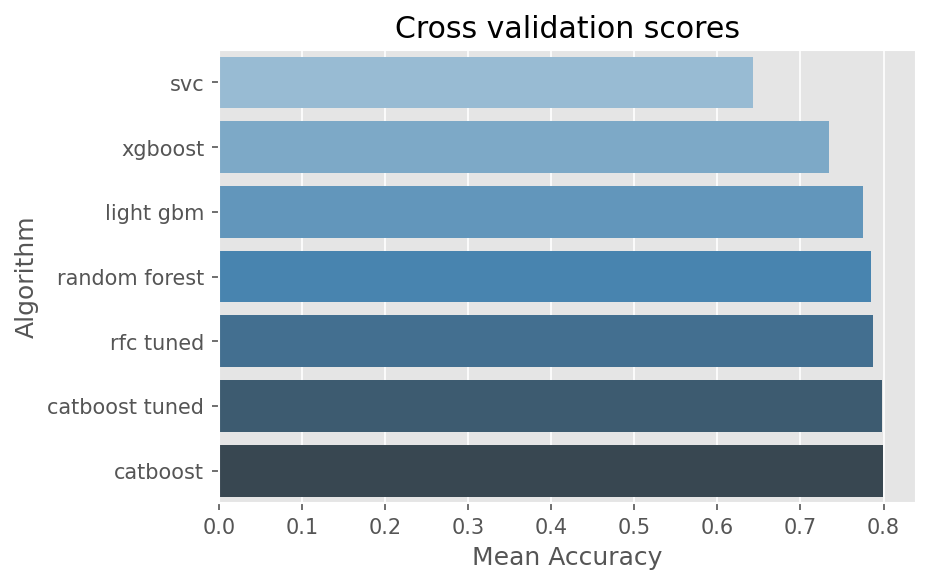

In [60]:
cv_res = pd.DataFrame({"CrossValMeans":list(cv_means_dict_sorted.values()),
                       "Algorithm":list(cv_means_dict_sorted.keys())})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Blues_d",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

## 3.5 Use Voting Classifier to get final score (CatBoost, Tuned Random Forest)

In [62]:
from sklearn.model_selection import GridSearchCV

# votingC = VotingClassifier(estimators=[('rfc tuned', rfc_tuned), ('catboost', catboost)], voting='hard', n_jobs=-1)
# votingC = VotingClassifier(estimators=[('rfc tuned', rfc_tuned),('catboost', catboost)], 
#                            voting='soft', n_jobs=-1)
votingC = VotingClassifier(estimators=[('rfc tuned', rfc_tuned),('catboost', catboost)],
                           voting='soft', n_jobs=-1)


# params = {'rfc tuned__n_estimators': [1, 100], 'catboost__n_estimators': [1, 200],
#           'rfc tuned__max_features': [1,100]}

# grid = GridSearchCV(estimator=votingC, param_grid = params, cv=5)
# grid = grid.fit(train_X, train_y)

votingC = votingC.fit(train_X, train_y)

In [63]:
# y_pred = votingC.predict(test_X)
# y_pred_proba=votingC.predict_proba(test_X)[:,1]
voting_y_pred = votingC.predict(test_X)
voting_y_pred_proba=votingC.predict_proba(test_X)[:,1]

In [64]:
print('votingC accuracy: ',round(accuracy_score(test_y,voting_y_pred),3))
print('votingC auc score: ',round(roc_auc_score(test_y, voting_y_pred_proba),3))

votingC accuracy:  0.795
votingC auc score:  0.824


In [65]:
print('accuracy: ',round(accuracy_score(test_y,voting_y_pred),3))
print('precision:',round(precision_score(test_y,y_pred),3))
print('recall:   ',round(recall_score(test_y,y_pred),3))
print('f1 score: ',round(f1_score(test_y,y_pred),3))
print('MCC score:',round(matthews_corrcoef(test_y,y_pred),3))
print('auc score:',round(roc_auc_score(test_y, voting_y_pred_proba),3))

accuracy:  0.795
precision: 0.82
recall:    0.927
f1 score:  0.87
MCC score: 0.572
auc score: 0.824


### 3.5.1 Confustion Matrix

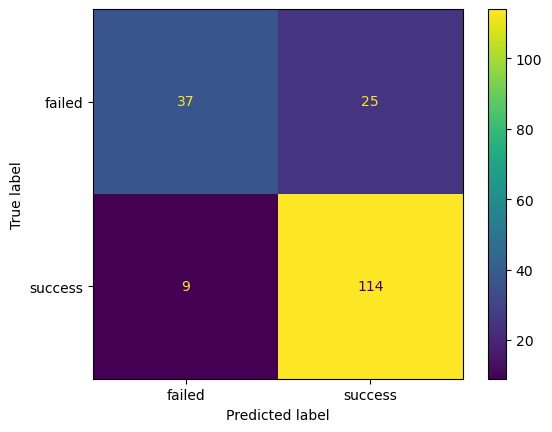

In [66]:
plt.style.use('default')
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['failed','success'])
disp.plot()

### 3.5.2 ROC Curve

In [67]:
roc_list=[]
fp=[]
tp=[]
temp=[]
auc_list=[]
for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    roc_list.append(roc_curve(test_y, y_pred_proba))
    auc_list.append(round(roc_auc_score(test_y, y_pred_proba),3))
roc_list.append(roc_curve(test_y,voting_y_pred_proba))
auc_list.append(round(roc_auc_score(test_y, voting_y_pred_proba),3))

In [68]:
fpr1, tpr1, temp1 = roc_list[0] #svc
fpr2, tpr2, temp2 = roc_list[1] #rfc
fpr3, tpr3, temp3 = roc_list[2] #xgb
fpr4, tpr4, temp4 = roc_list[3] #lgbm
fpr5, tpr5, temp5 = roc_list[4] #catboost
fpr6, tpr6, temp6 = roc_list[5] #rfc_tuned
fpr7, tpr7, temp7 = roc_list[6] #catboost_tuned
fpr8, tpr8, temp8 = roc_list[7] #voting classifier

<Figure size 640x480 with 0 Axes>

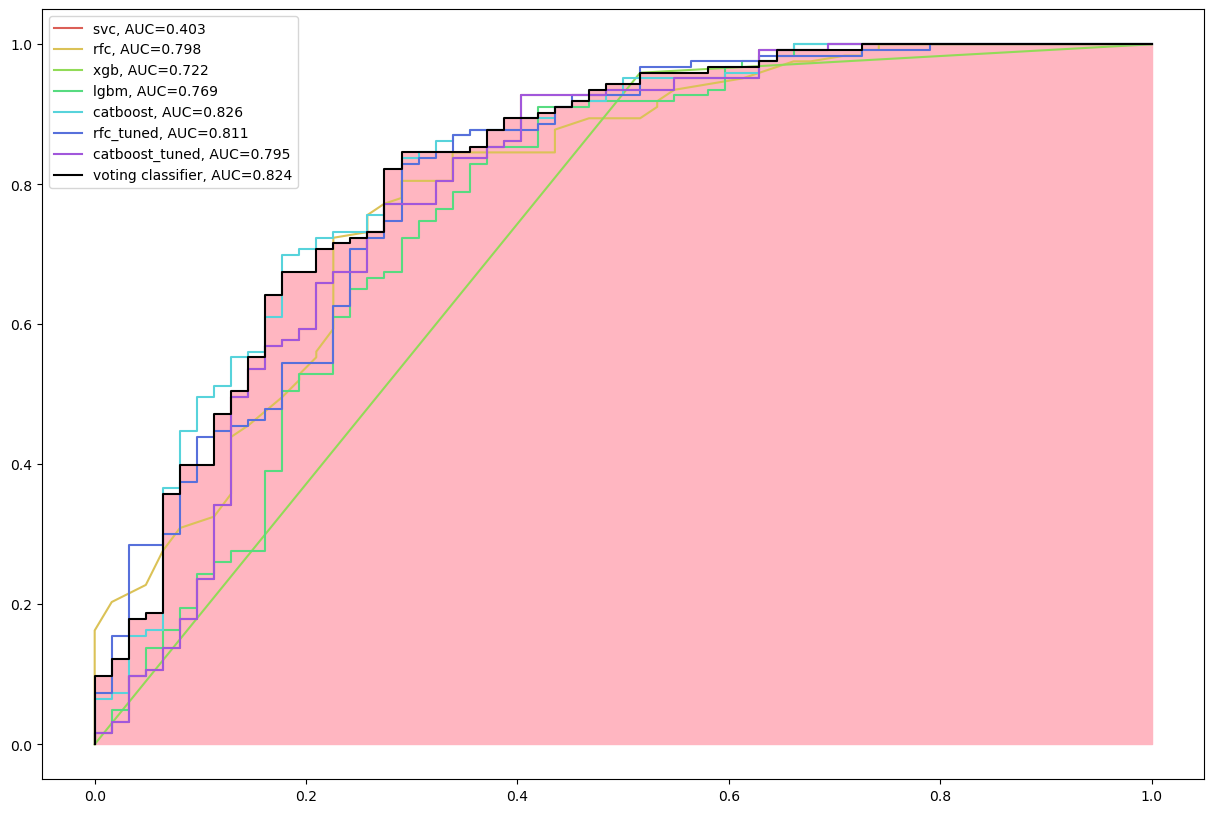

In [69]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(15,10))
colors = sns.color_palette('hls',8)

fpr1, tpr1, temp1 = roc_curve(test_y, y_pred_proba)
# auc1 = round(roc_auc_score(test_y, y_pred_proba),3)
plt.plot(fpr1,tpr1,label='svc, AUC='+str(auc_list[0]),linestyle='solid',color=colors[0])
plt.plot(fpr2,tpr2,label='rfc, AUC='+str(auc_list[1]),linestyle='solid',color=colors[1])
plt.plot(fpr3,tpr3,label='xgb, AUC='+str(auc_list[2]),linestyle='solid',color=colors[2])
plt.plot(fpr4,tpr4,label='lgbm, AUC='+str(auc_list[3]),linestyle='solid',color=colors[3])
plt.plot(fpr5,tpr5,label='catboost, AUC='+str(auc_list[4]),linestyle='solid',color=colors[4])
plt.plot(fpr6,tpr6,label='rfc_tuned, AUC='+str(auc_list[5]),linestyle='solid',color=colors[5])
plt.plot(fpr7,tpr7,label='catboost_tuned, AUC='+str(auc_list[6]),linestyle='solid',color=colors[6])
plt.plot(fpr8,tpr8,label='voting classifier, AUC='+str(auc_list[7]),linestyle='solid',color='black')
plt.fill_between(fpr8,tpr8,color='lightpink')

plt.legend()